# Bad Lightcurves

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Making dataframes

In [2]:
for i in range(1,27):
    filename = 's%d.txt' % i
    variable_name = 'sector_%d' % i
    file_path = os.path.join('..', 'outputs', filename)

    # Use the custom function to read the file and assign it to a dynamically named variable
    try:
        # Use the custom function to read the file and assign it to a dynamically named variable
        exec("%s = get_output('%s')" % (variable_name, file_path))
    except FileNotFoundError:
        # Handle the case where the file doesn't exist
        print(f"File '{filename}' not found. Moving to the next file.")
        continue

File 's8.txt' not found. Moving to the next file.
File 's12.txt' not found. Moving to the next file.
File 's13.txt' not found. Moving to the next file.


### XRP data

In [3]:
def import_xrpdata(file_path):
    """Imports batch_analyse output file as pandas dataframe.

    file_path: ouptut file (.txt format)

    Returns:
    - df: DataFrame of output file.

    """
    if isinstance(file_path, list):
        df = pd.DataFrame(data=file_path)
    elif file_path.endswith(".txt"):
        df = pd.read_csv(file_path, sep=" ")

    columns = [
        "path",
        "TIC_ID",
        "signal",
        "snr",
        "time",
        "asym_score",
        "amplitude",
        "width",
        "skewness",
        "skewness_err",
        "duration",
        "depth",
        "peak_lspower",
        "mstat",
        "m",
        "n",
        "chisq_gauss",
        "chisq_skew",
        "rchisq_gauss",
        "rchisq_skew",
        "rmse_gauss",
        "rmse_skew",
        "mae_gauss",
        "mae_skew",
        "transit_prob"]
    return df

In [4]:
for i in range(1,27):
    filename = 's%d.txt' % i
    variable_name = 'xrpsector_%d' % i
    file_path = os.path.join('..', 'output_log_v5', filename)

    # Use the custom function to read the file and assign it to a dynamically named variable
    try:
        # Use the custom function to read the file and assign it to a dynamically named variable
        exec("%s = get_output('%s')" % (variable_name, file_path))
    except FileNotFoundError:
        # Handle the case where the file doesn't exist
        print(f"File '{filename}' not found. Moving to the next file.")
        continue

## Distributions before any cuts are made

Dataframe 'sector_8' not found. Moving to the next sector.
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.


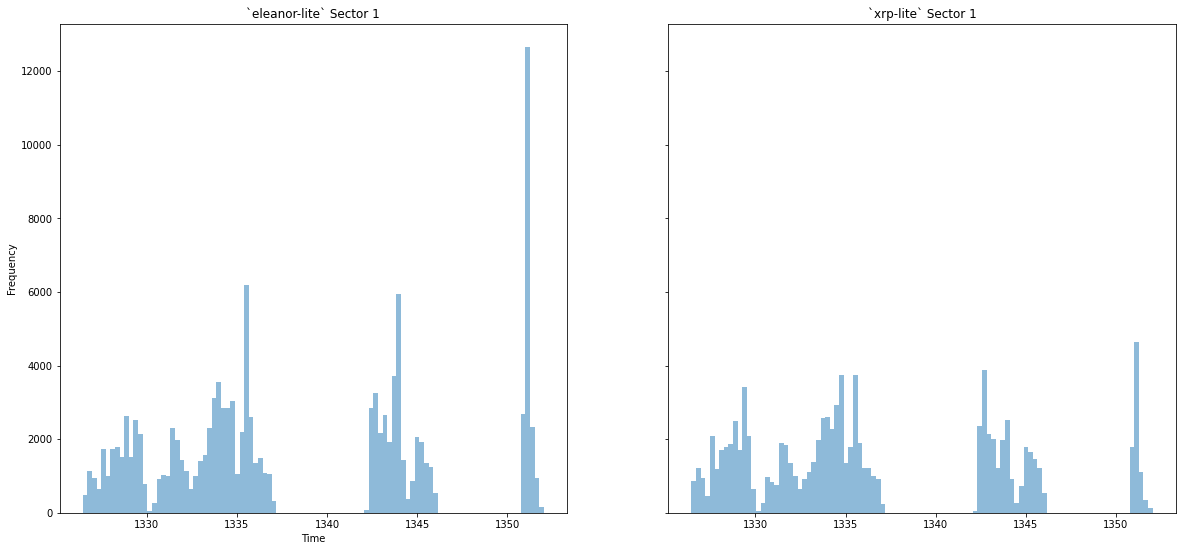

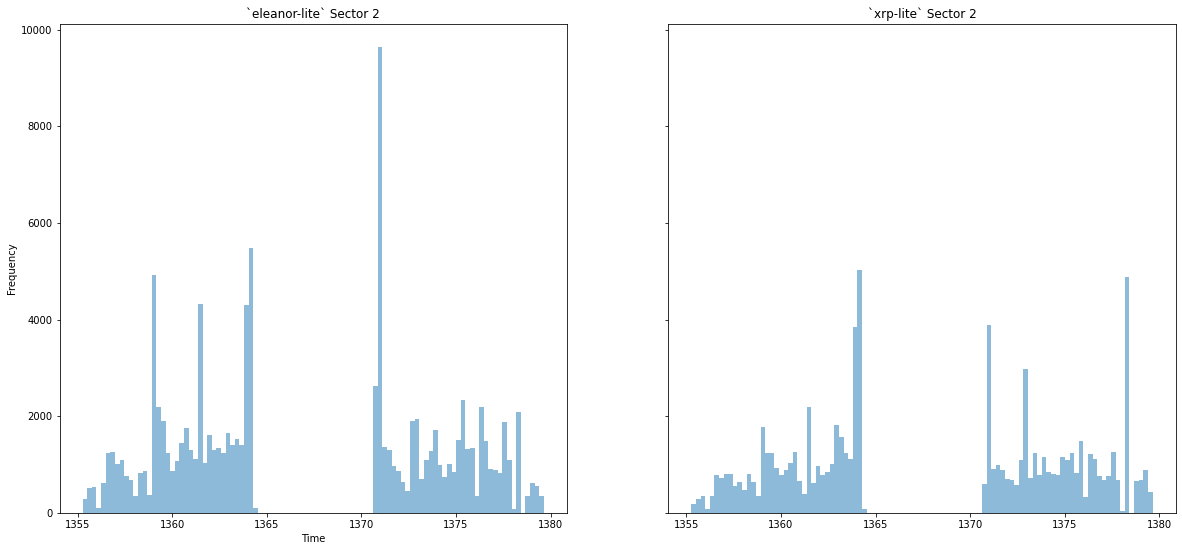

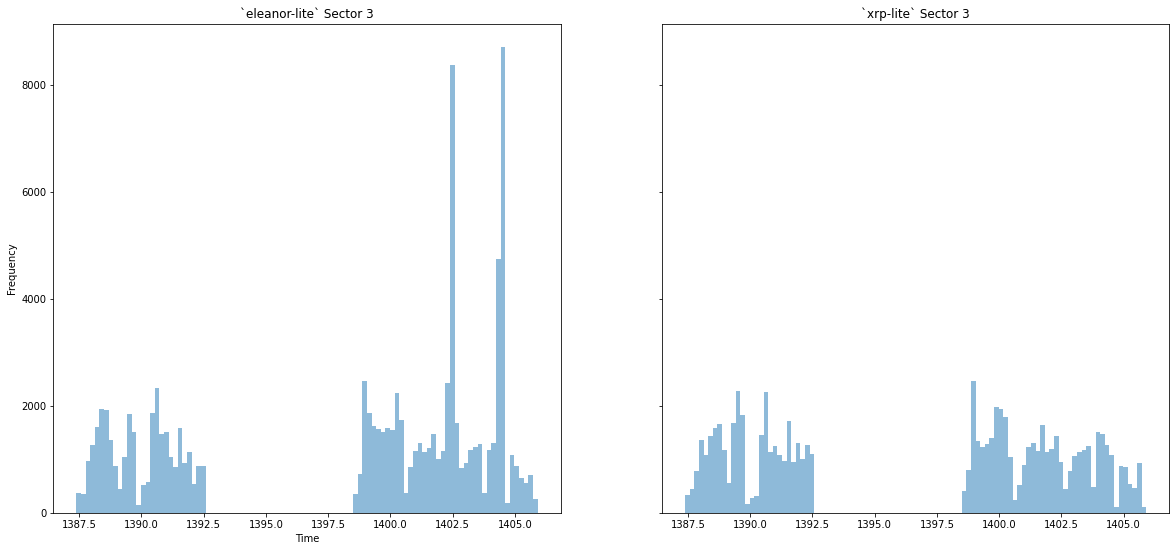

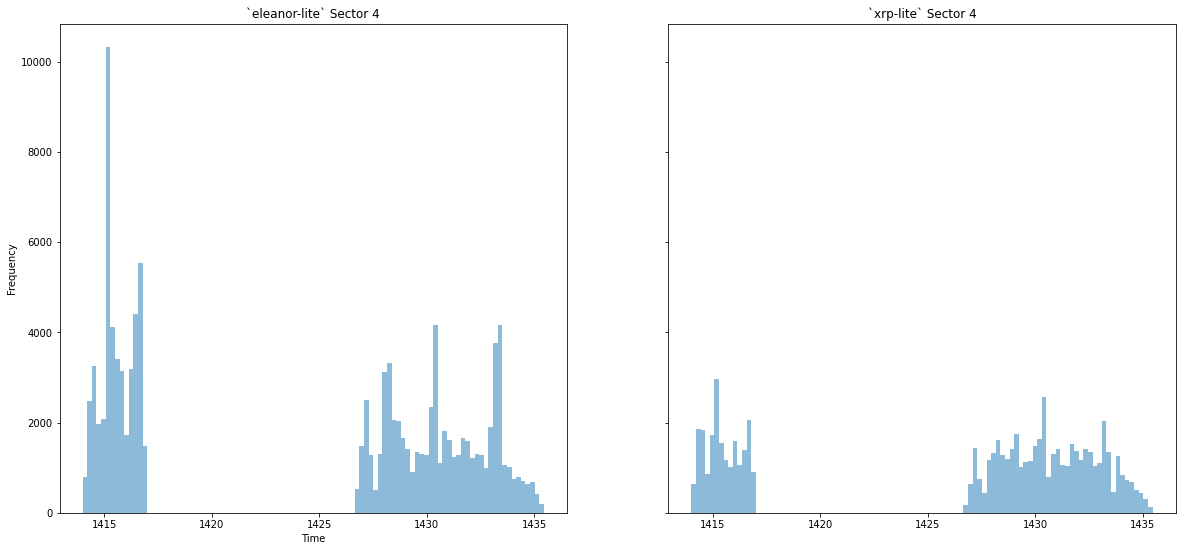

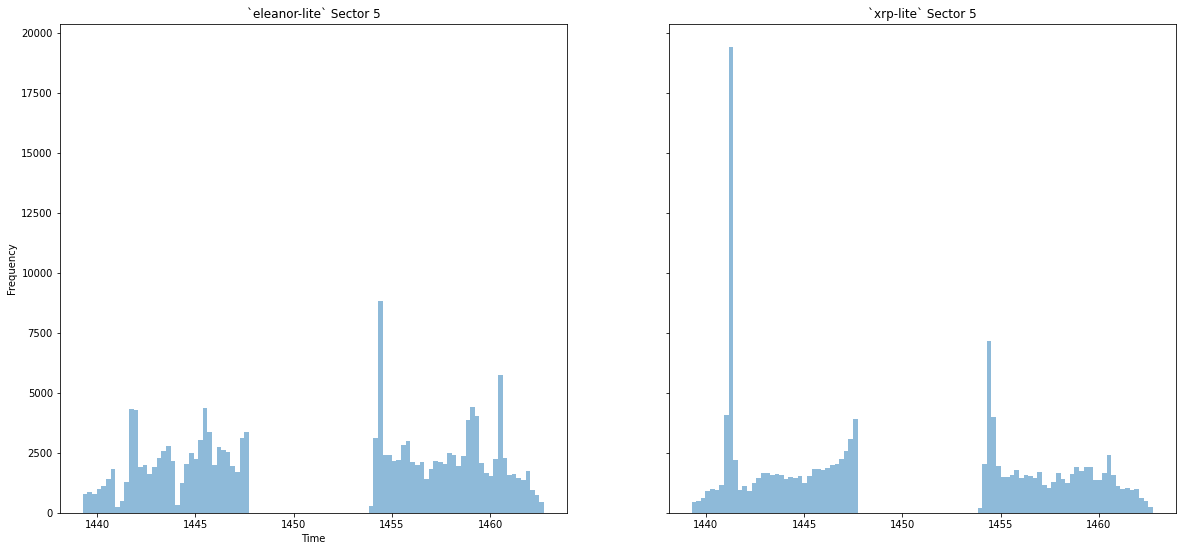

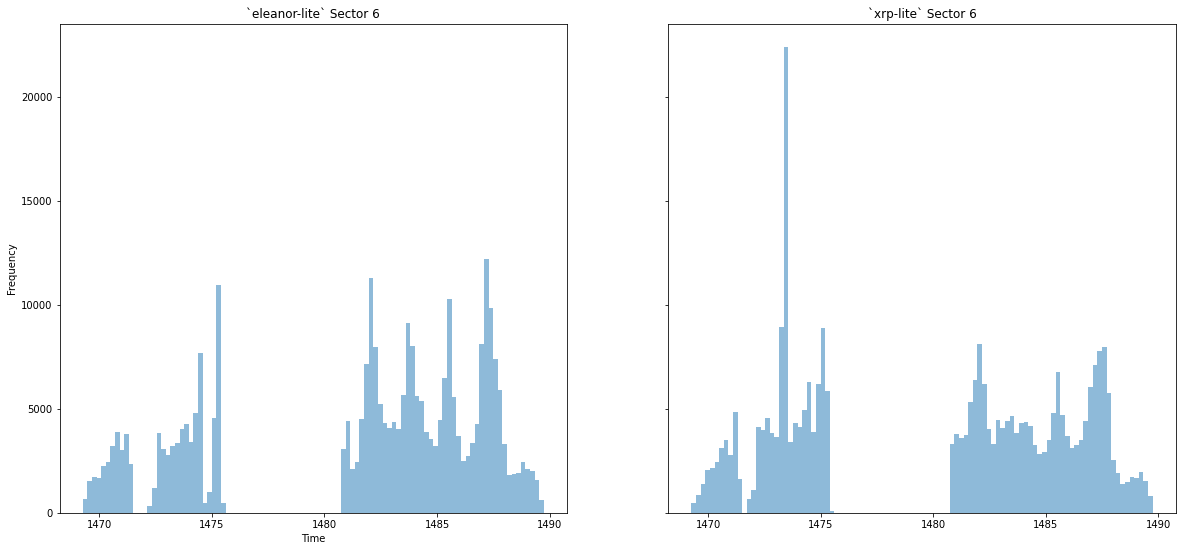

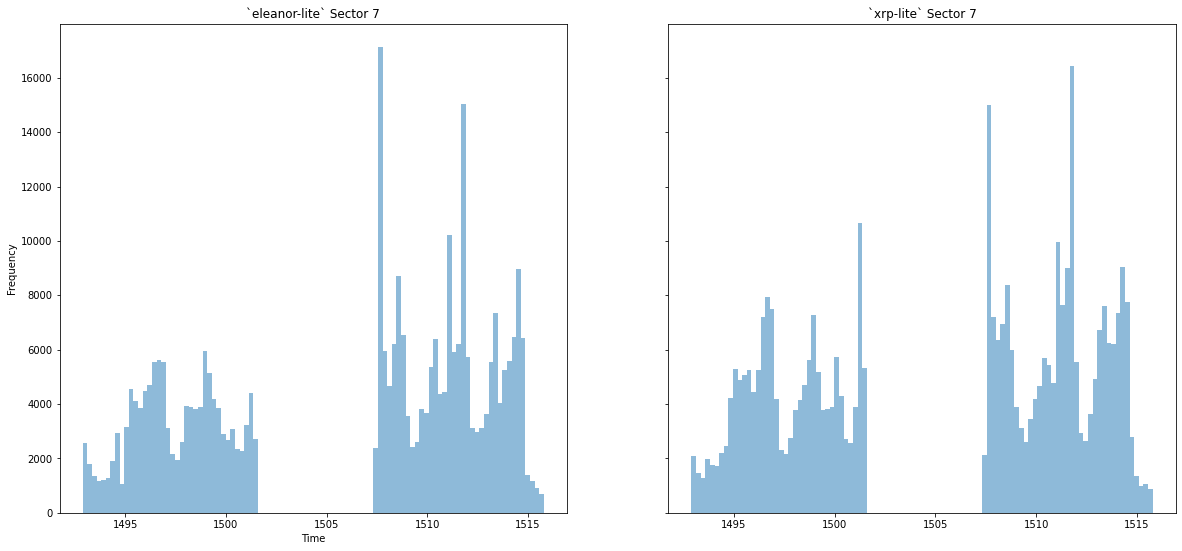

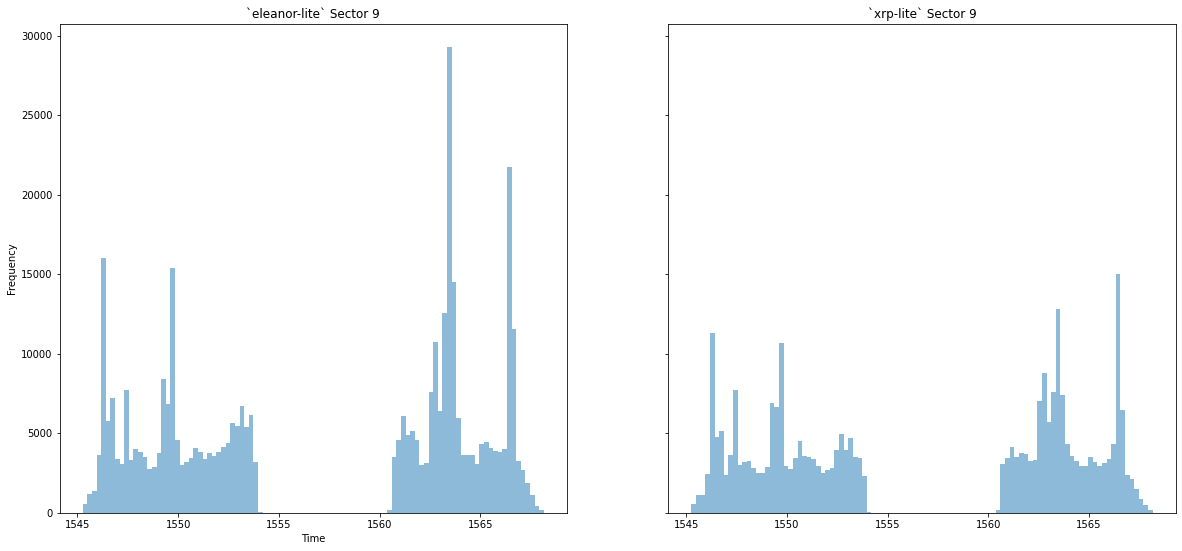

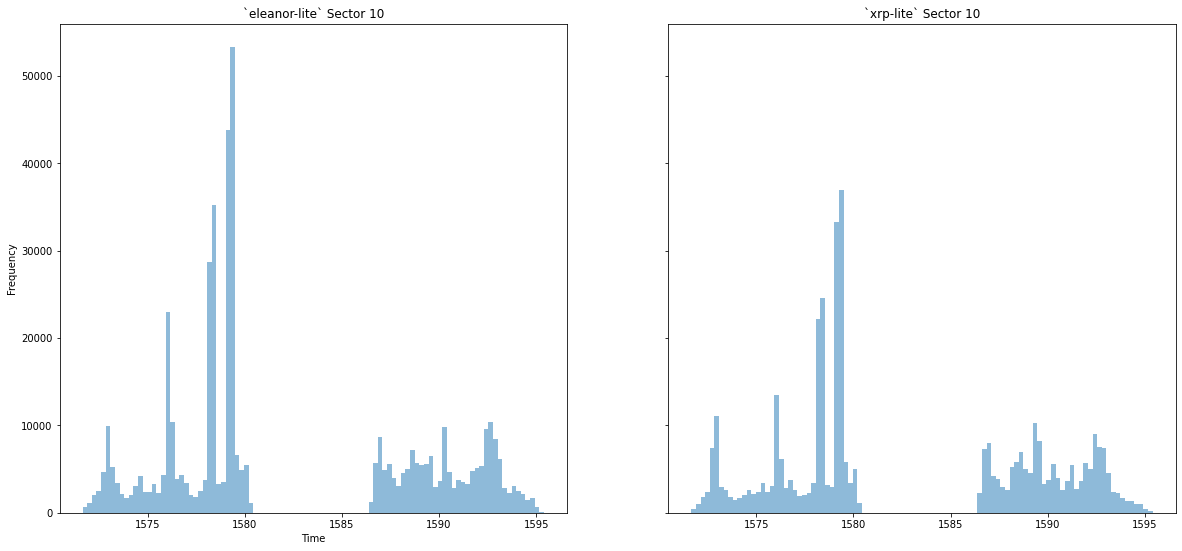

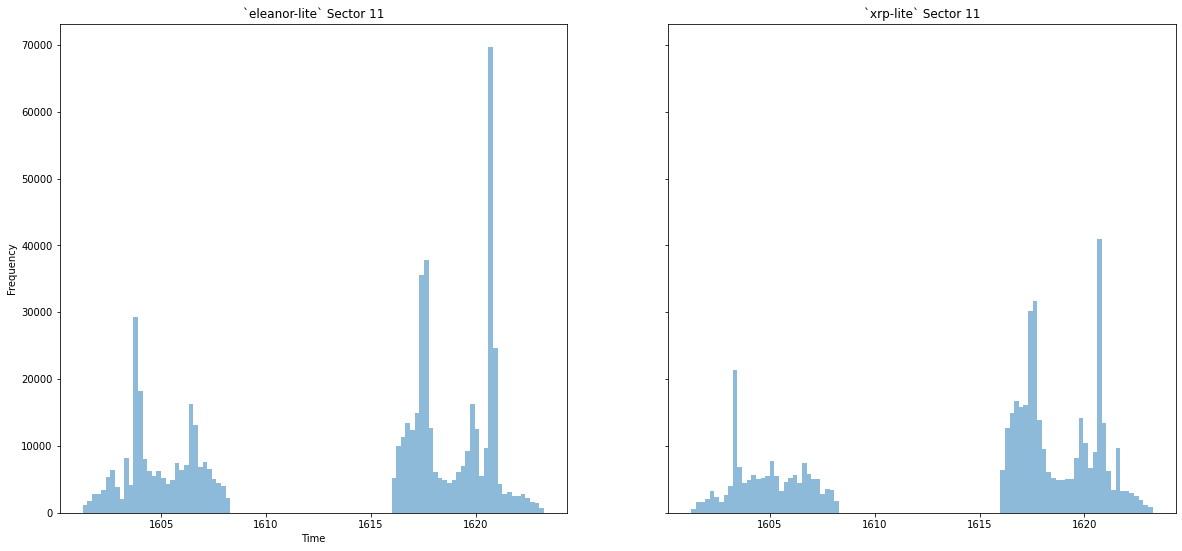

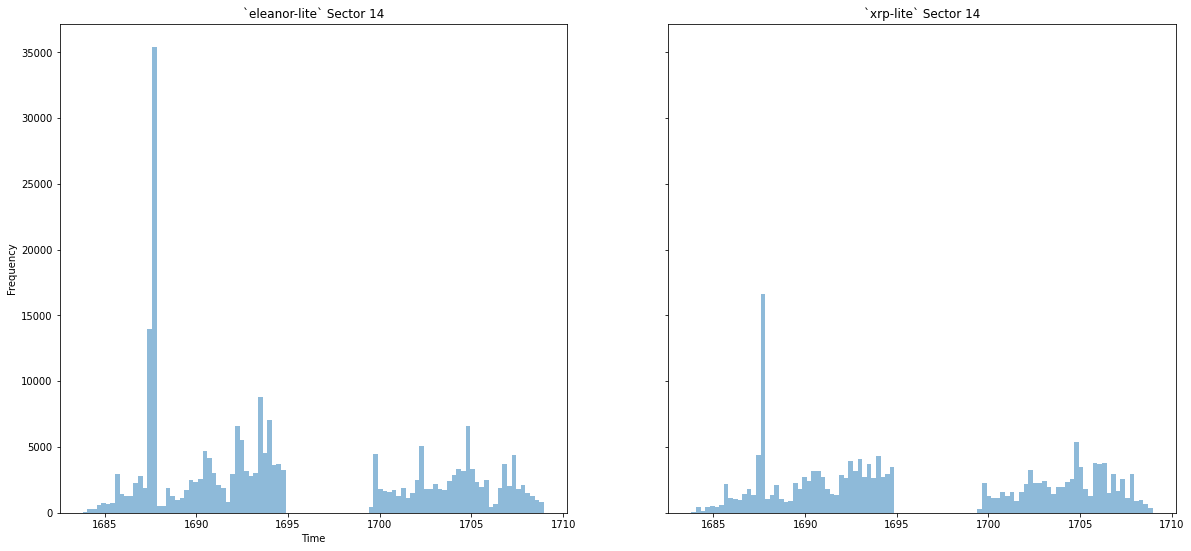

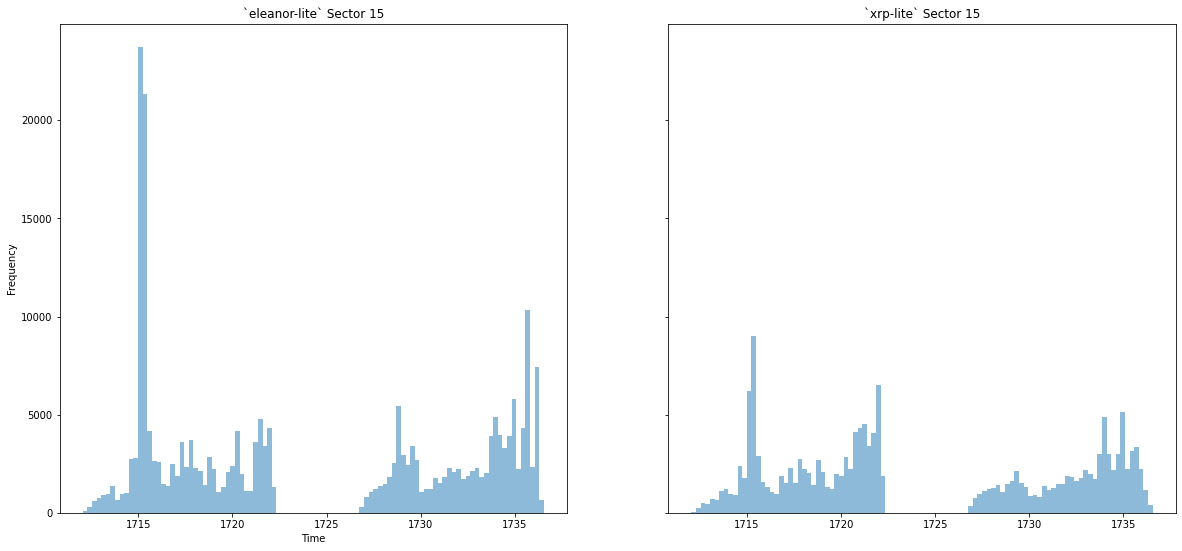

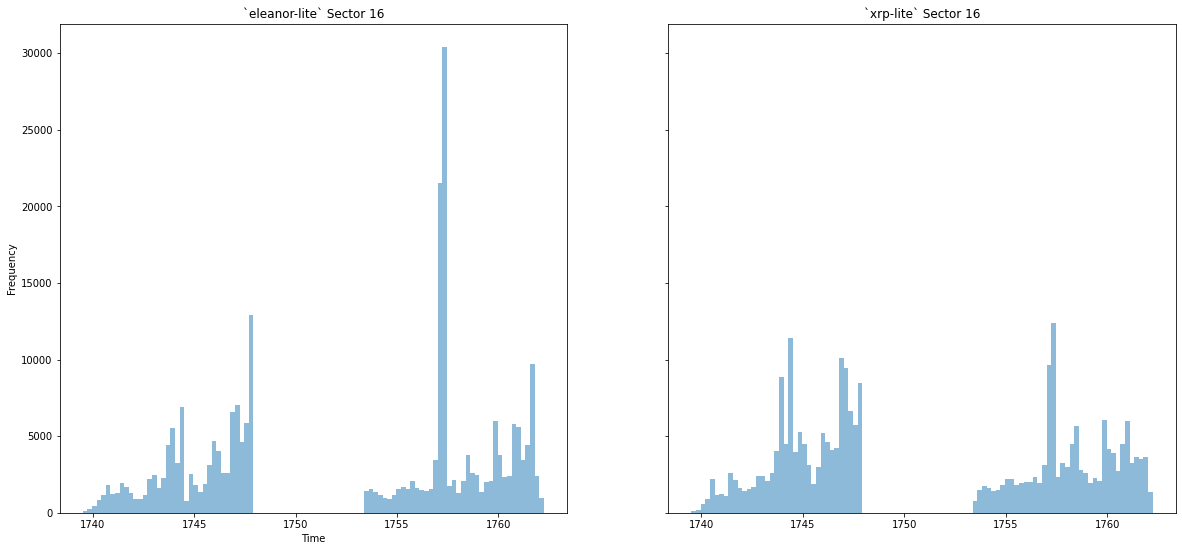

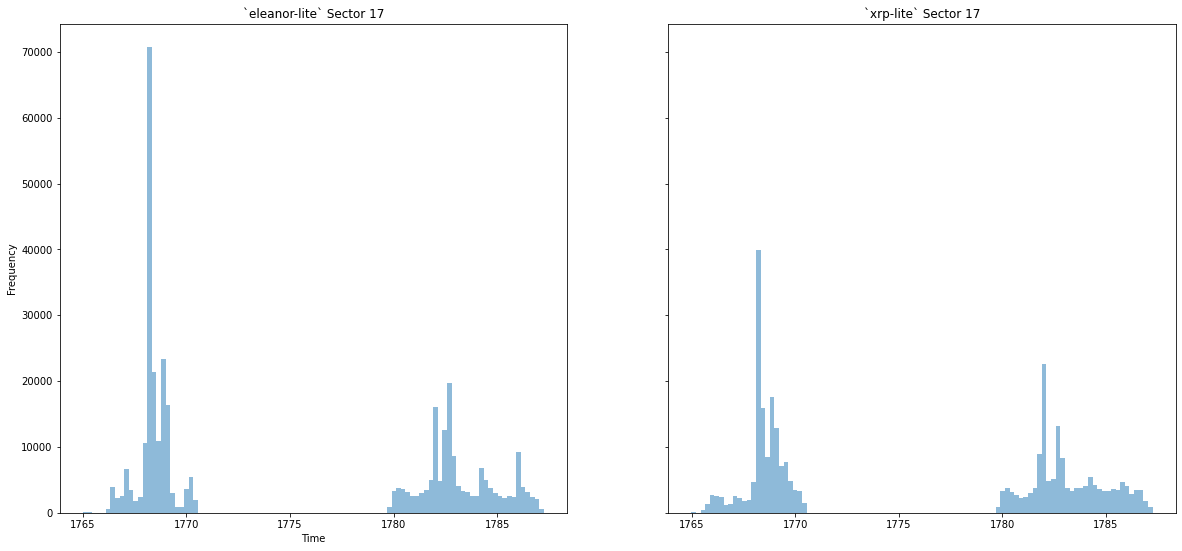

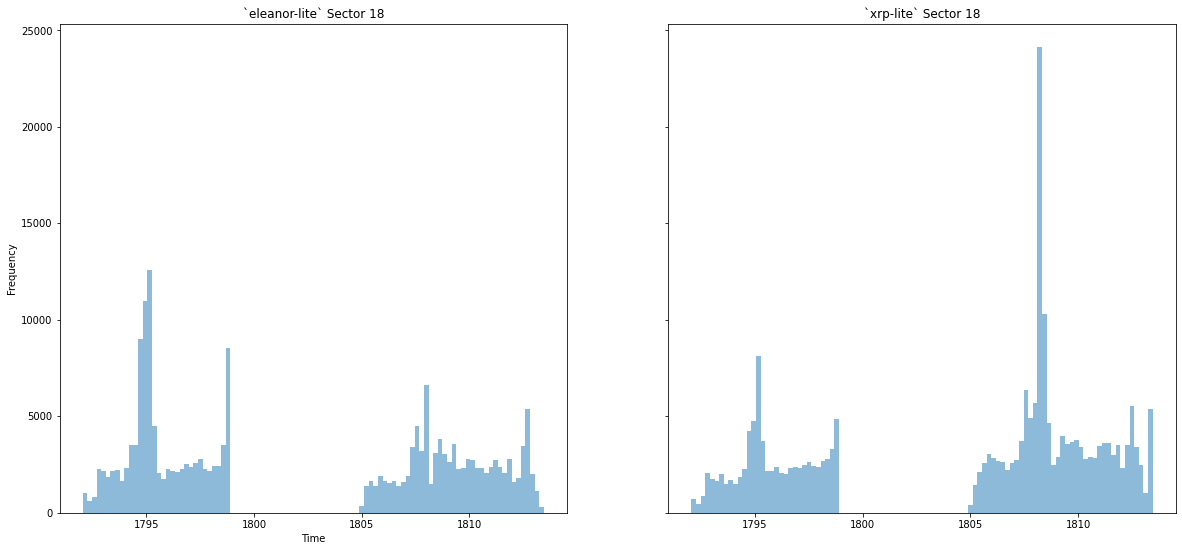

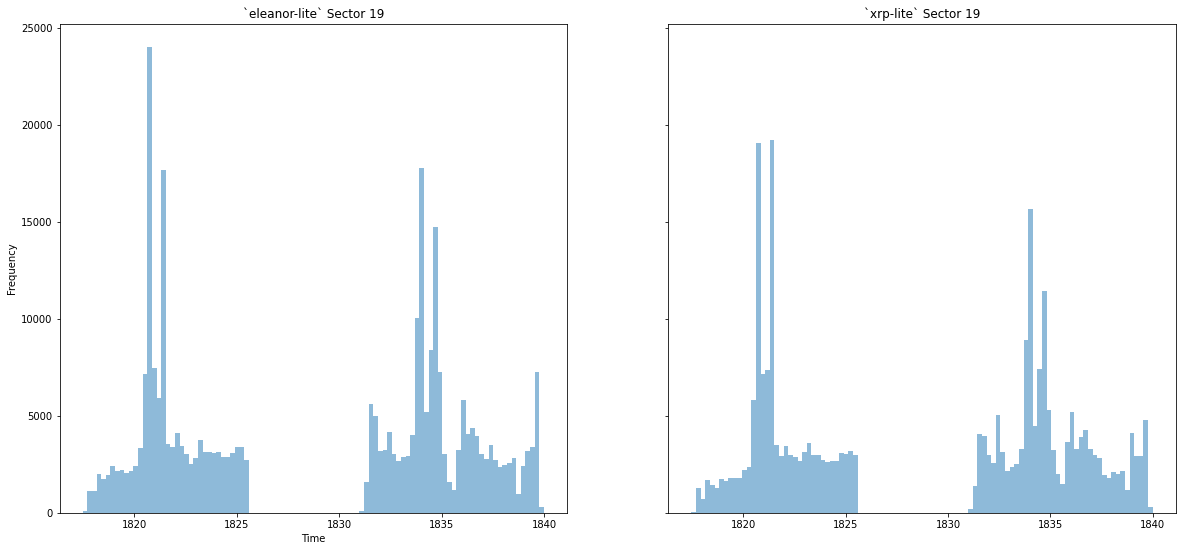

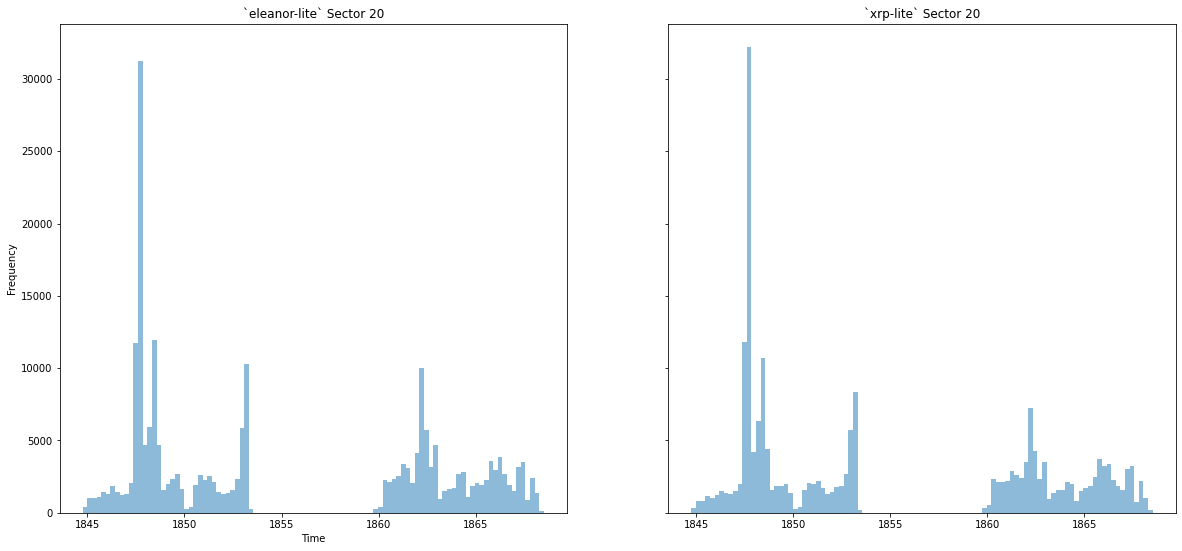

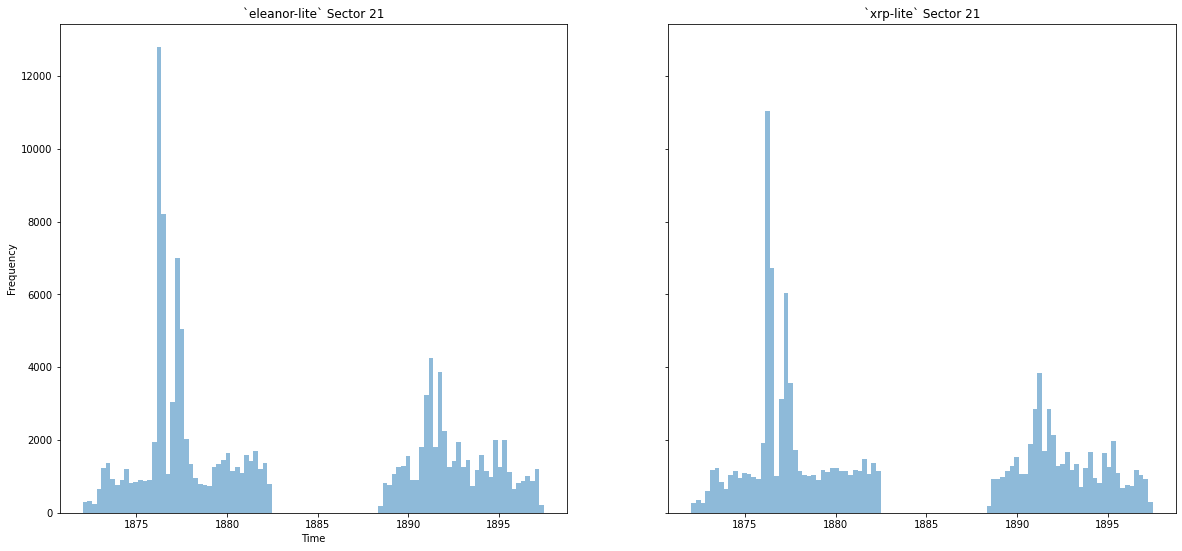

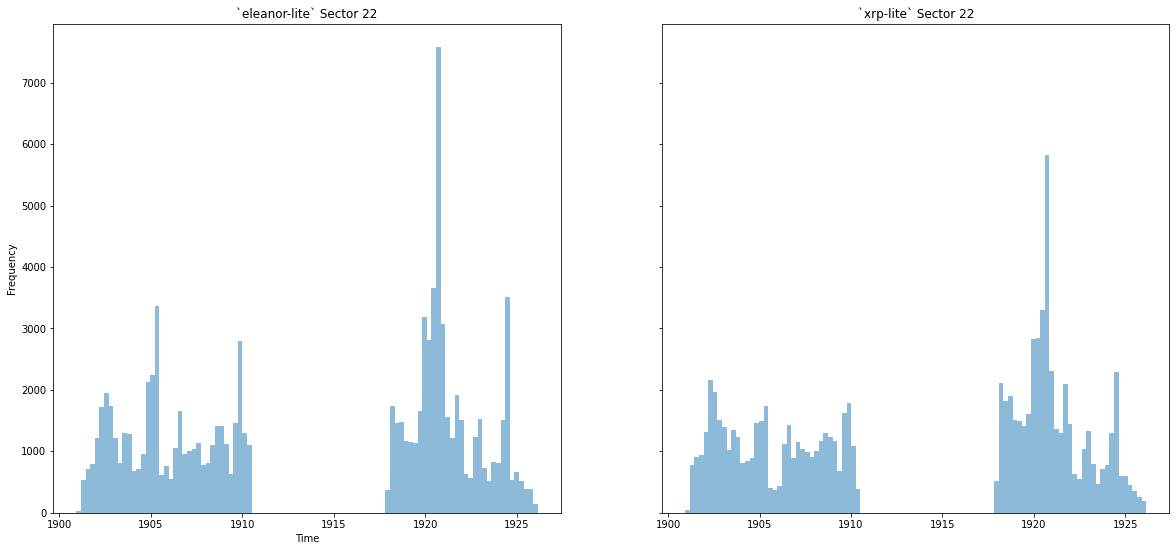

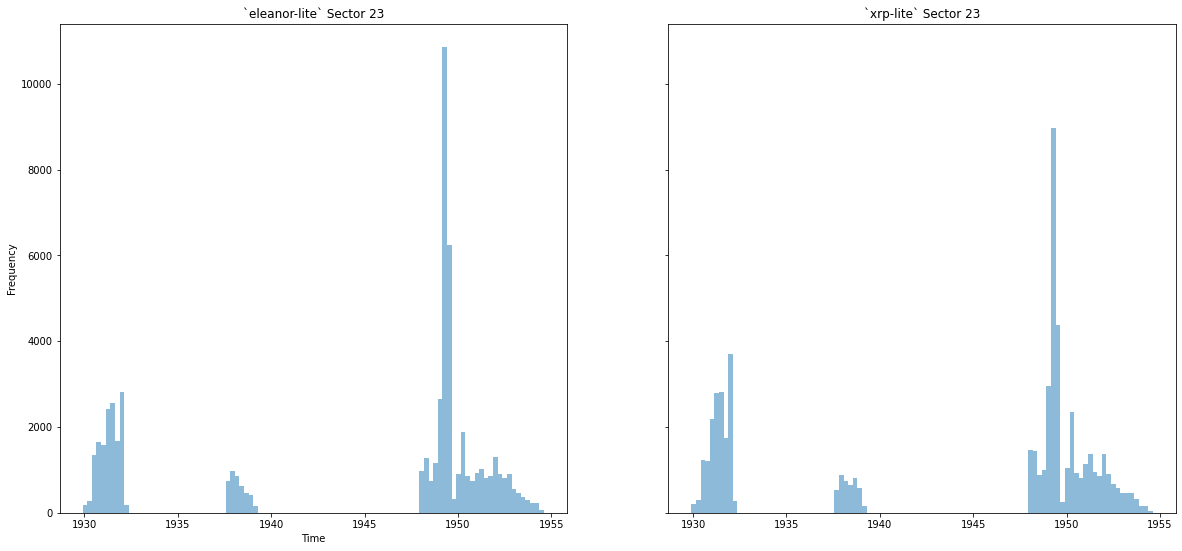

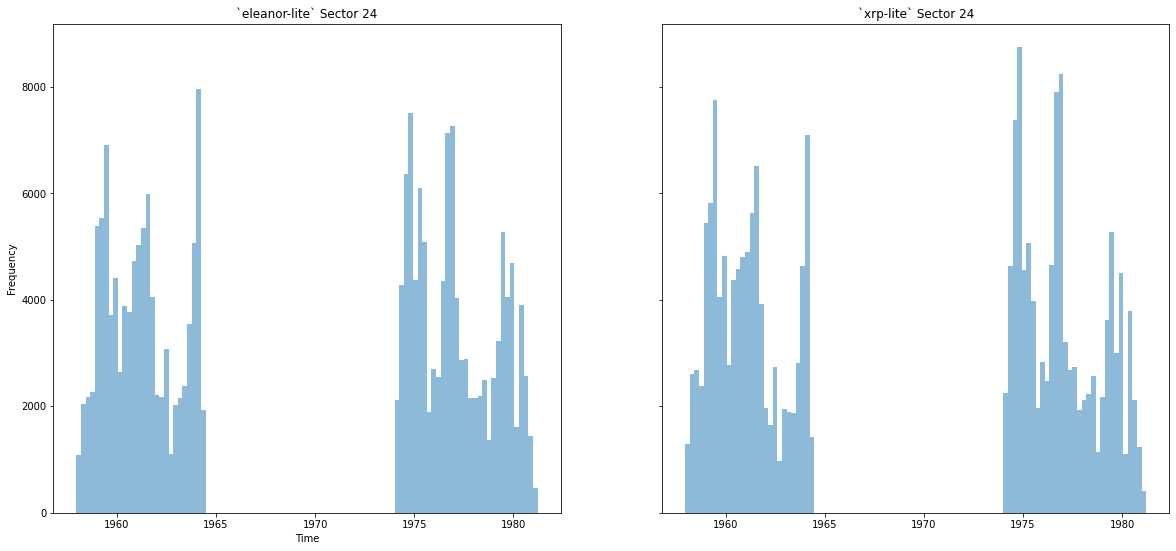

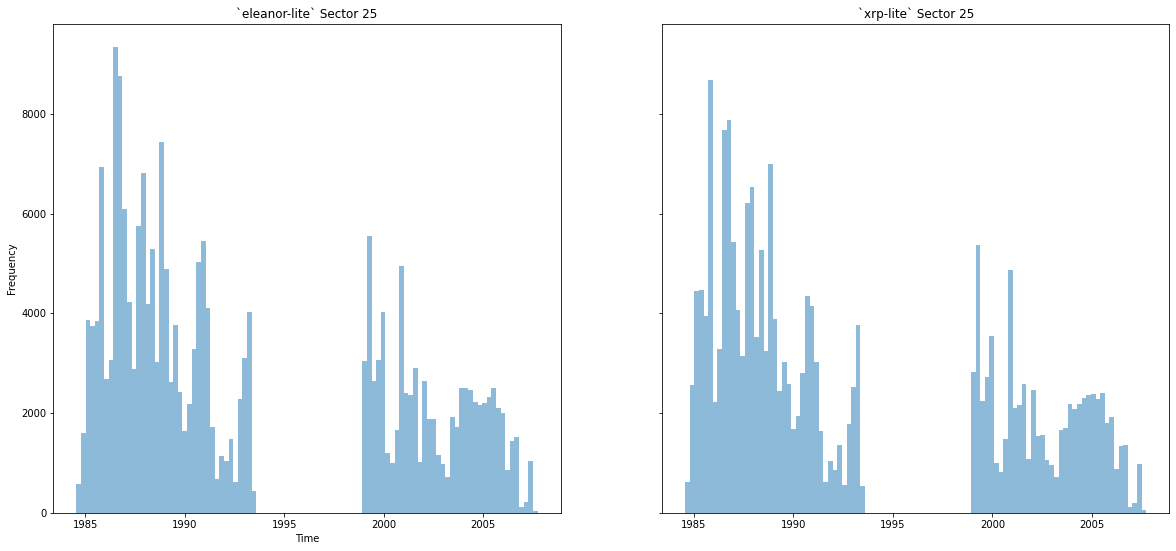

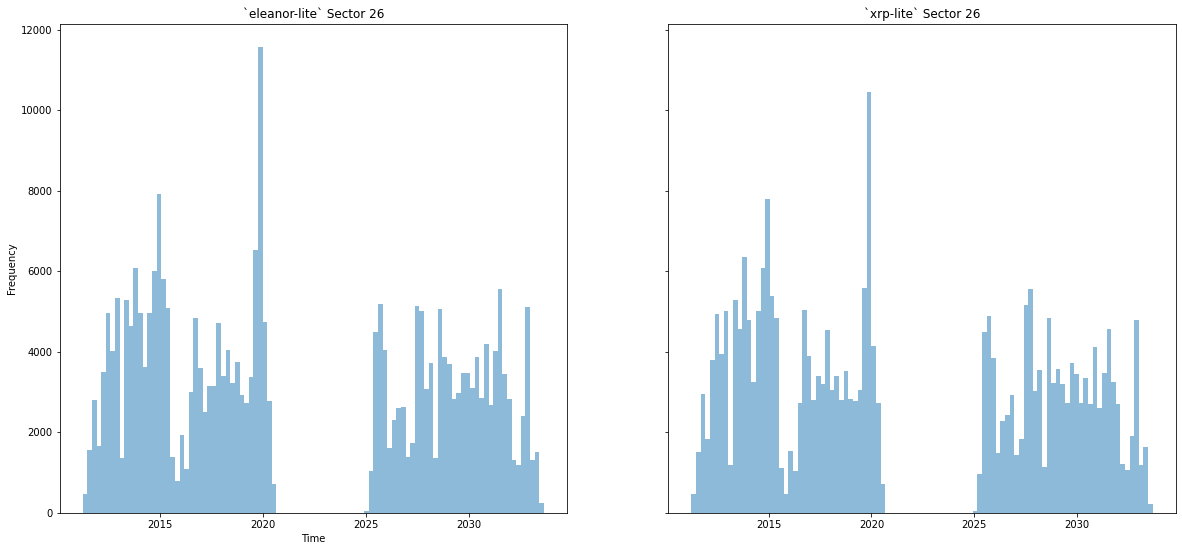

In [5]:
#data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    xrp_dataframe_name = 'xrpsector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
        data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)

        data = data[data.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        
        data_xrp = globals()[xrp_dataframe_name]
        data_xrp = data_xrp[data_xrp.transit_prob == 'maybeTransit']
        data_xrp = data_xrp[(data_xrp.asym_score <= 3)].reset_index(drop=True)
        #data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
        #data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
        
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9),sharey=True)
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    
    ax[0].set_title('`eleanor-lite` Sector {}'.format(sector))
    ax[1].set_title('`xrp-lite` Sector {}'.format(sector))

    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')


-----

### Few plots to determine cause of common time events

In [6]:
# test = sector_21[(sector_21.time >= 1876) & (sector_21.time <= 1877) & (abs(test.snr) >= 6)]
# test['abs_path'] = test['path'].apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))

## Distributions after SNR cut 5 made

Dataframe 'sector_8' not found. Moving to the next sector.
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.


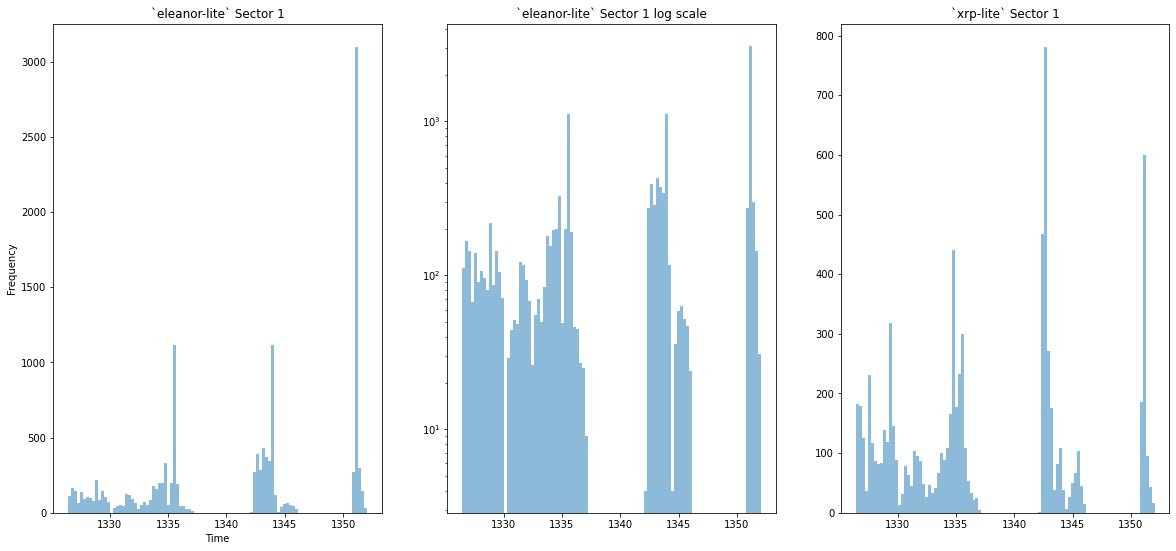

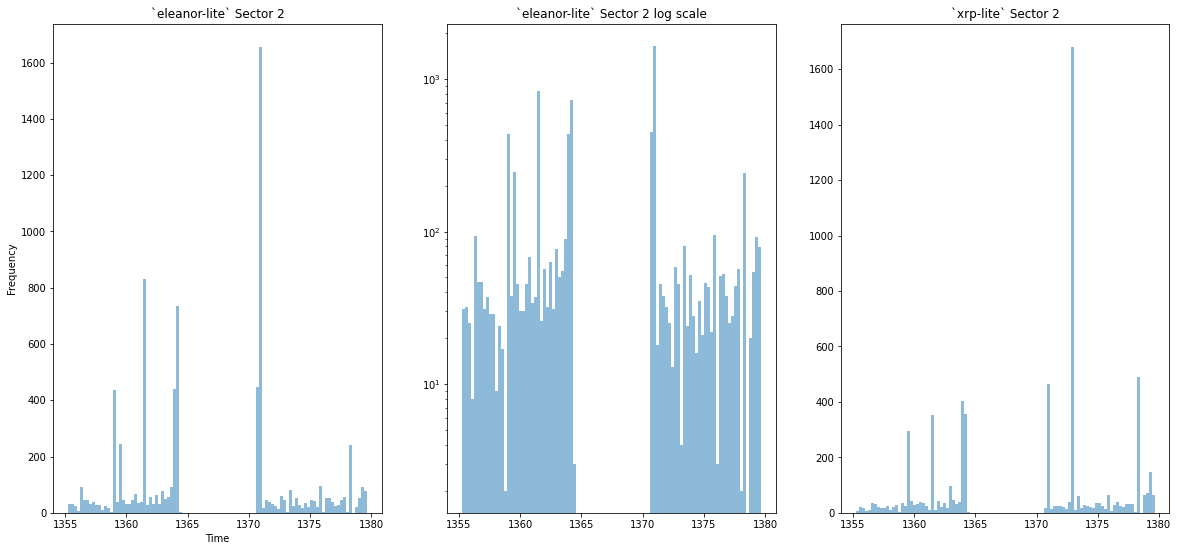

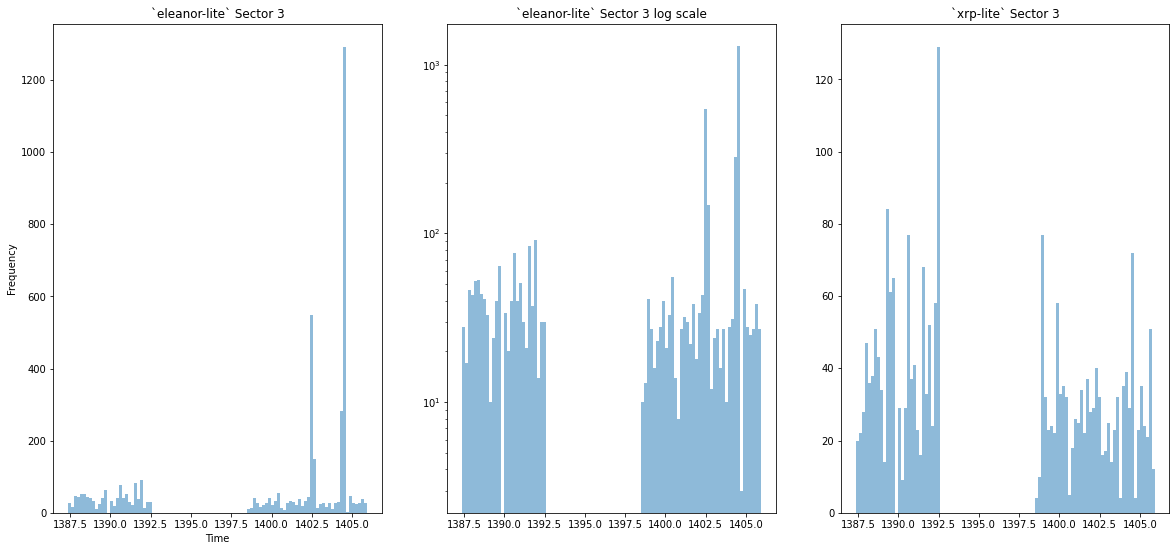

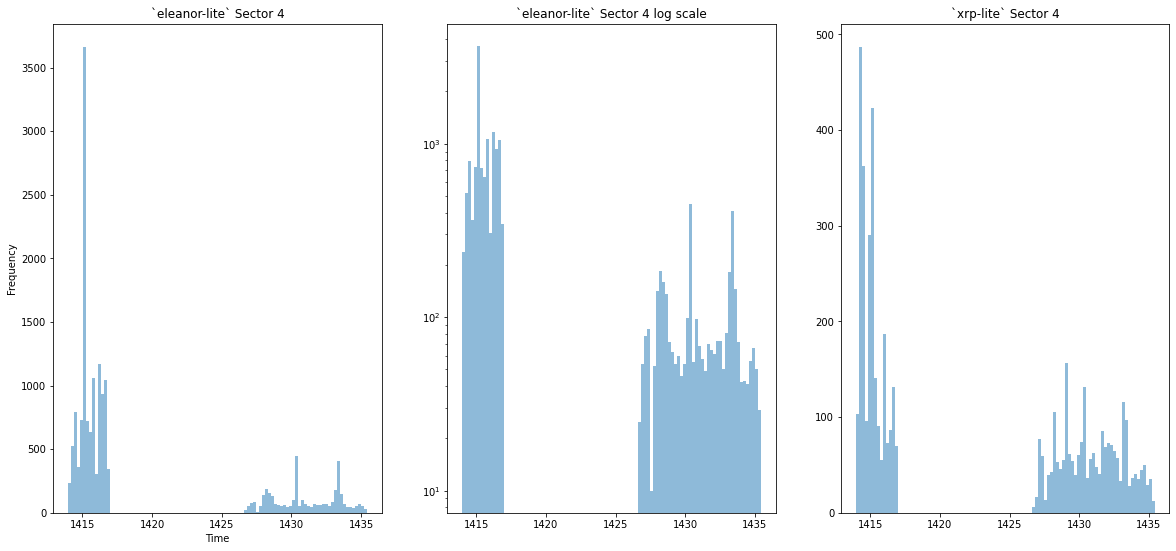

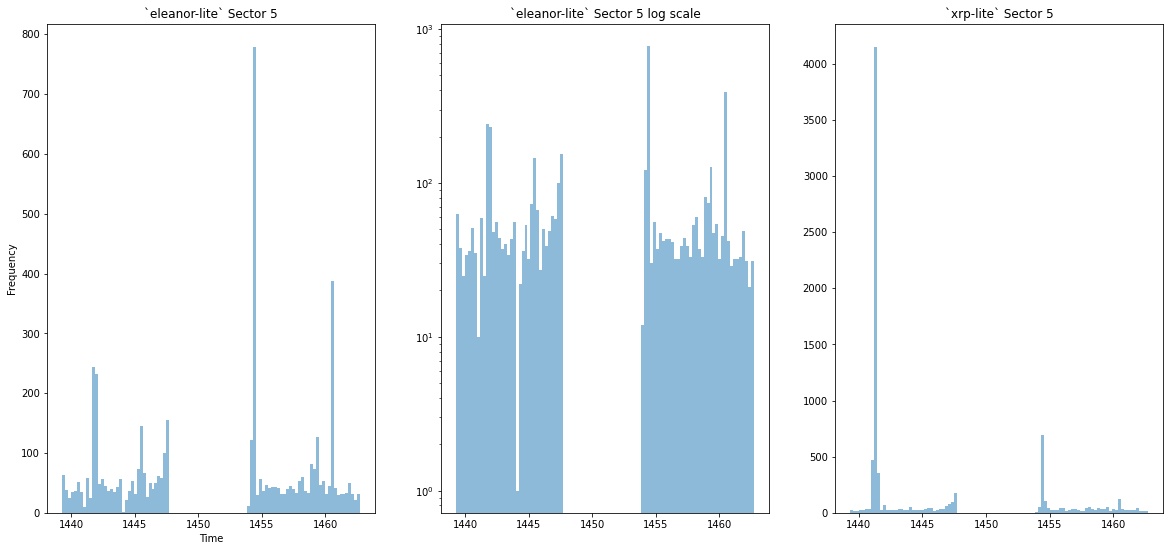

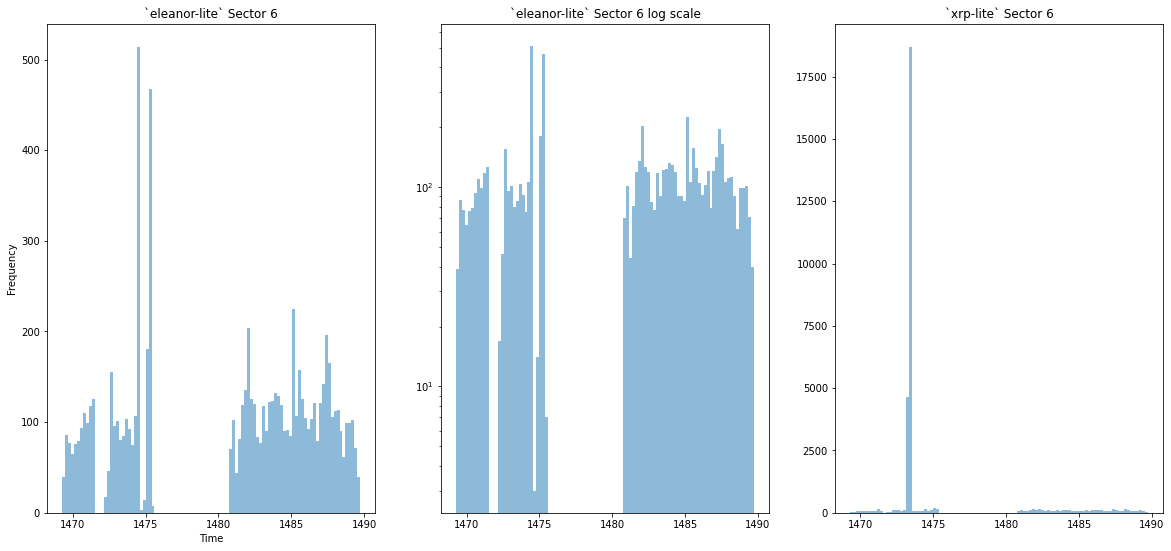

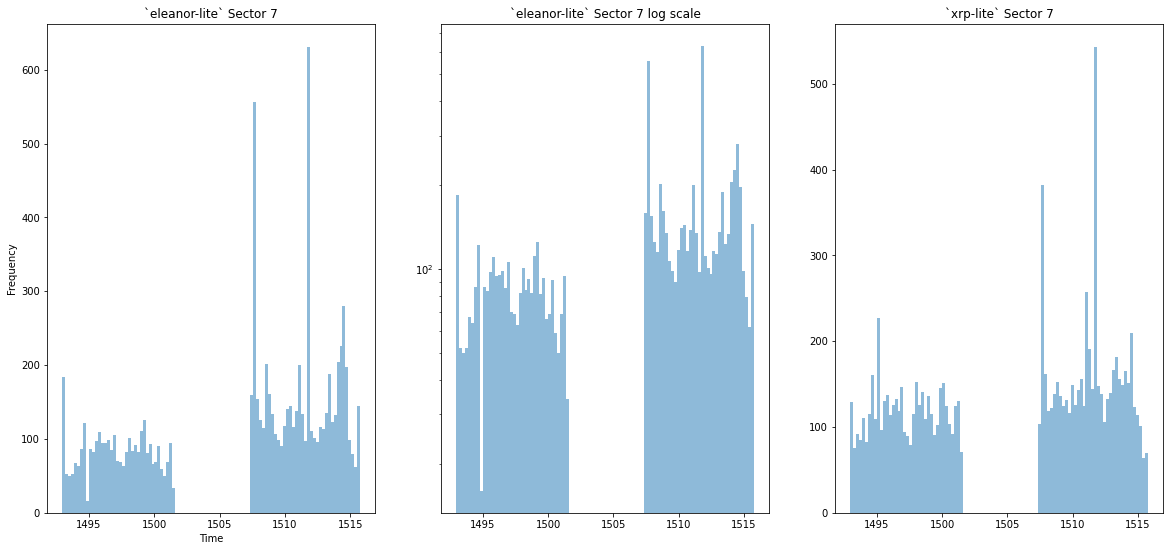

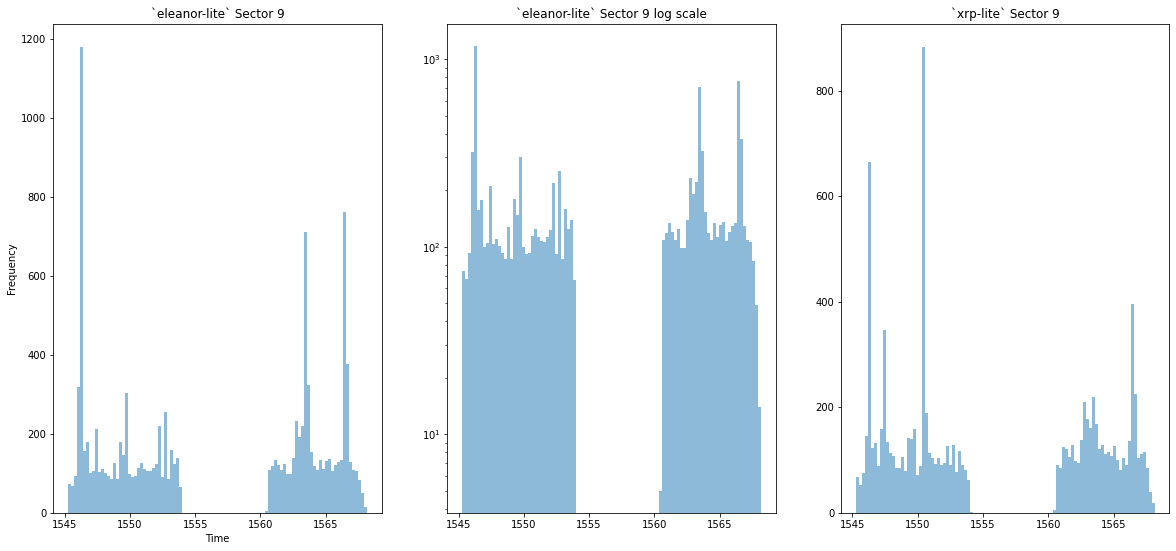

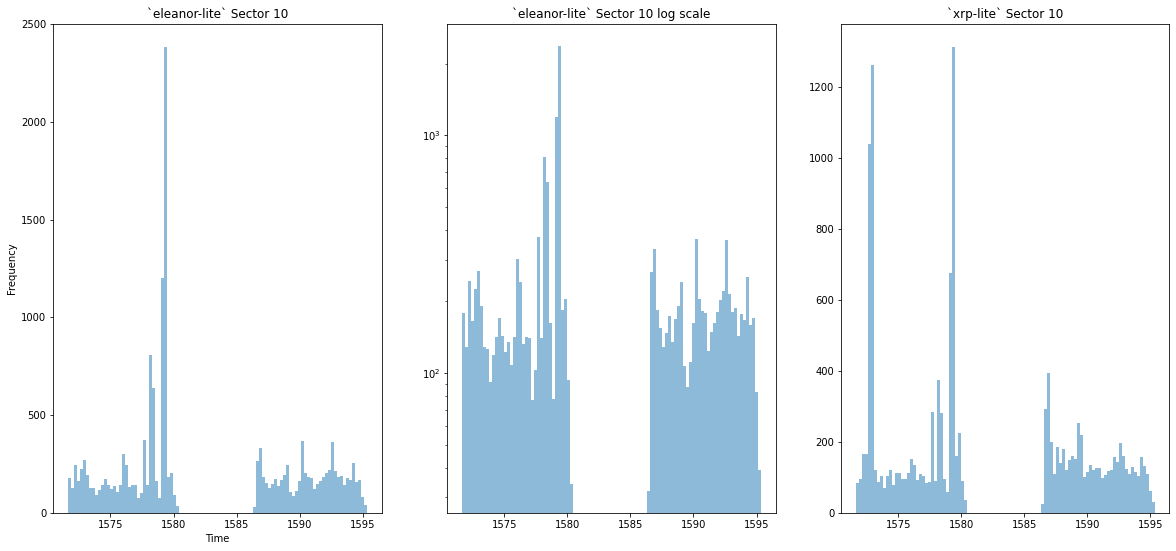

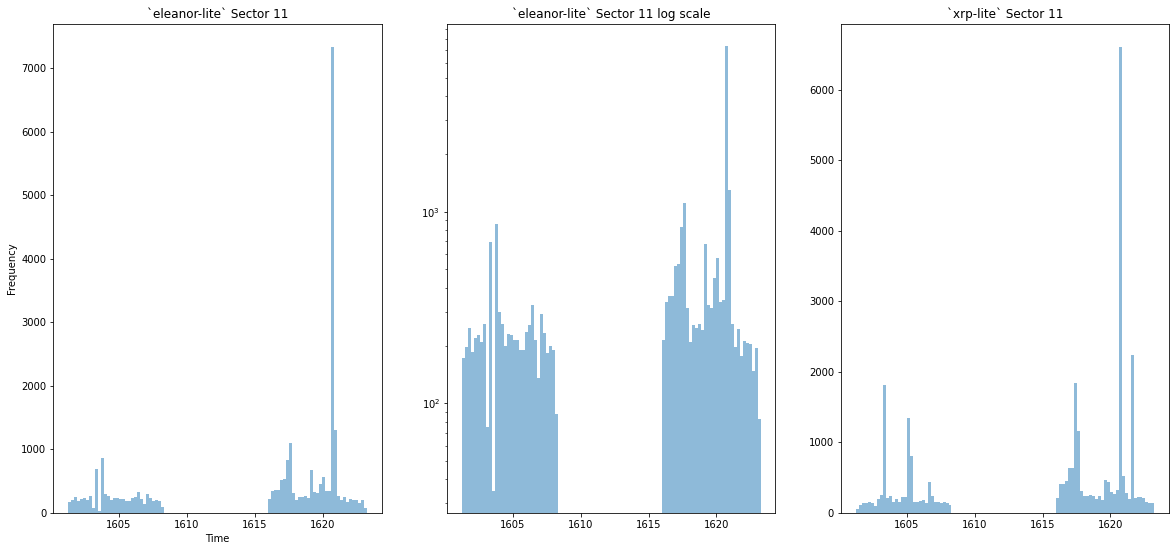

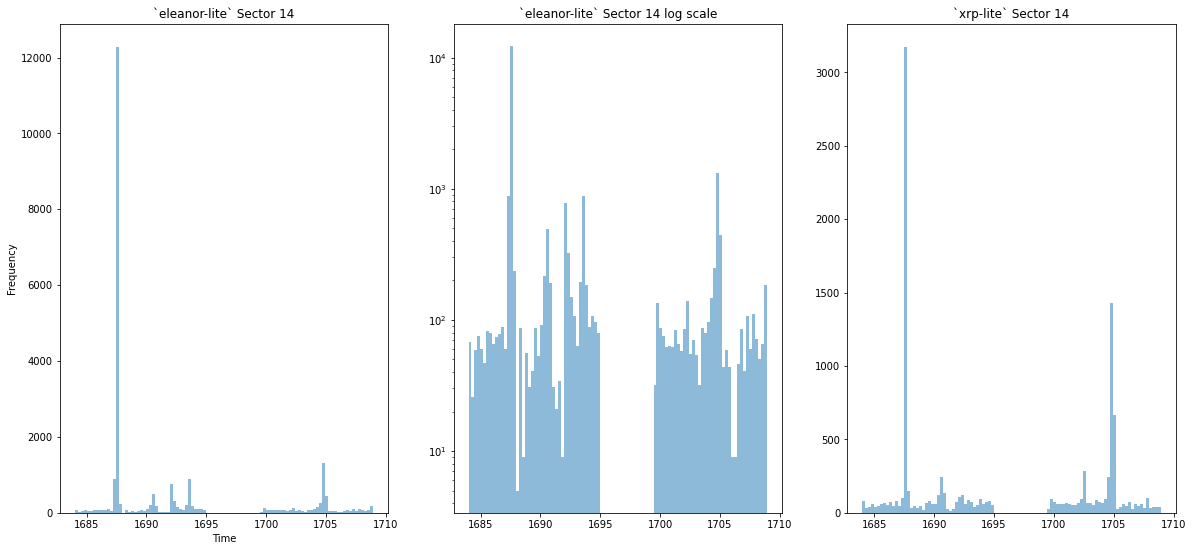

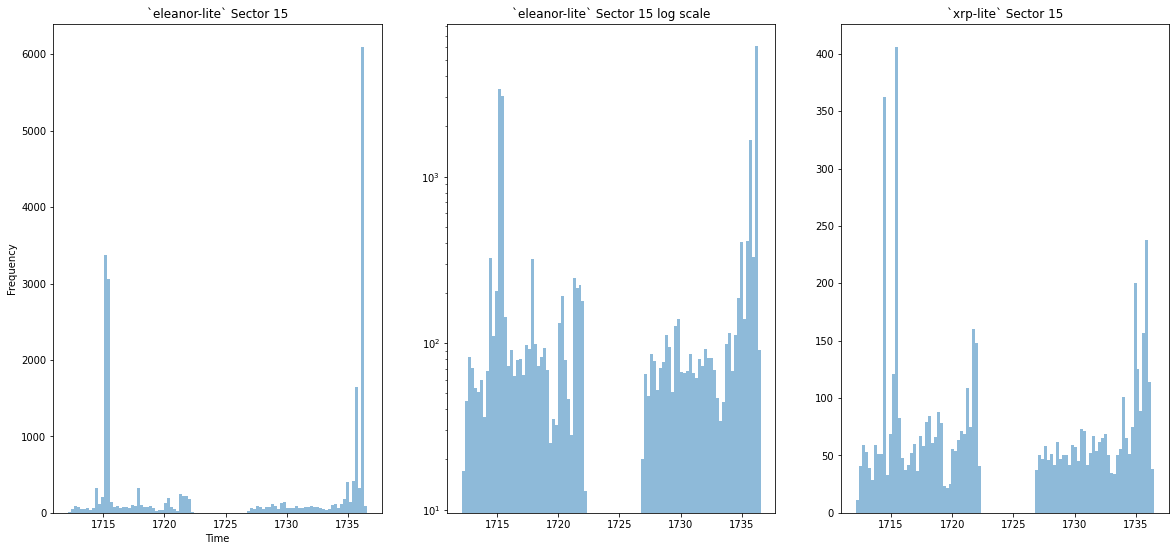

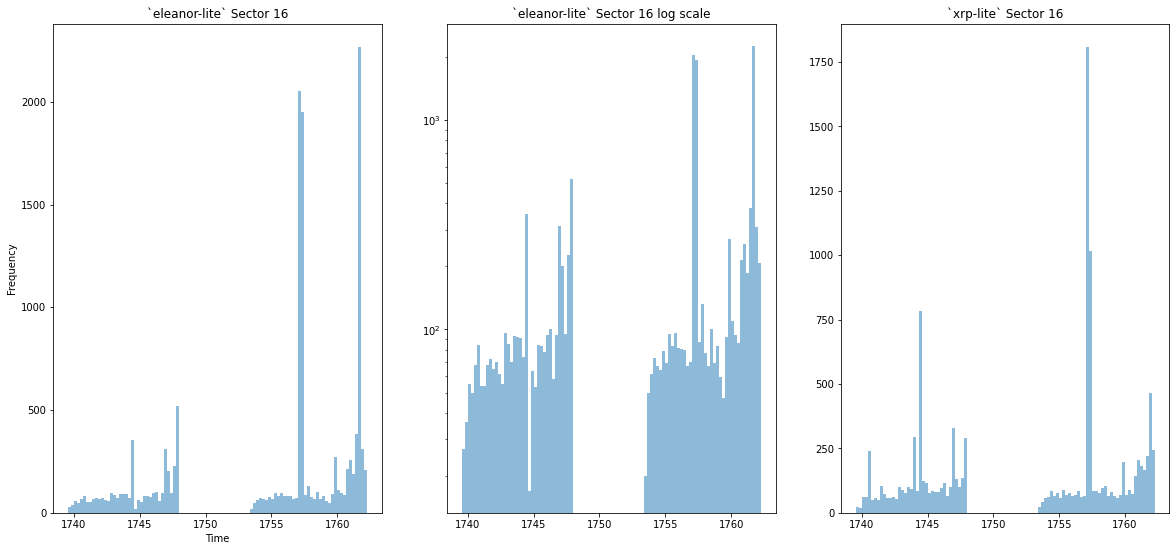

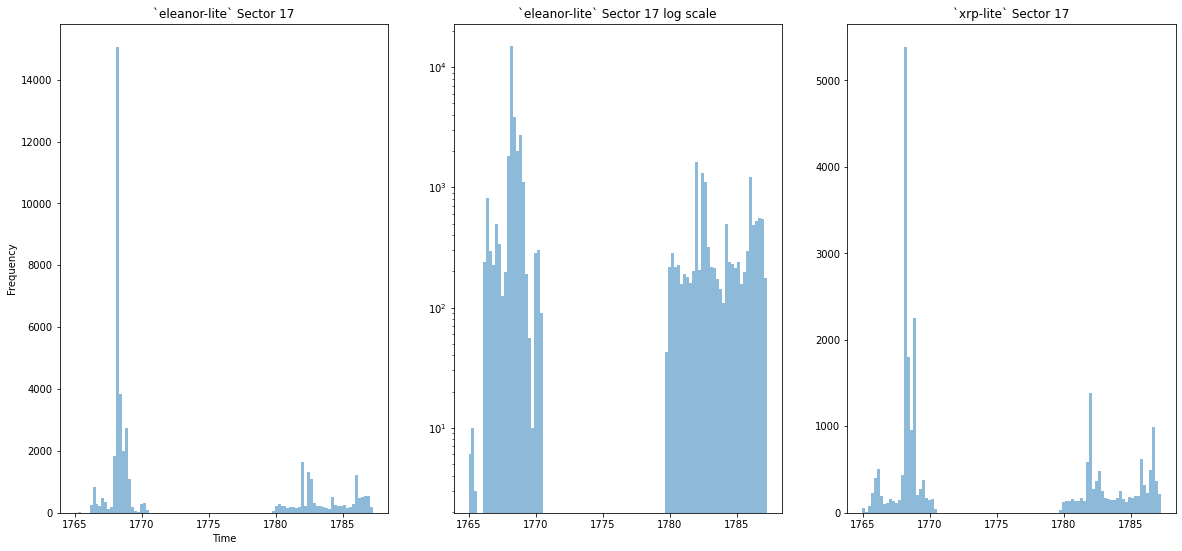

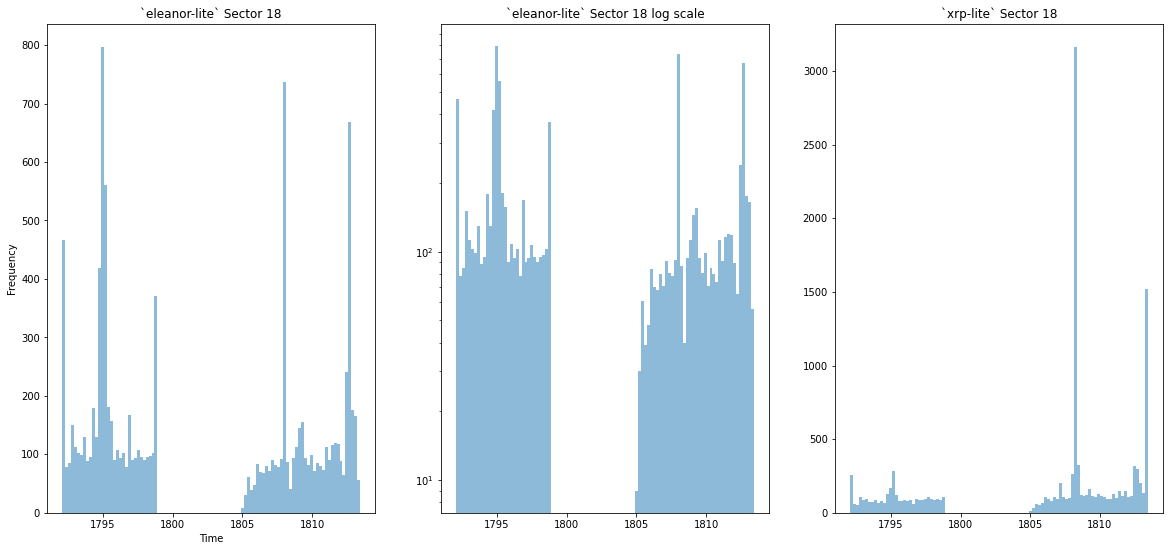

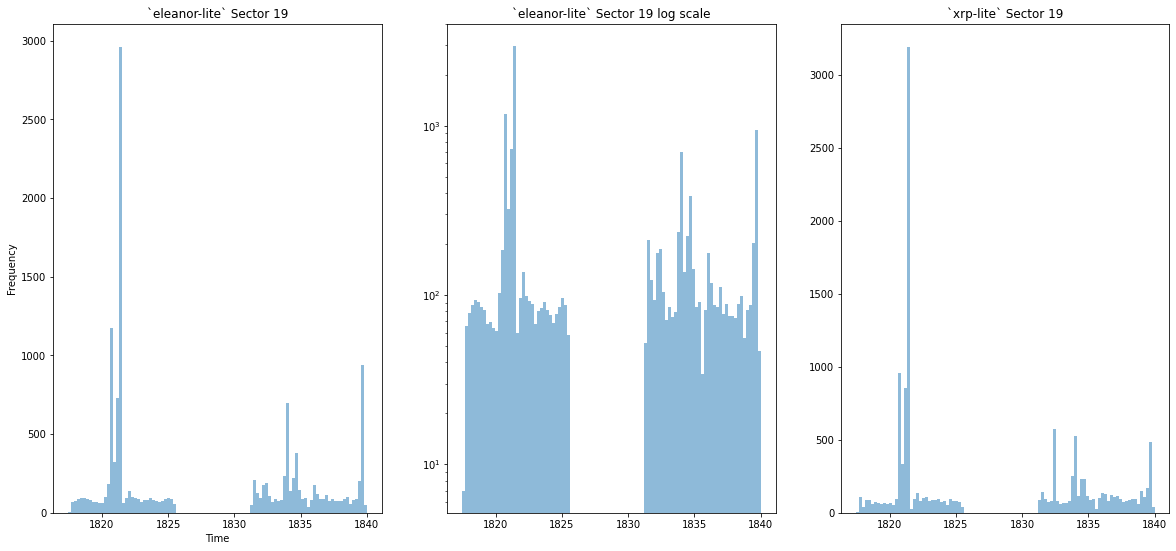

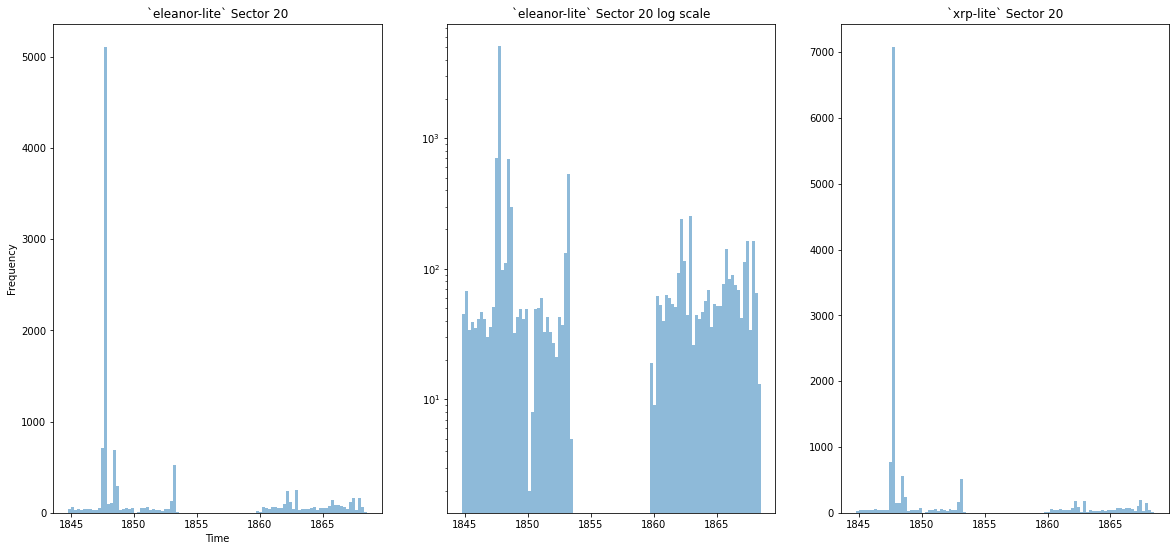

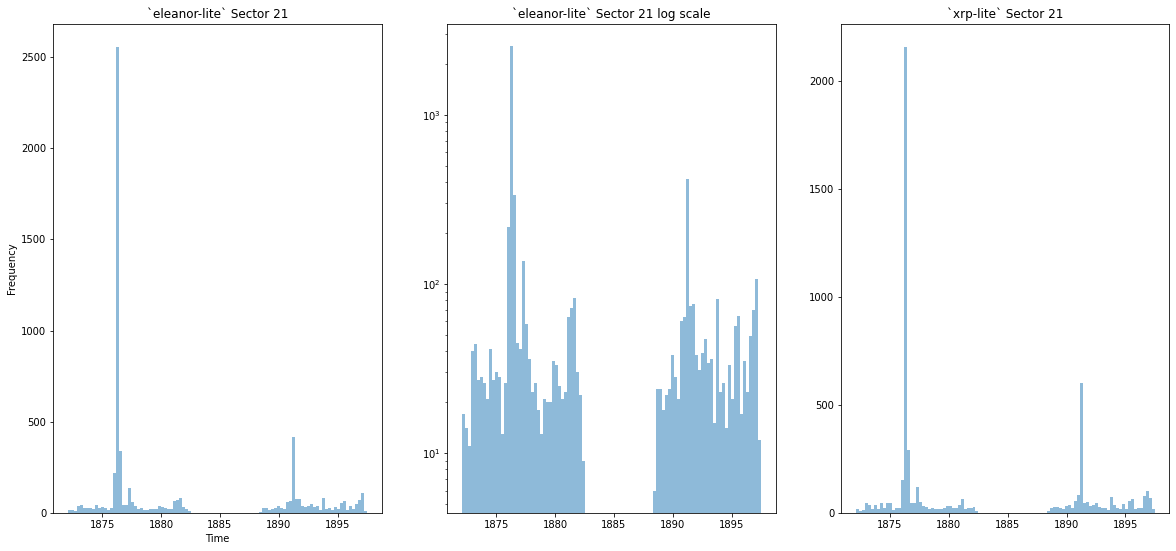

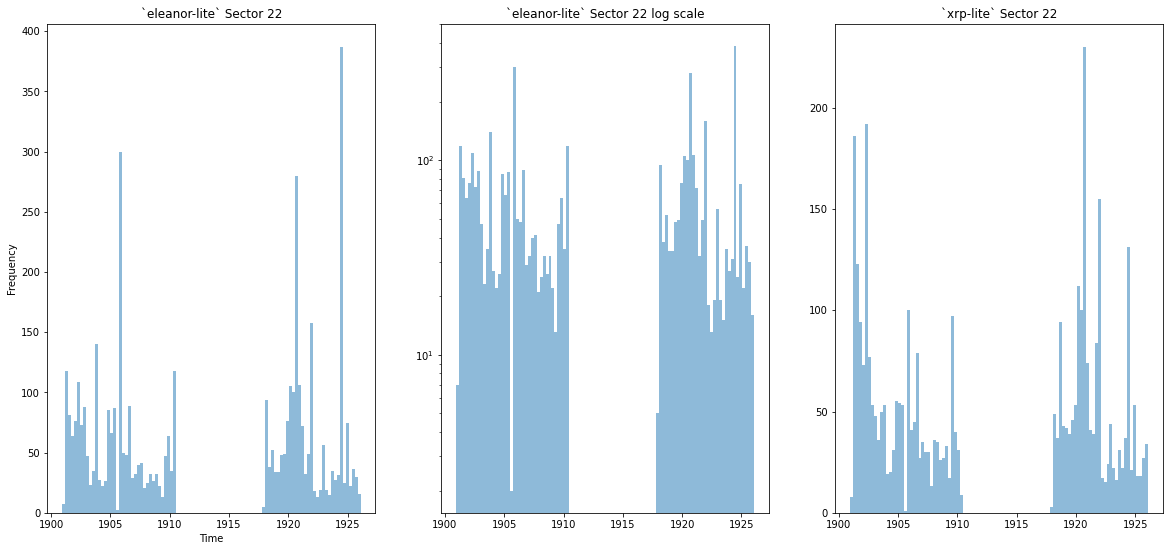

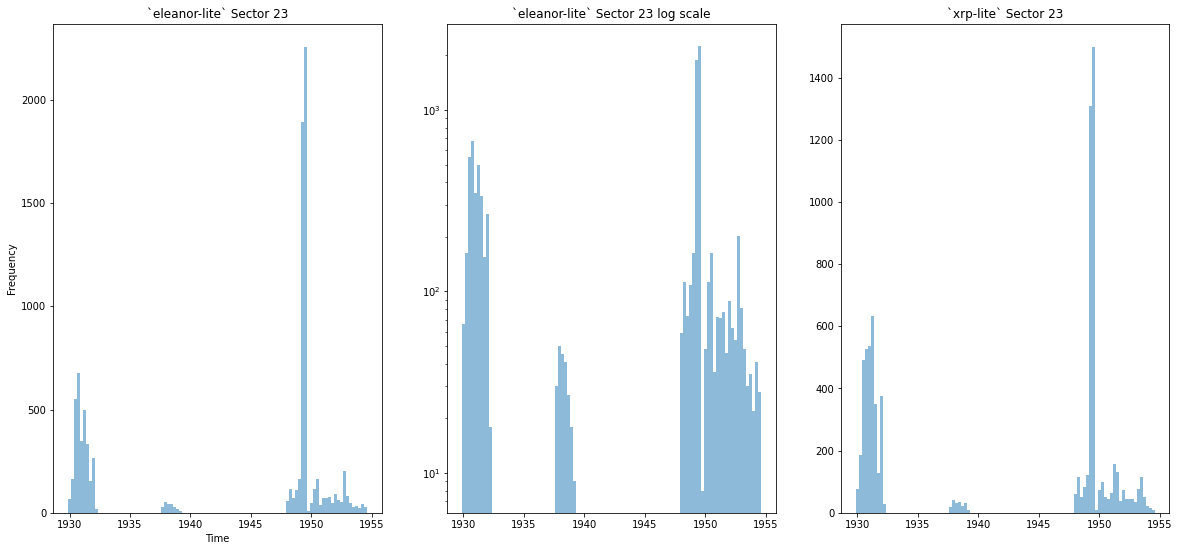

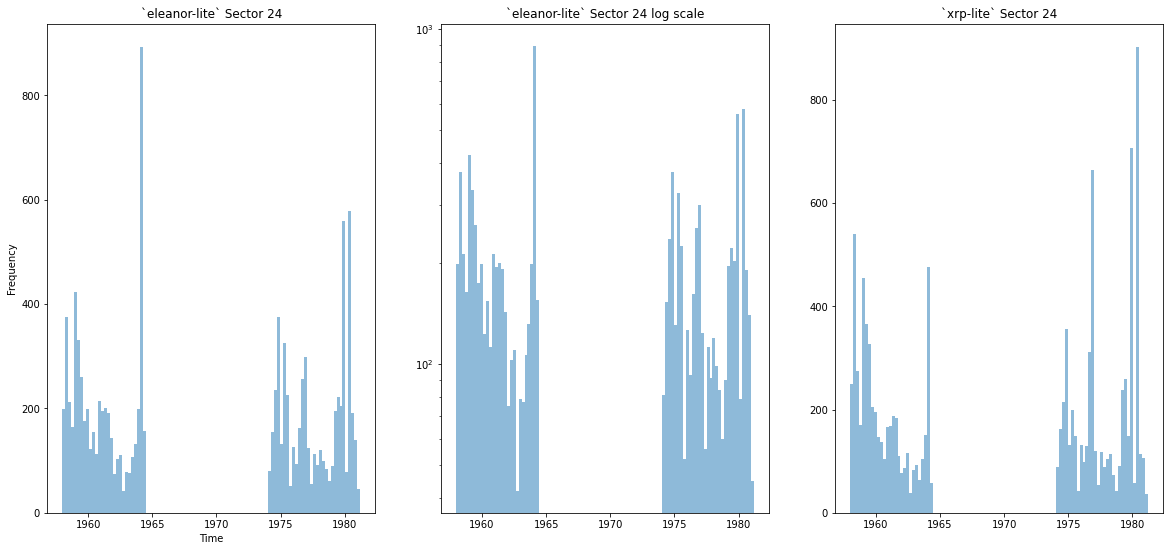

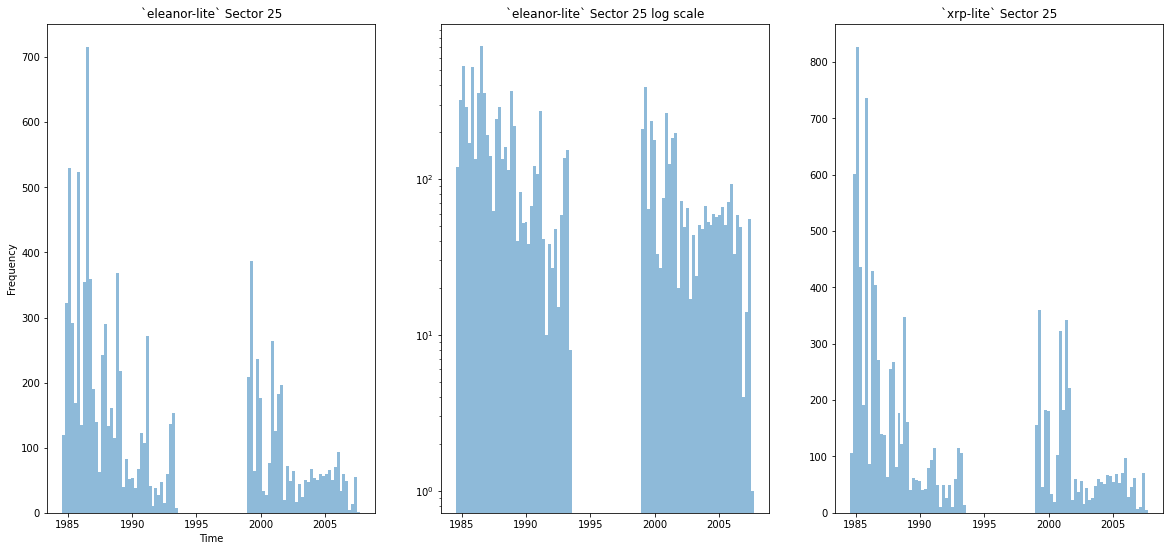

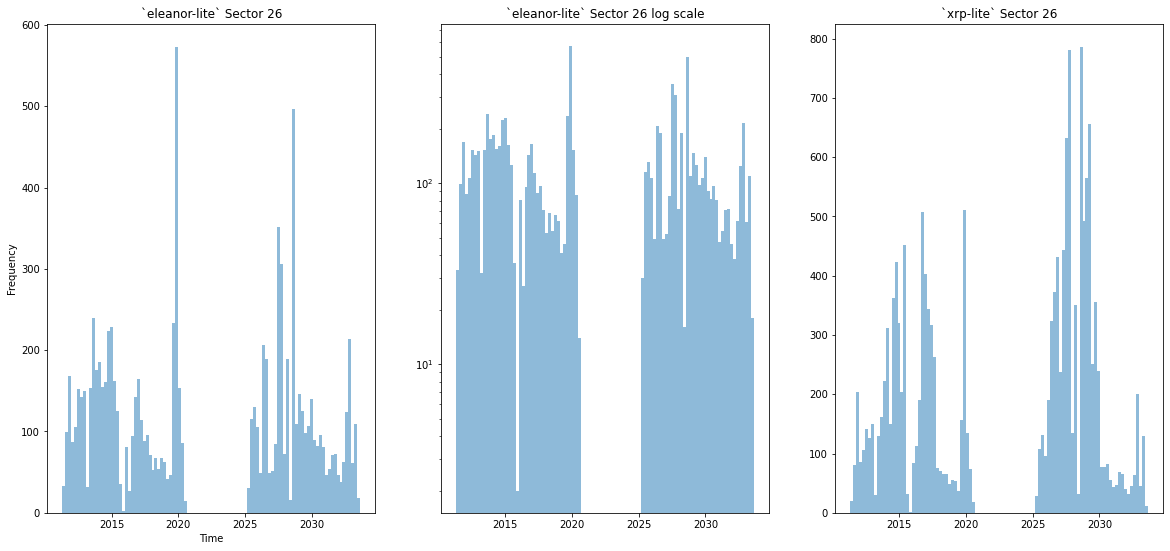

In [7]:
#data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    xrp_dataframe_name = 'xrpsector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
        data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)

        data = data[data.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        data = data[abs(data.snr) >= 5].reset_index(drop=True)

        
        data_xrp = globals()[xrp_dataframe_name]
        data_xrp = data_xrp[data_xrp.transit_prob == 'maybeTransit']
        data_xrp = data_xrp[(data_xrp.asym_score <= 3)].reset_index(drop=True)
        data_xrp = data_xrp[abs(data_xrp.snr) >= 5].reset_index(drop=True)

        #data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
        
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,3, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[1].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[2].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    ax[1].set_yscale('log')
    
    ax[0].set_title('`eleanor-lite` Sector {}'.format(sector))
    ax[1].set_title('`eleanor-lite` Sector {} log scale'.format(sector))
    ax[2].set_title('`xrp-lite` Sector {}'.format(sector))

    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')


## Distributions after the 0.4 day cut

Dataframe 'sector_8' not found. Moving to the next sector.
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.


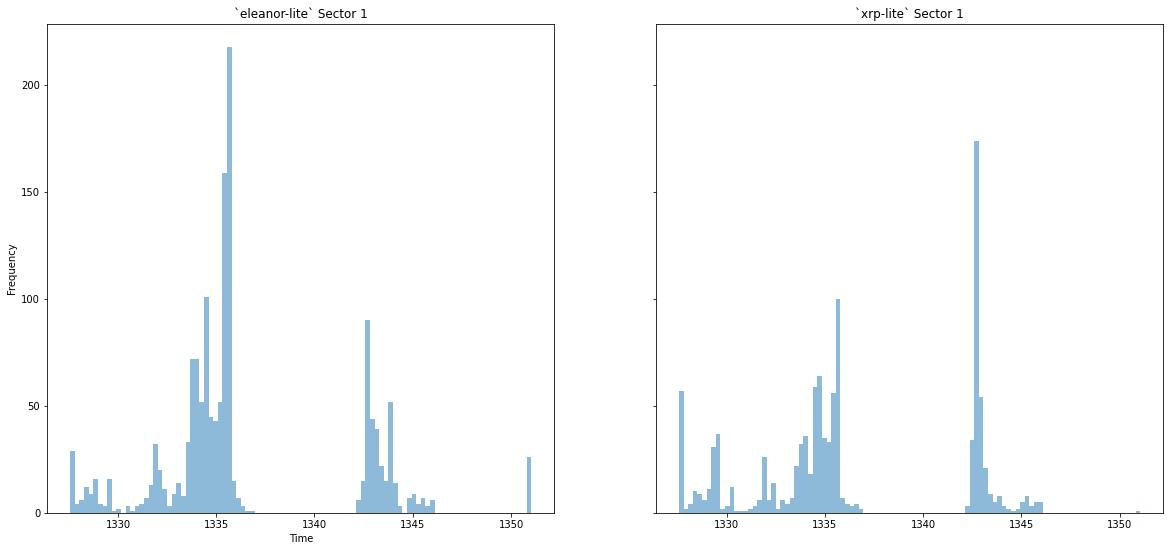

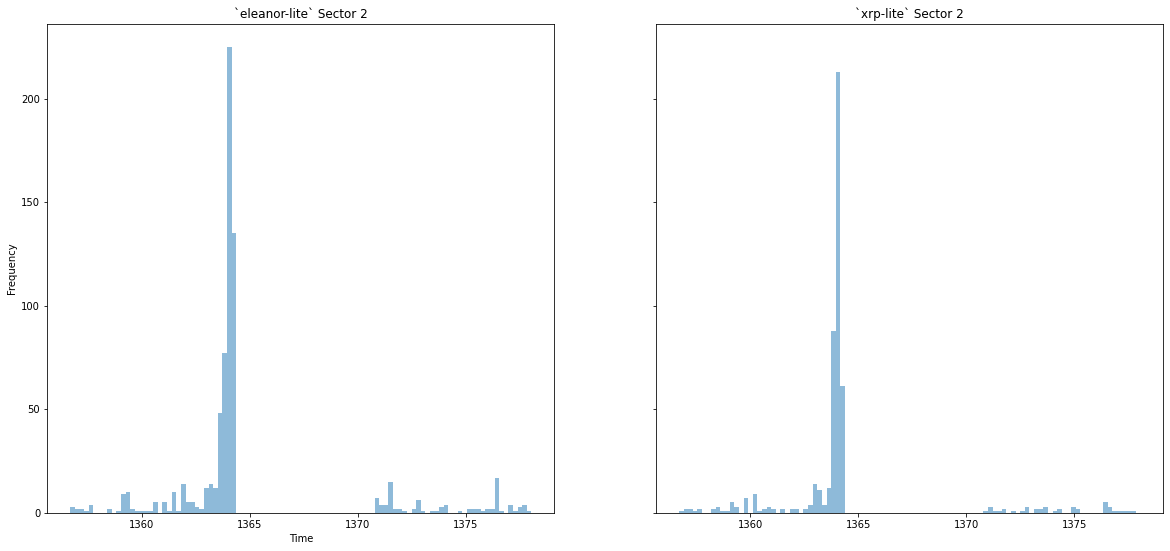

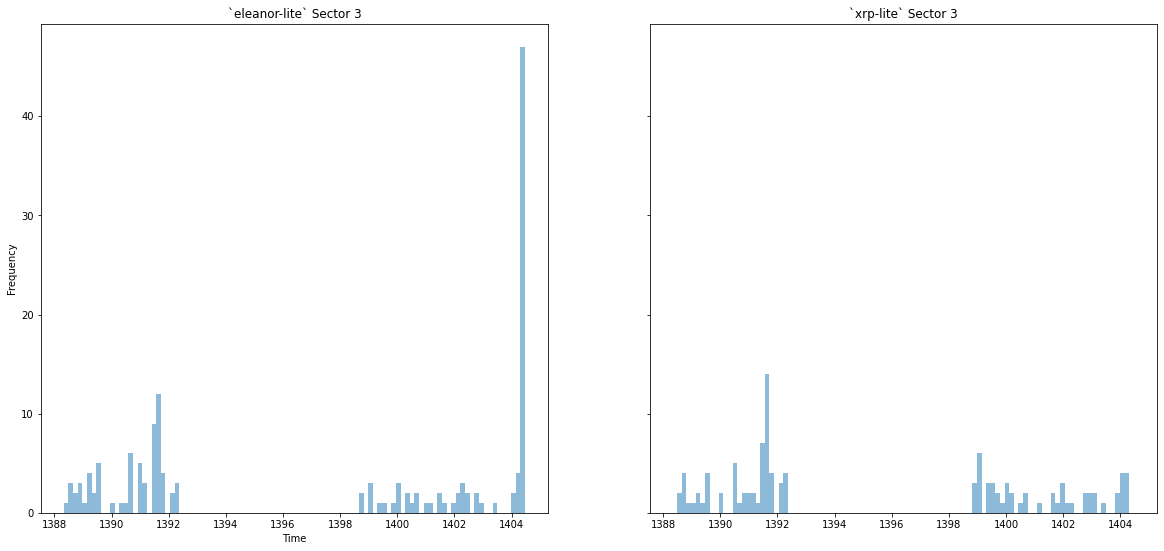

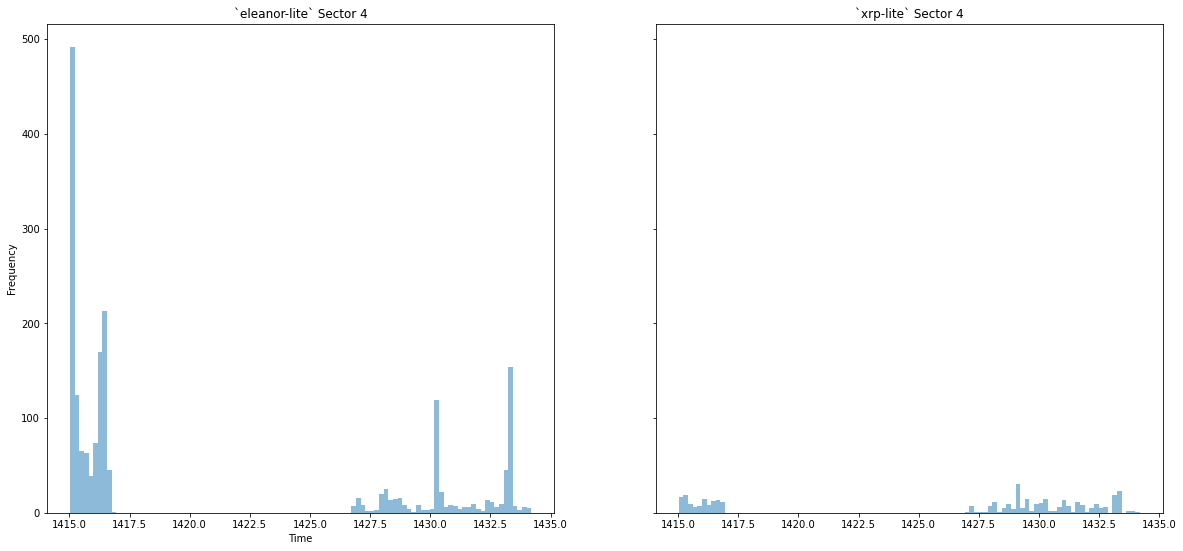

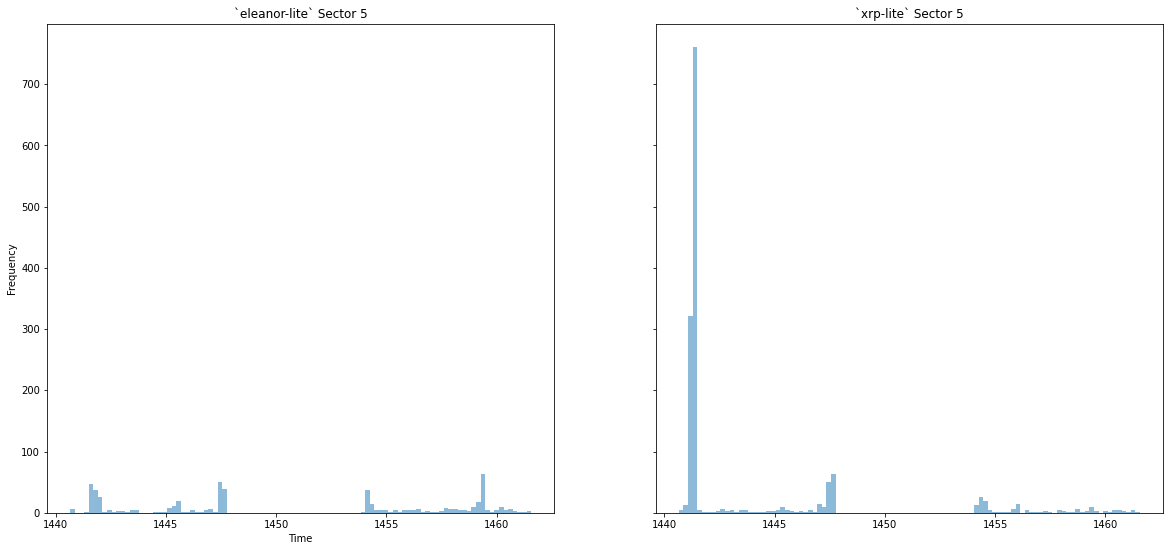

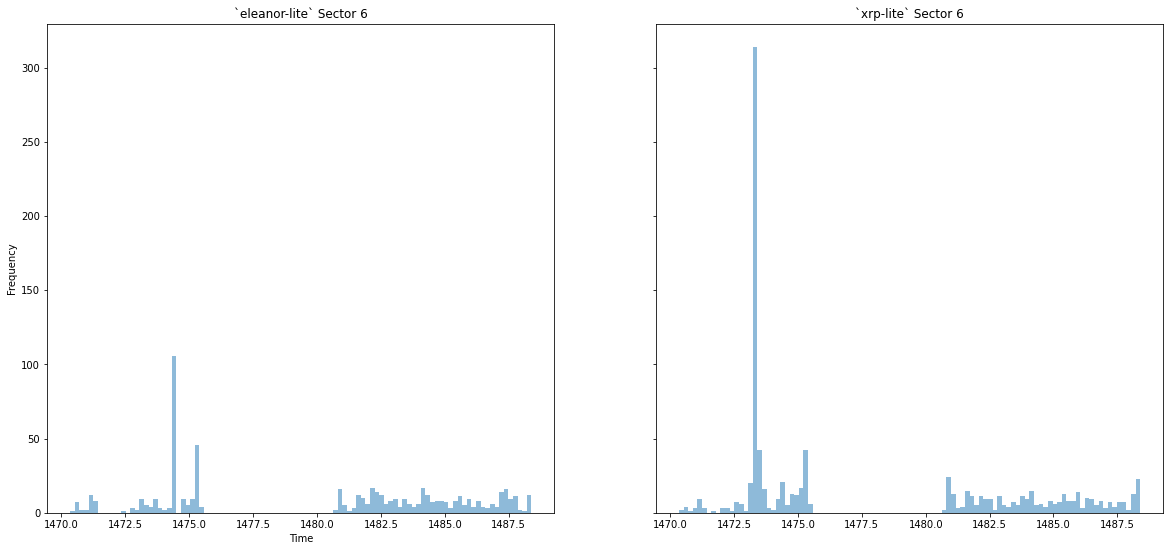

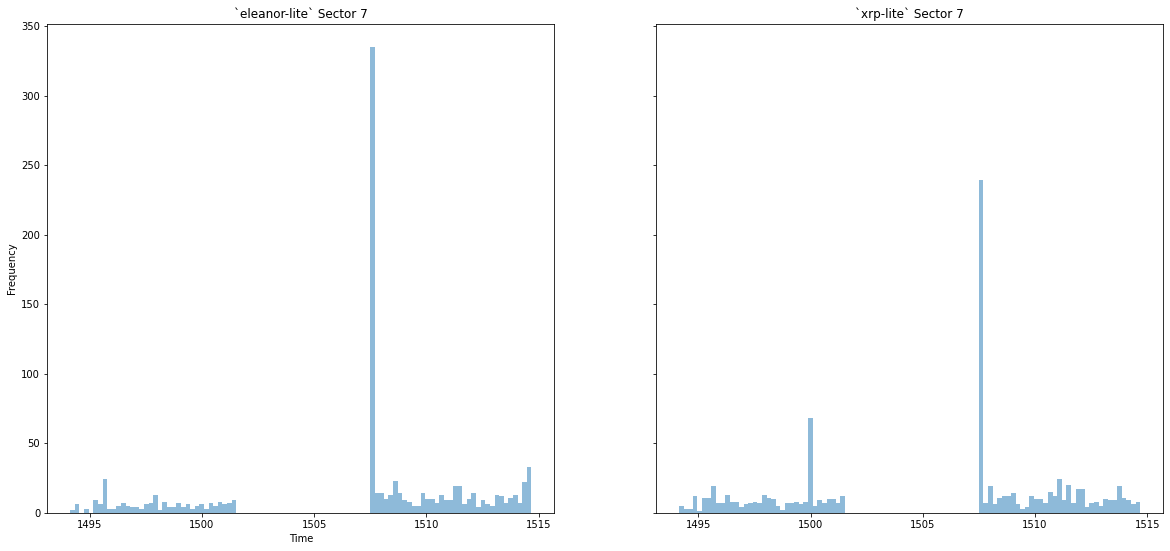

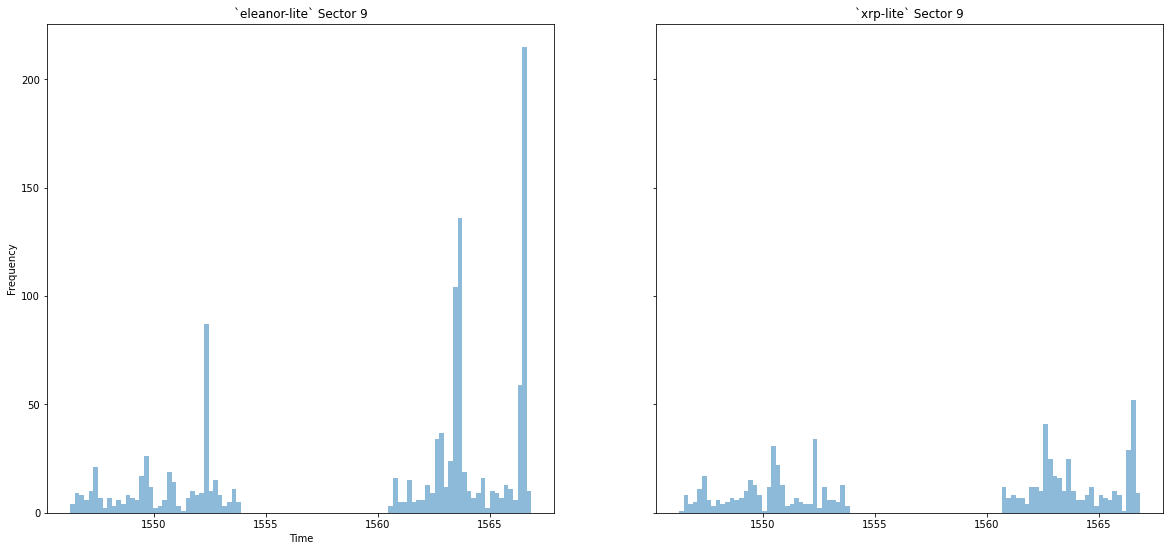

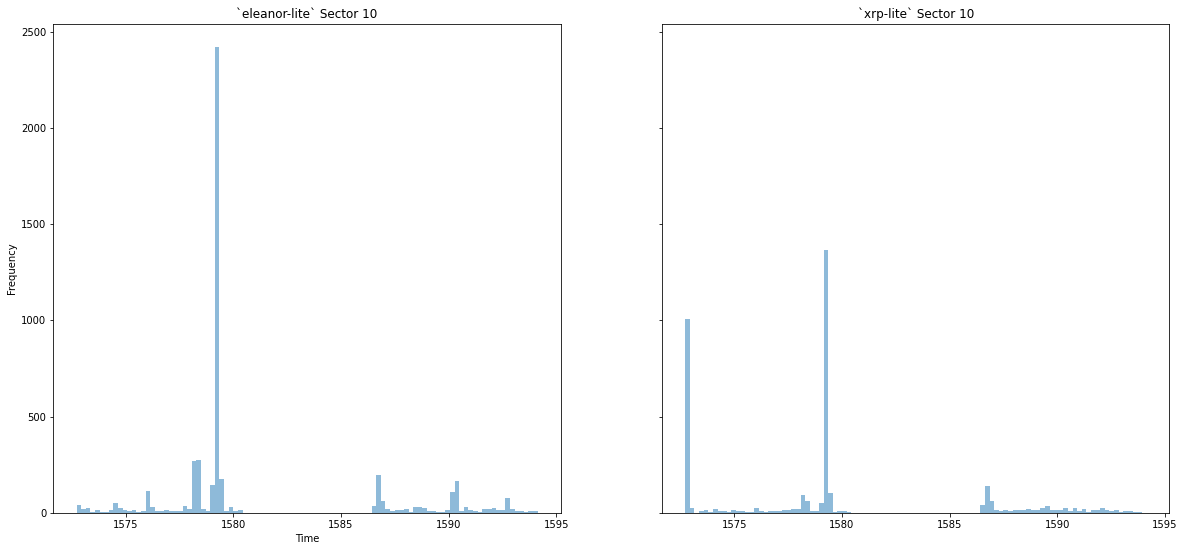

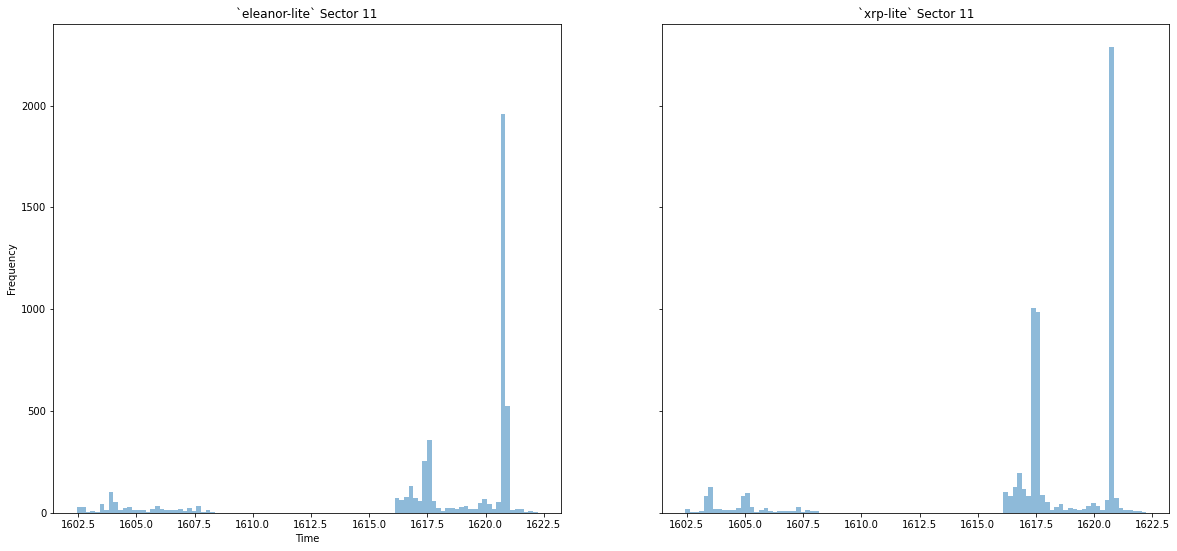

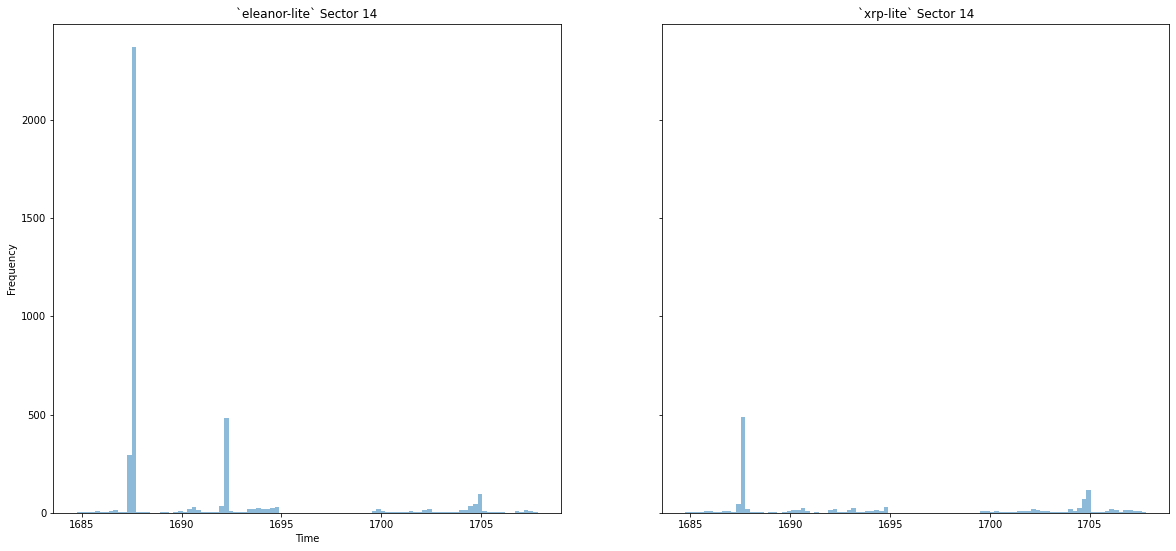

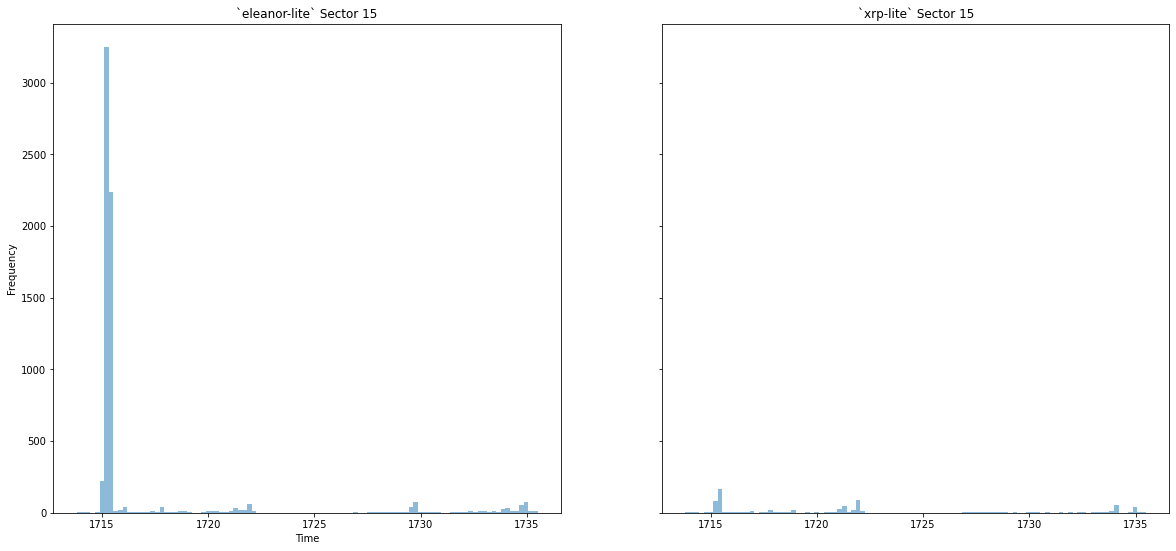

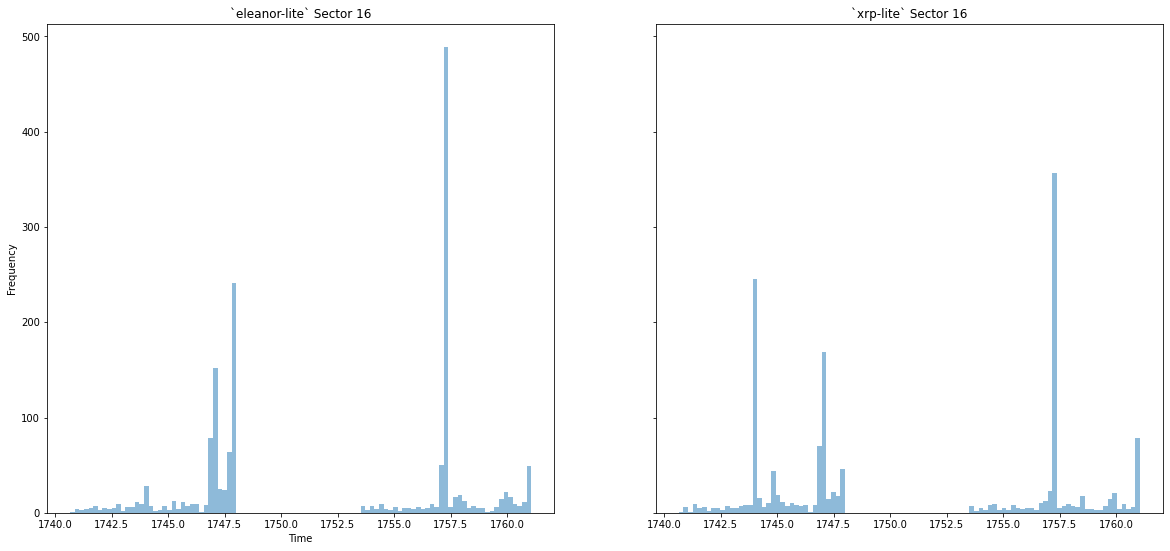

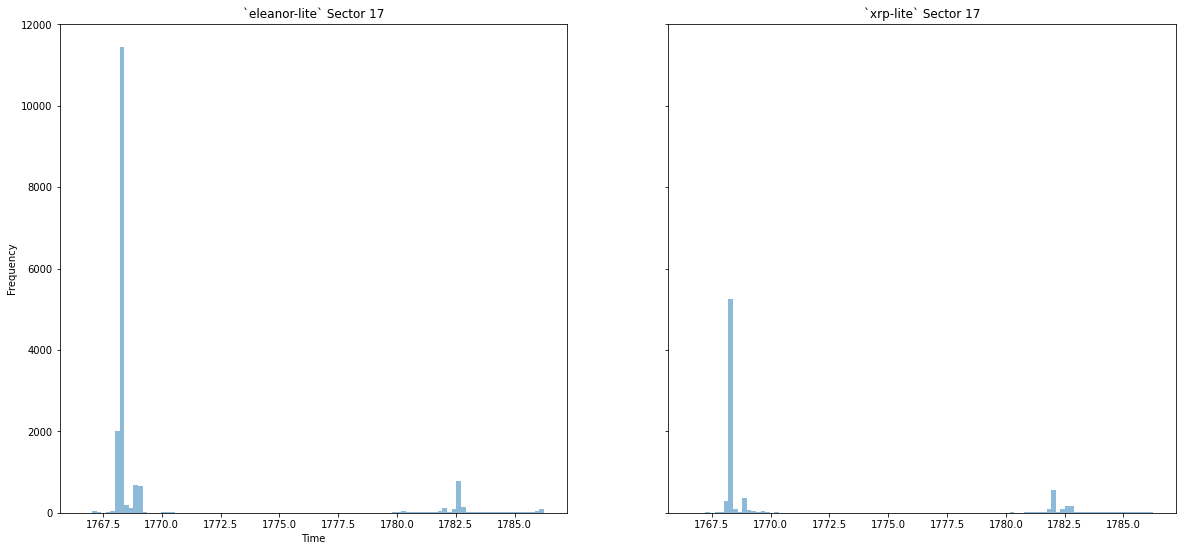

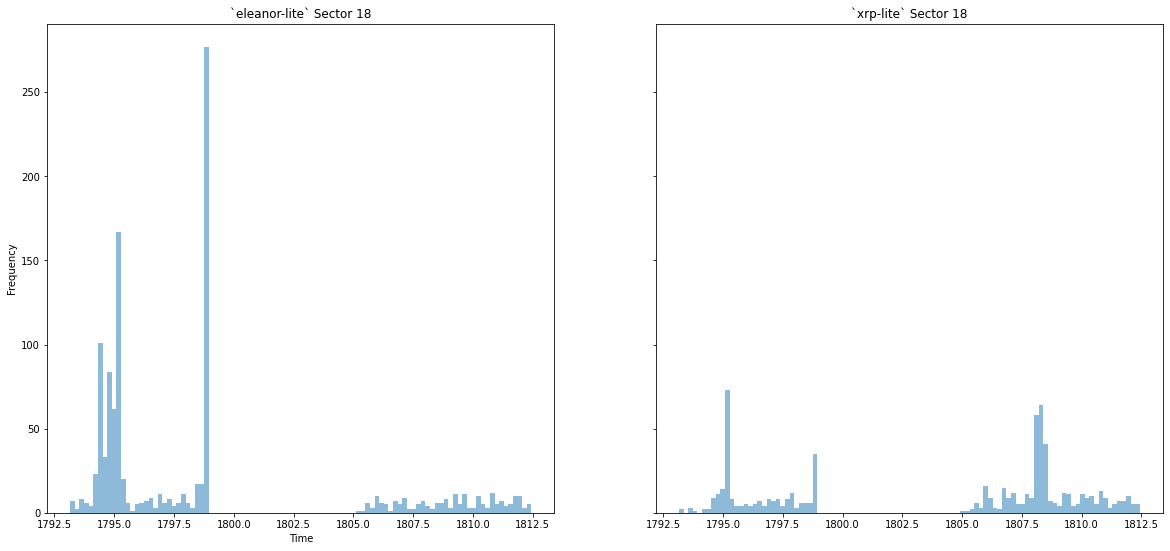

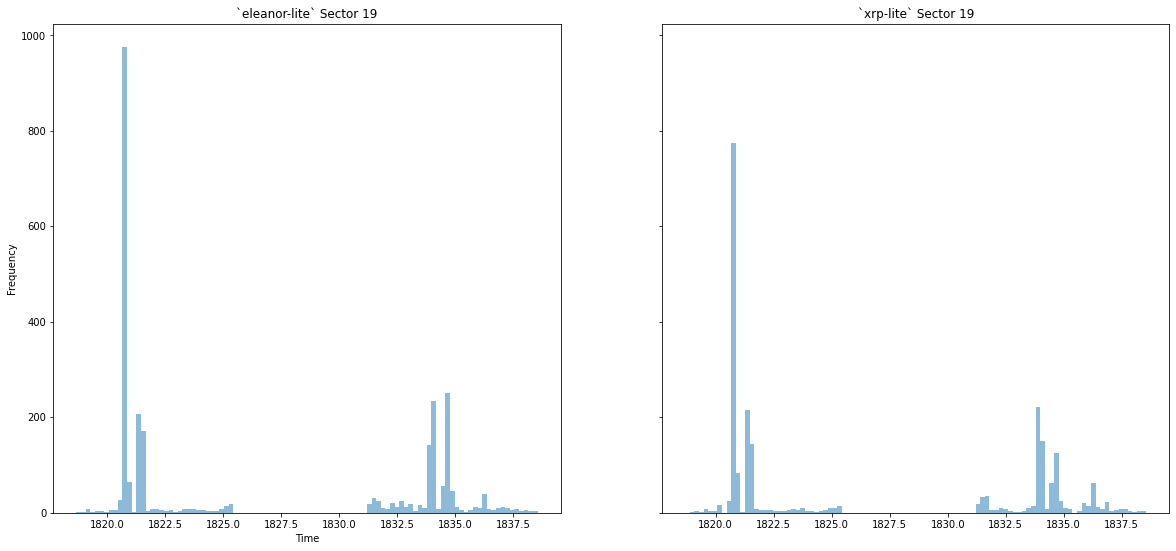

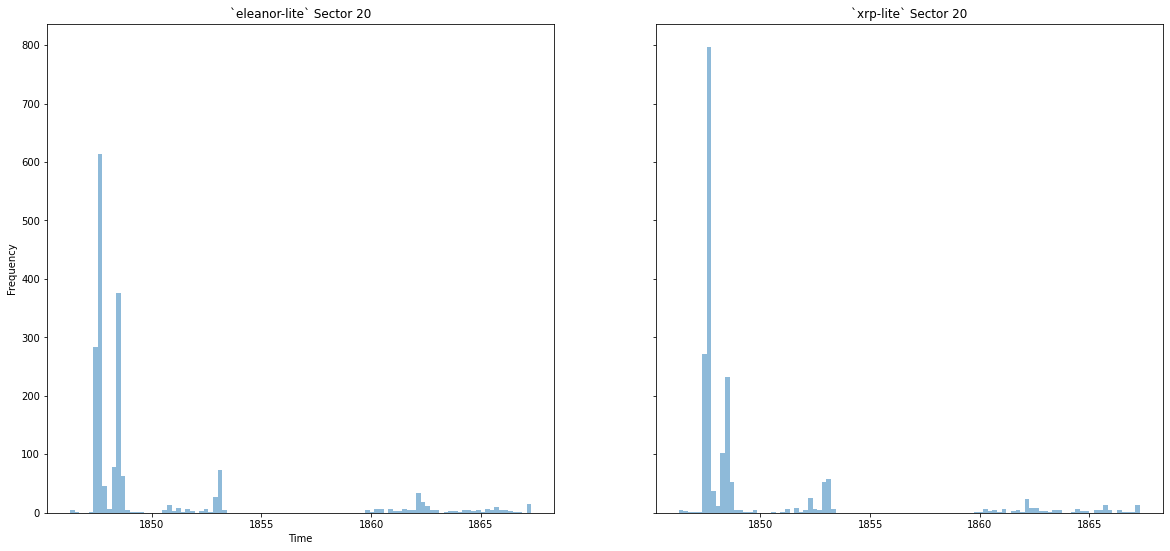

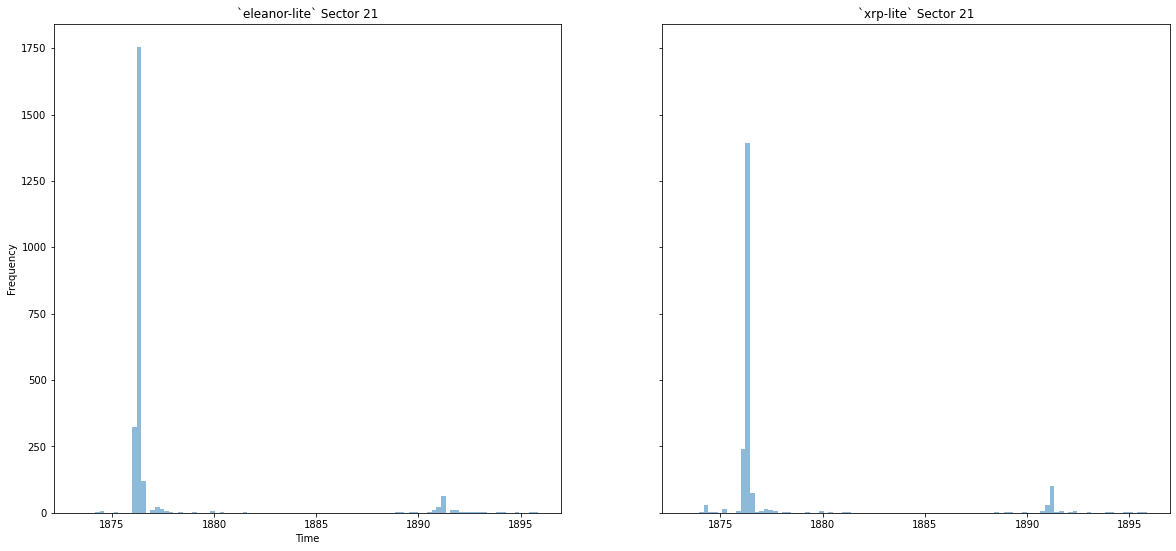

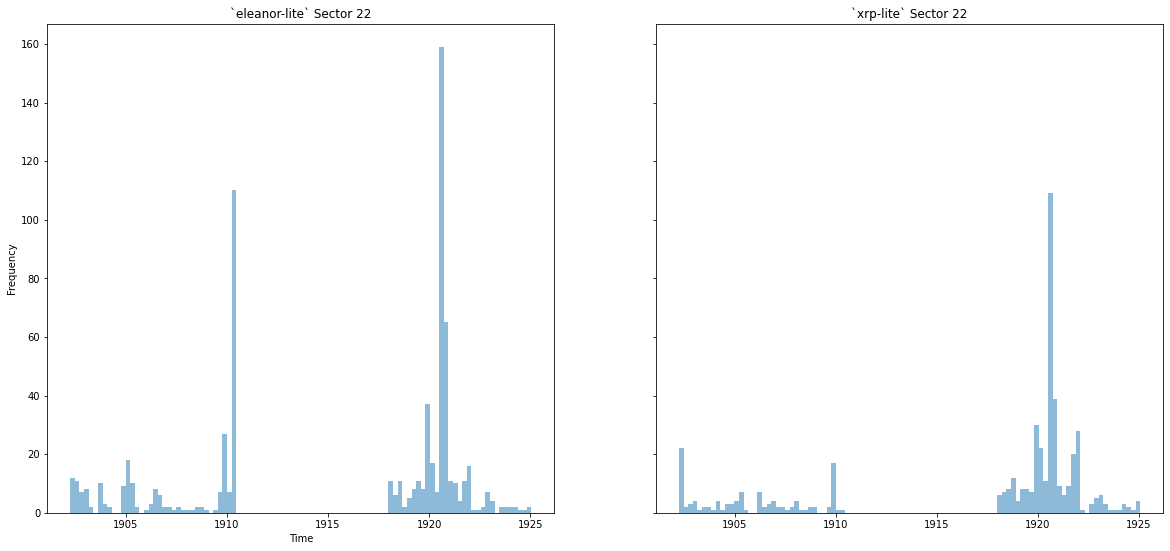

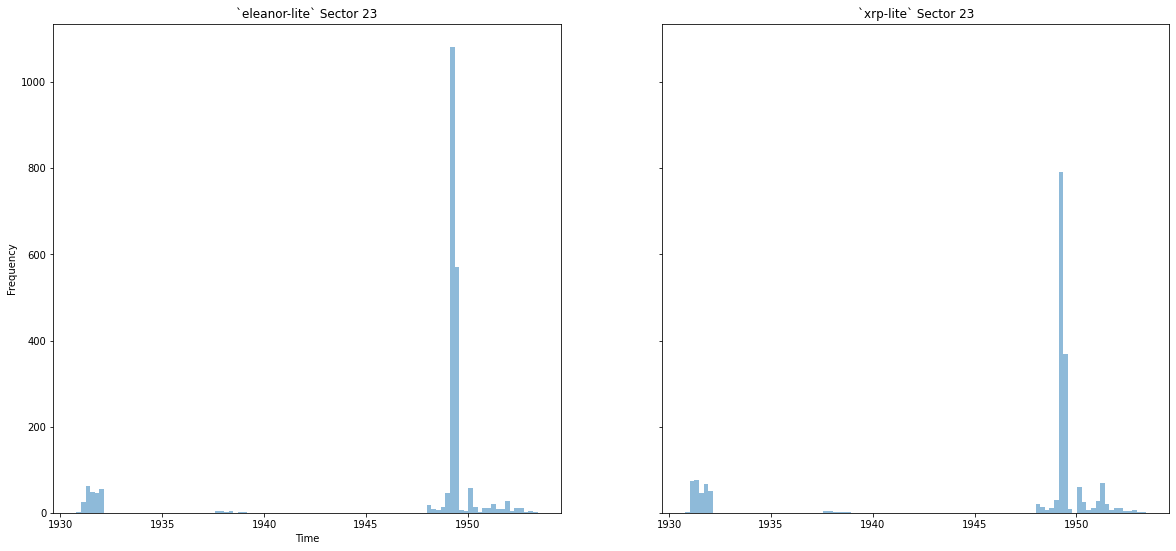

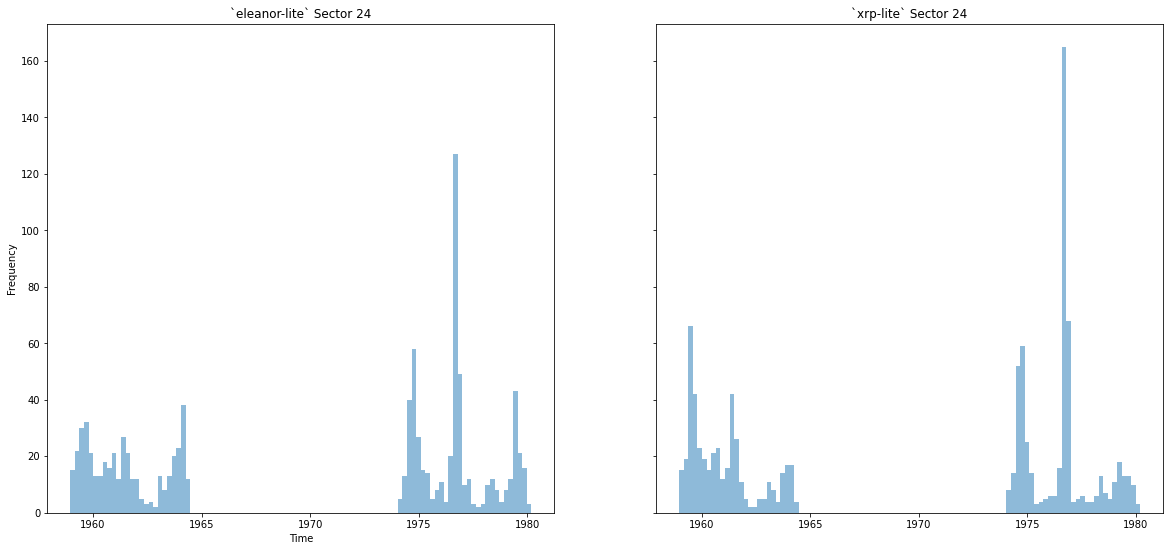

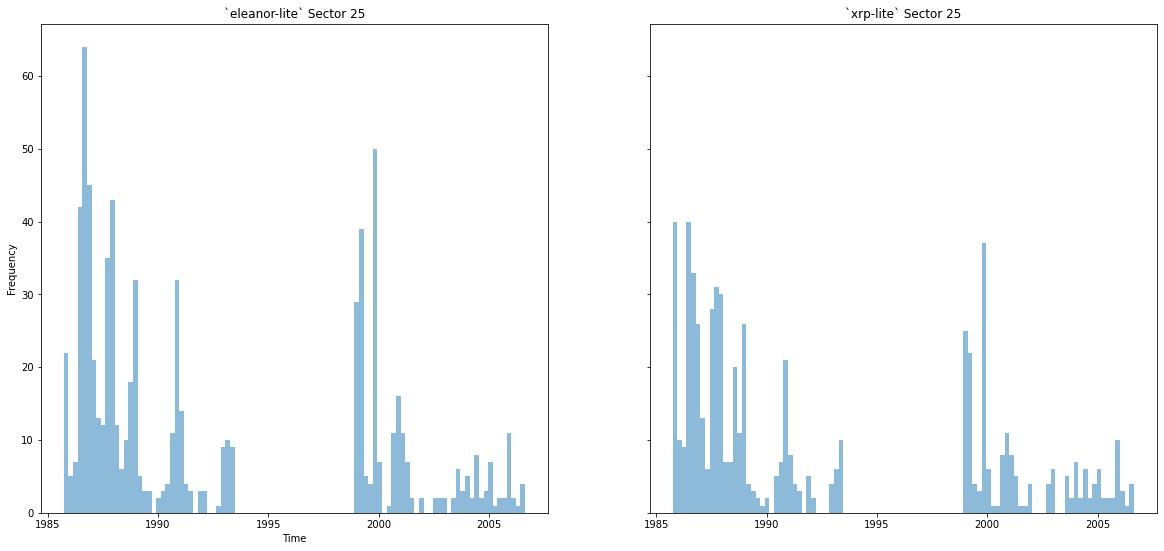

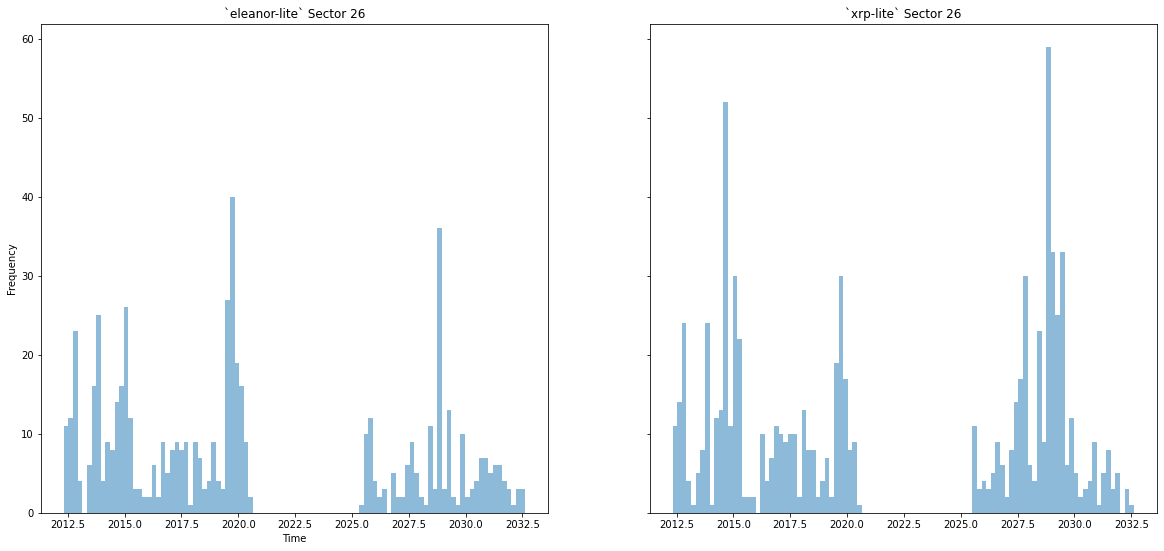

In [8]:
#data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    xrp_dataframe_name = 'xrpsector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
        data = data[data.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        data = data[abs(data.snr) >= 5].reset_index(drop=True)
        data.drop(data[data['duration'] <= 0.4].index, inplace=True)

        
        data_xrp = globals()[xrp_dataframe_name]
        data_xrp = data_xrp[data_xrp.transit_prob == 'maybeTransit']
        data_xrp = data_xrp[(data_xrp.asym_score <= 3)].reset_index(drop=True)
        data_xrp = data_xrp[abs(data_xrp.snr) >= 5].reset_index(drop=True)
        data_xrp.drop(data_xrp[data_xrp['duration'] <= 0.4].index, inplace=True)
        
        #data_new['abs_depth'] = abs(data_new.depth)
        #data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
        
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9),sharey=True)
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    
    ax[0].set_title('`eleanor-lite` Sector {}'.format(sector))
    ax[1].set_title('`xrp-lite` Sector {}'.format(sector))

    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')


## Distributions after a 0.01 depth cut

Dataframe 'sector_8' not found. Moving to the next sector.
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.


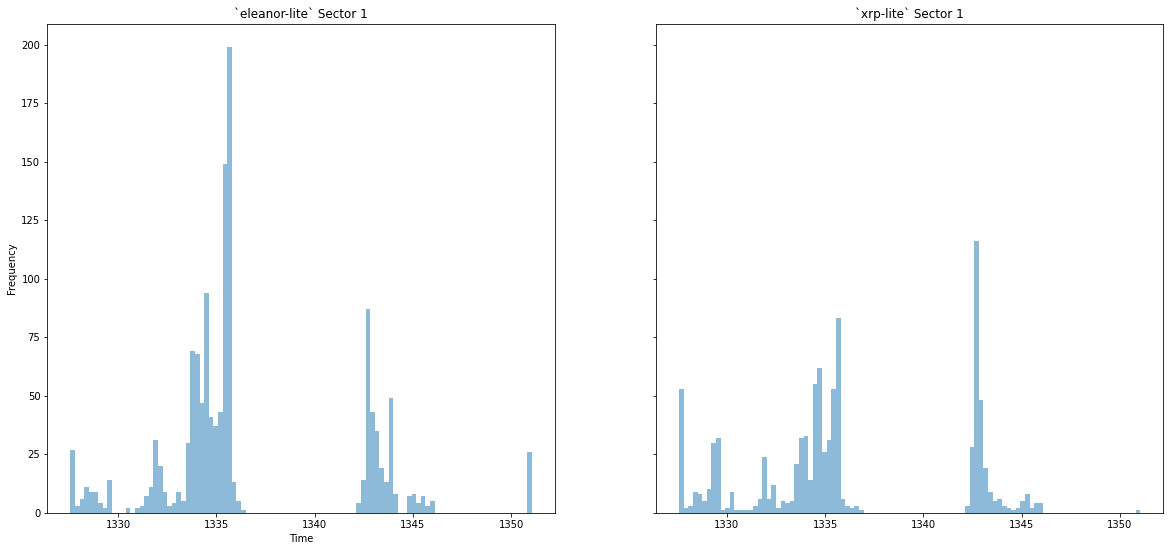

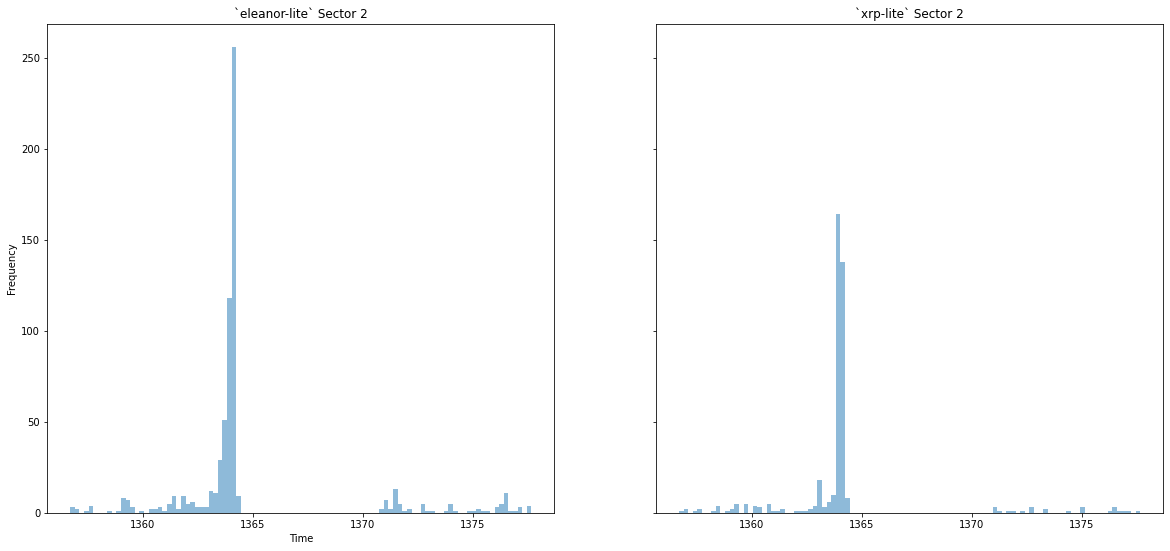

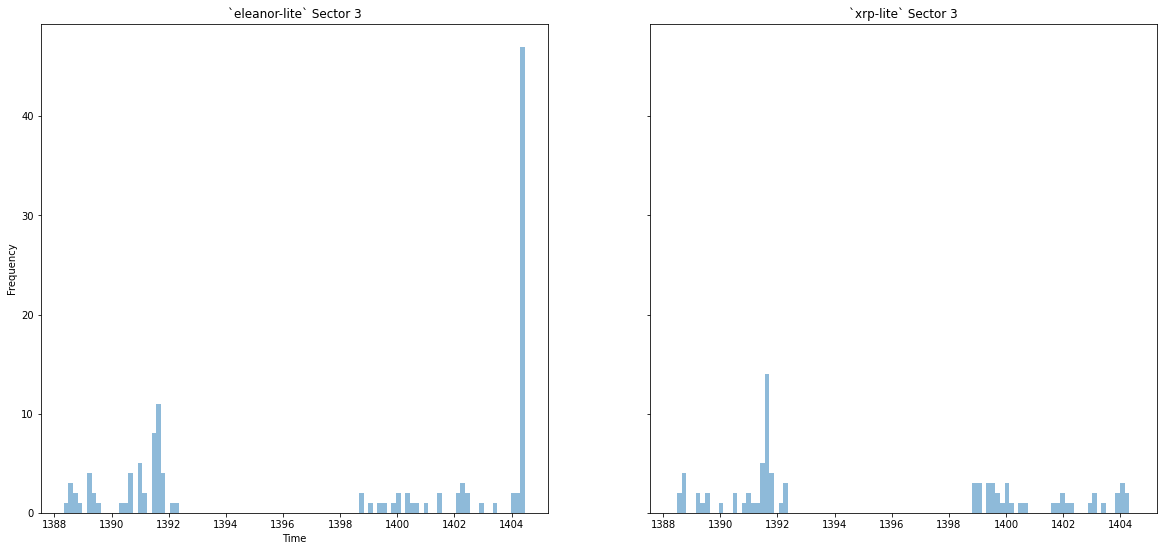

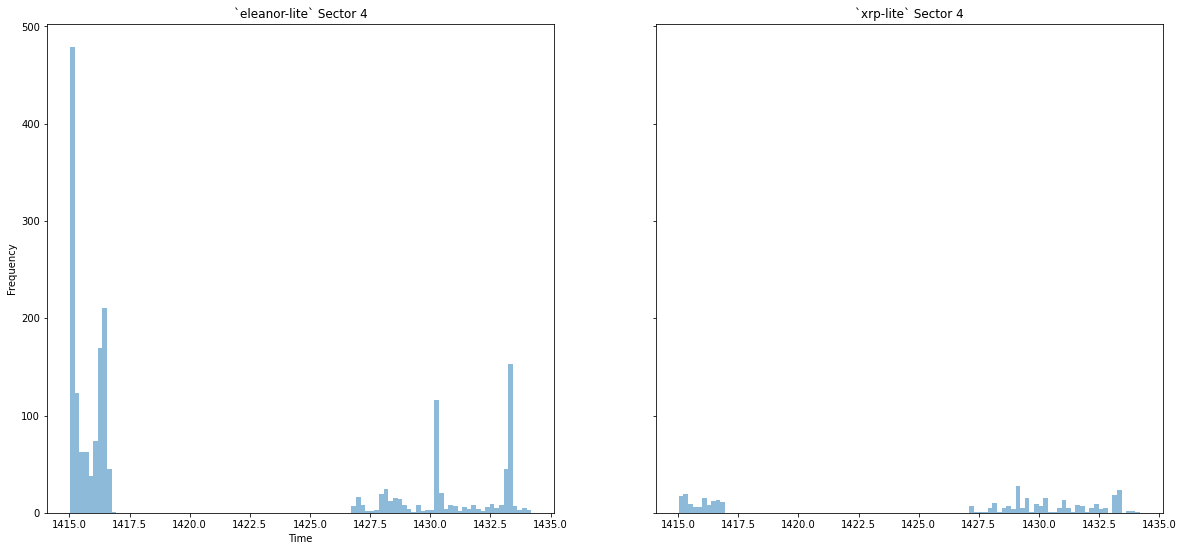

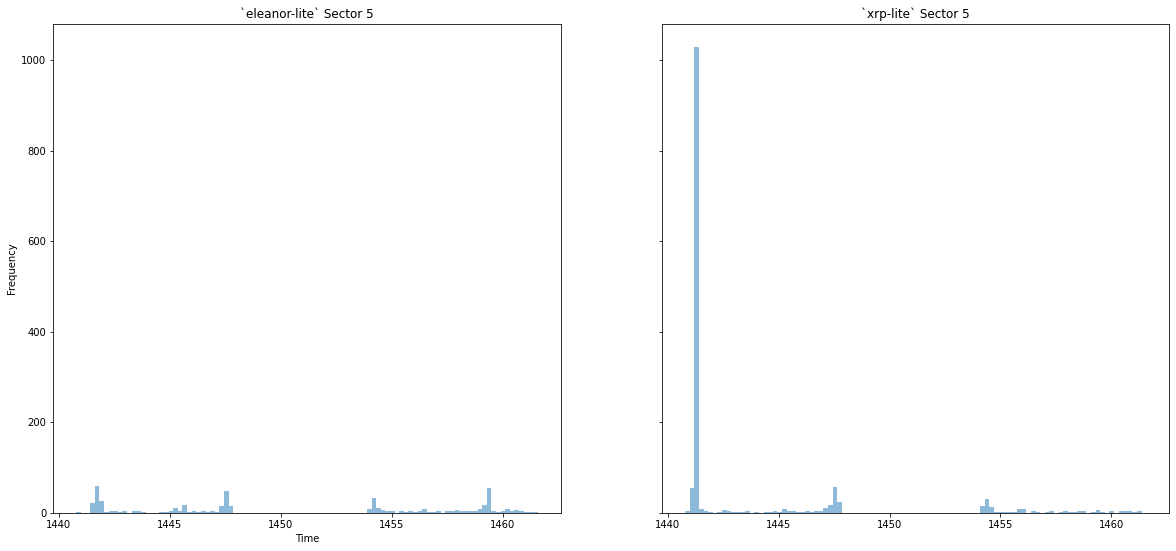

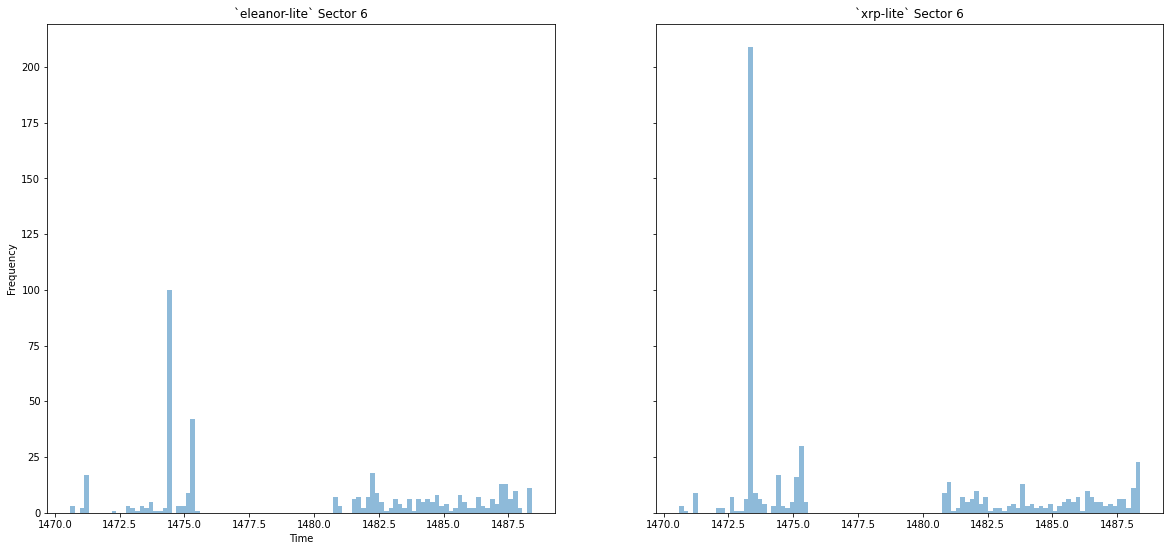

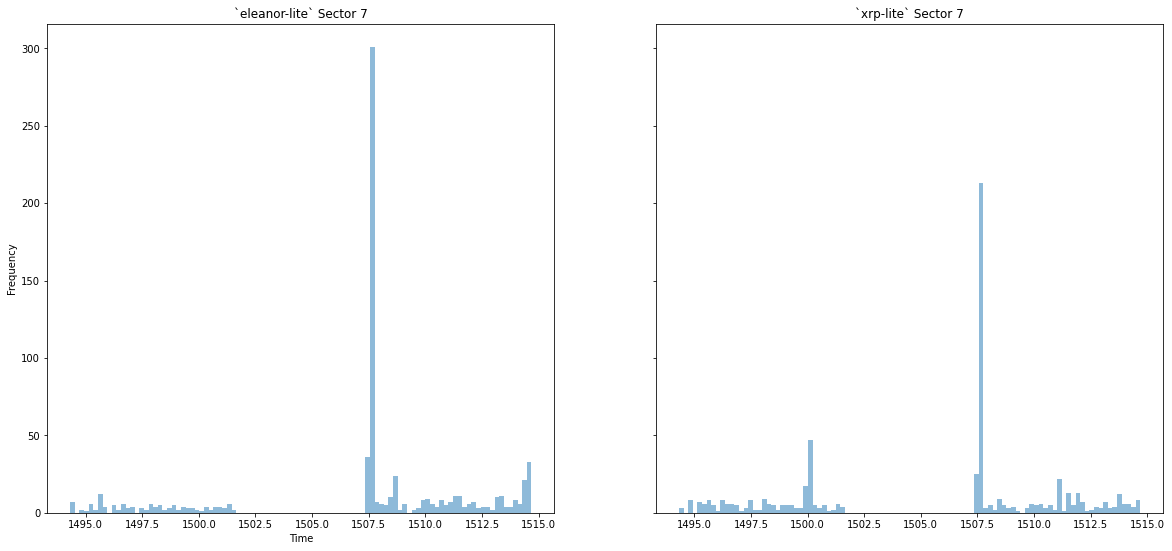

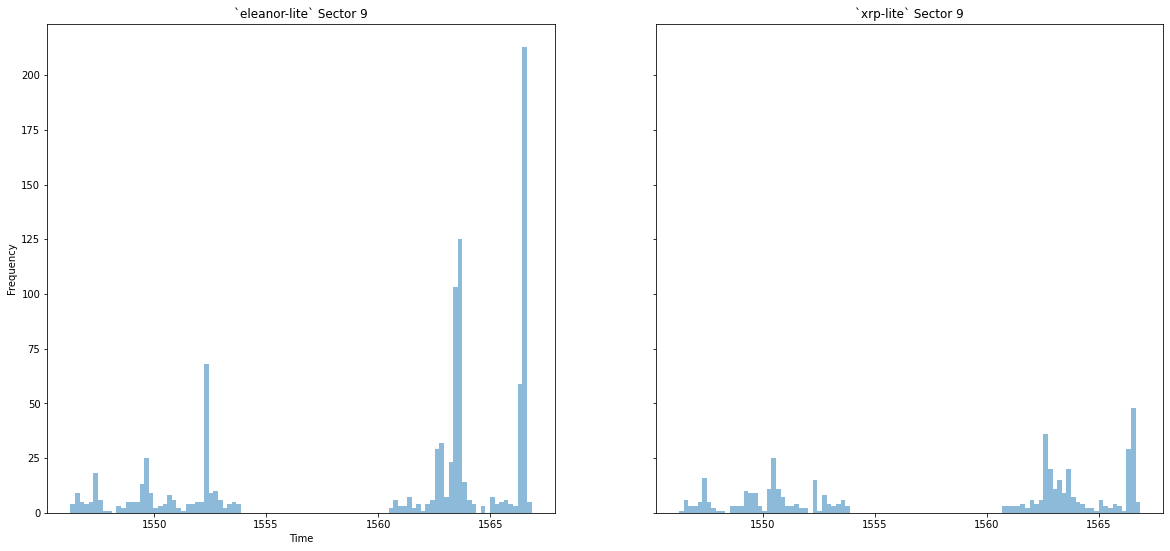

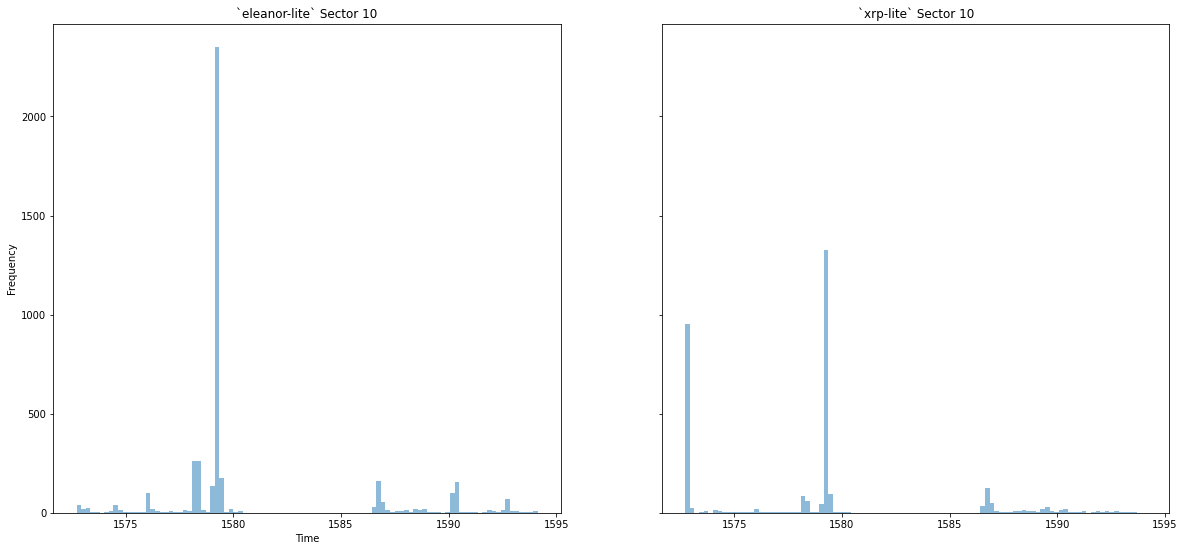

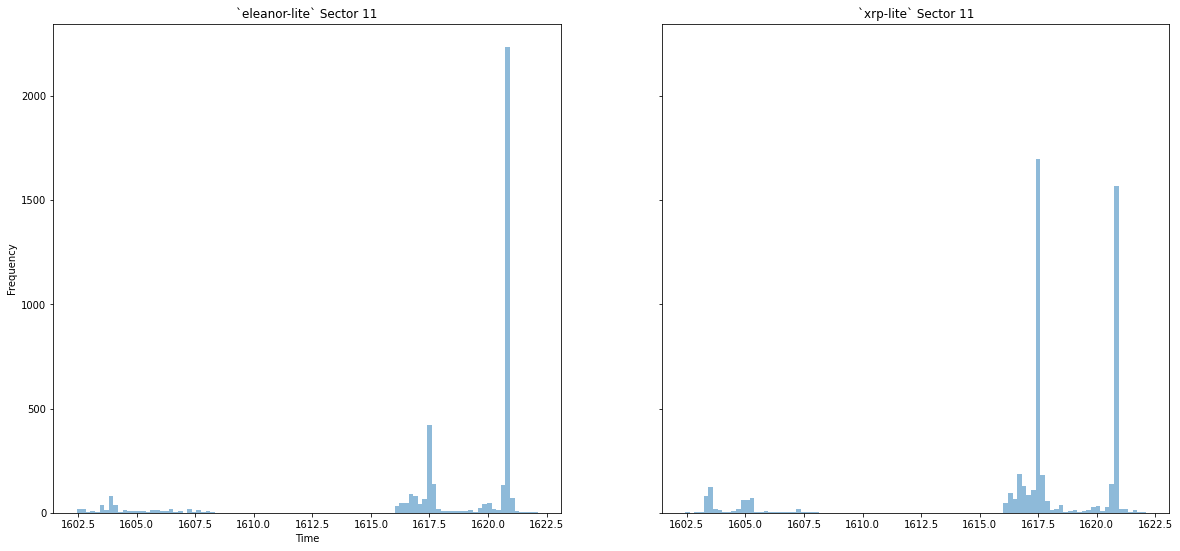

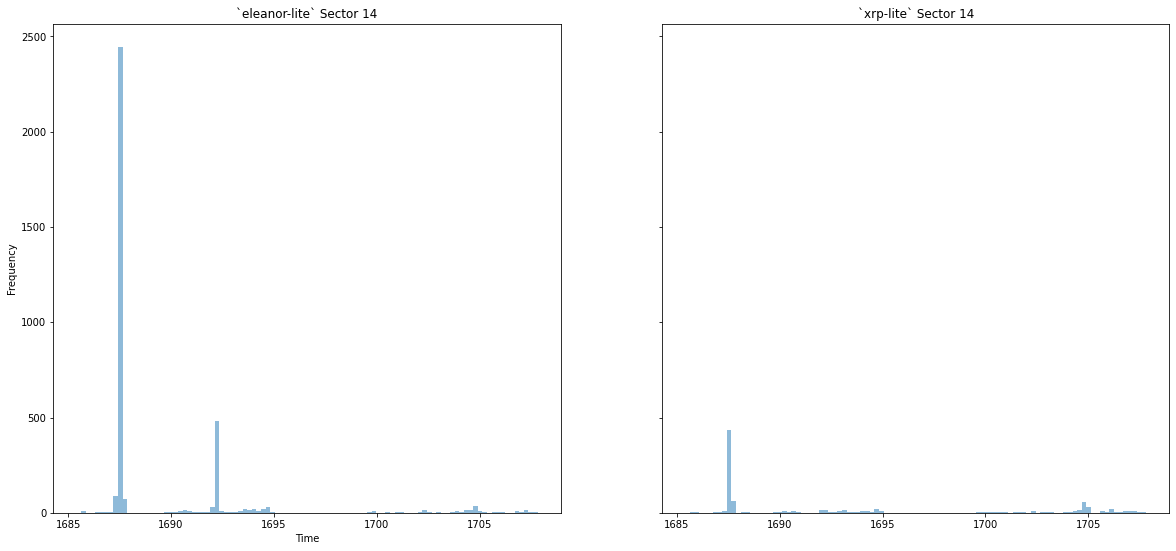

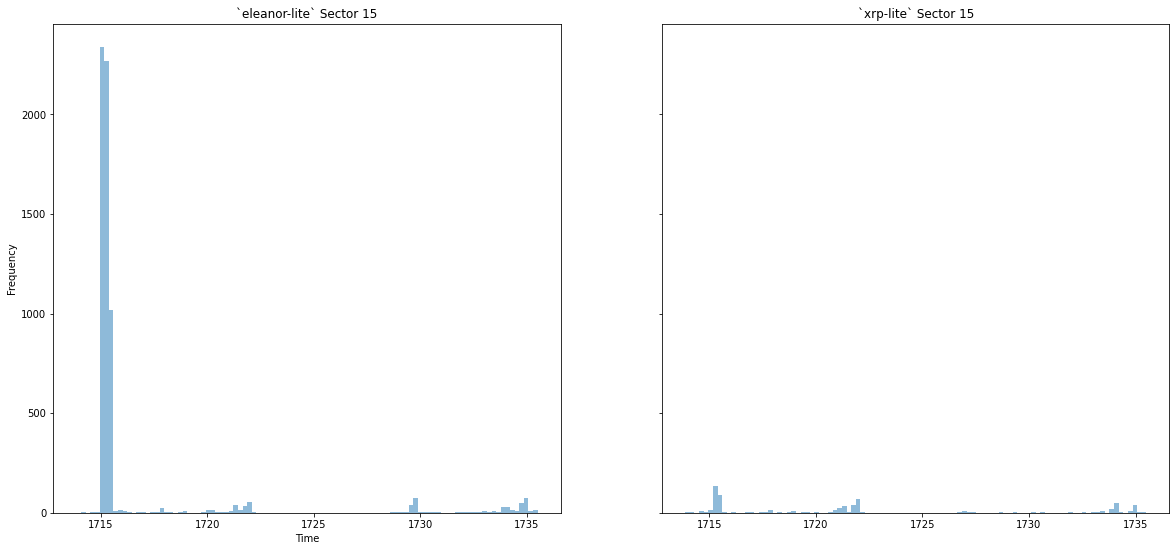

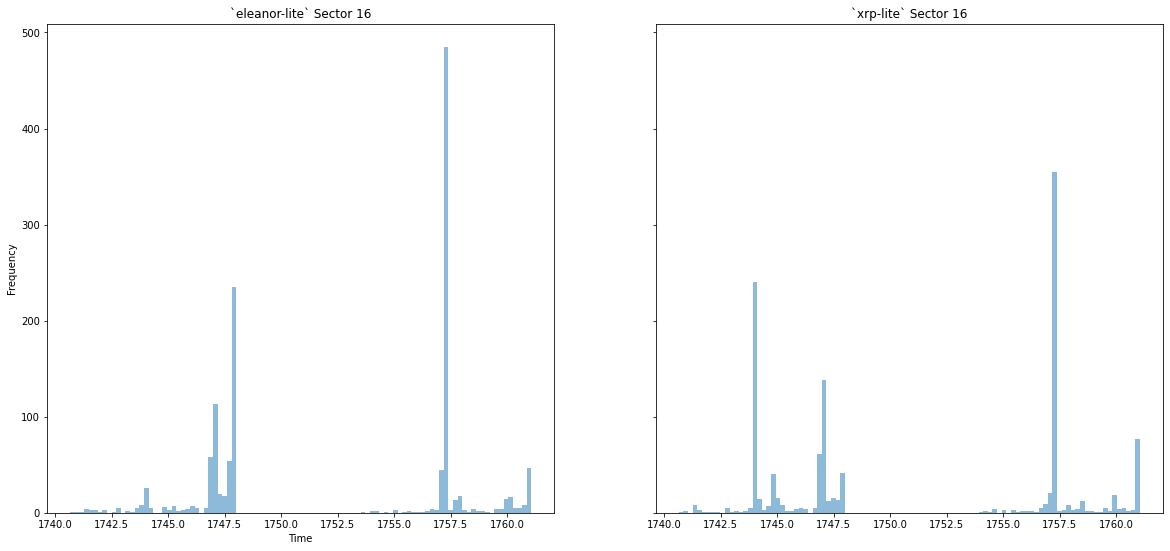

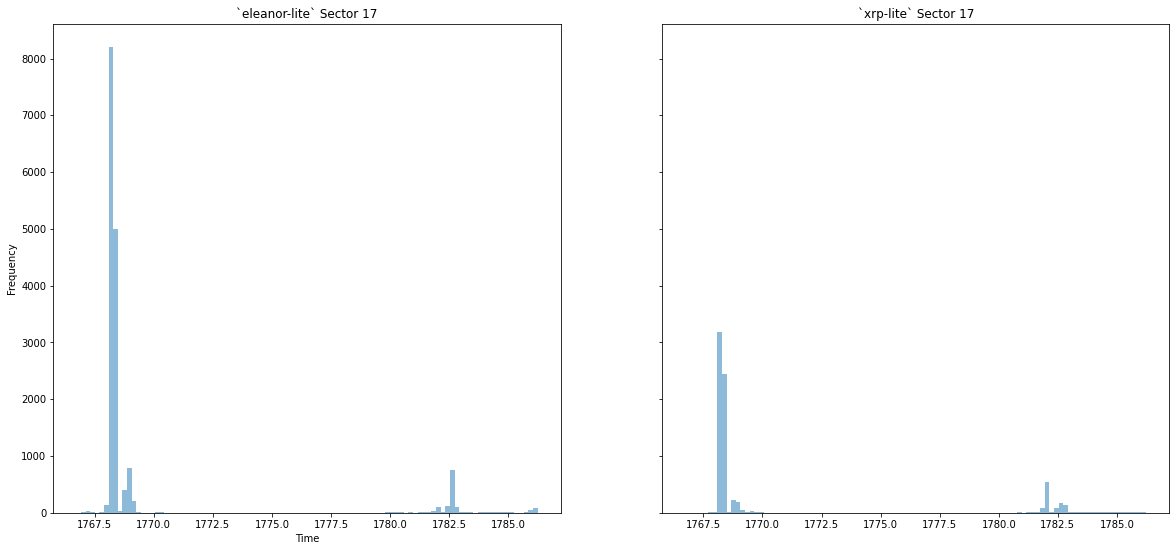

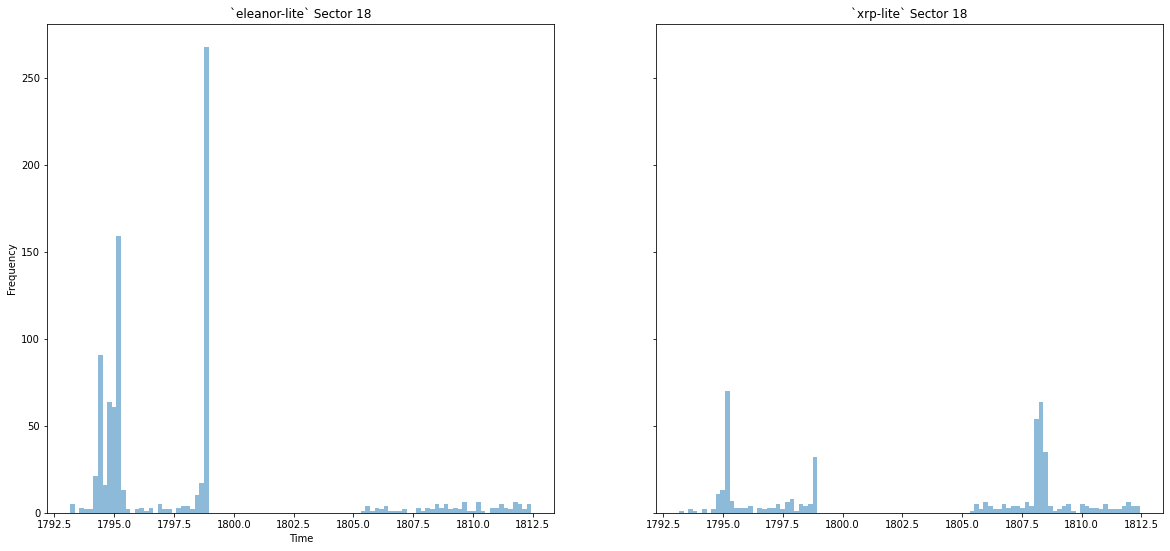

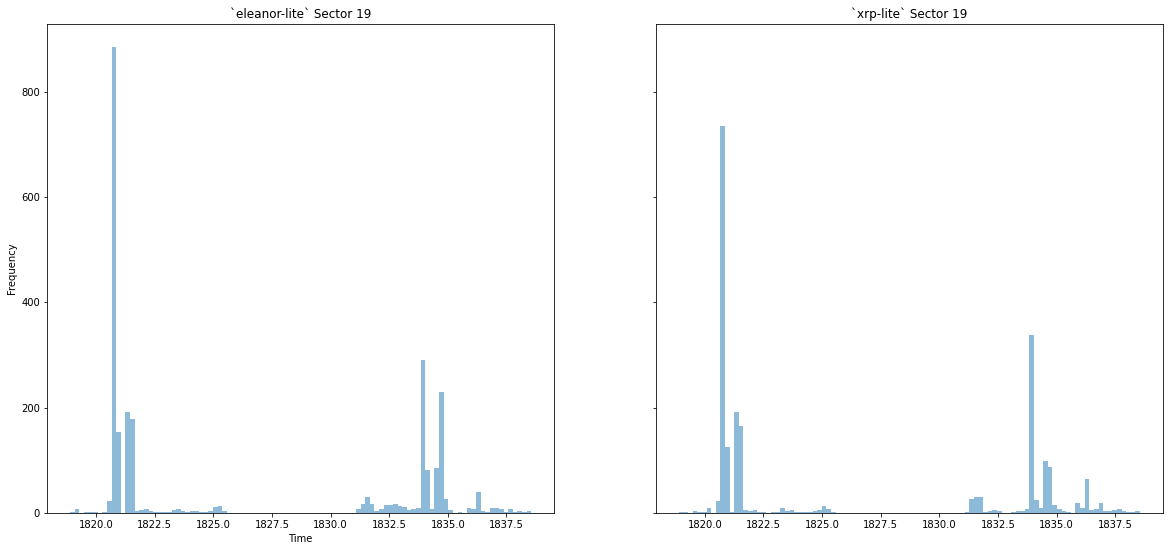

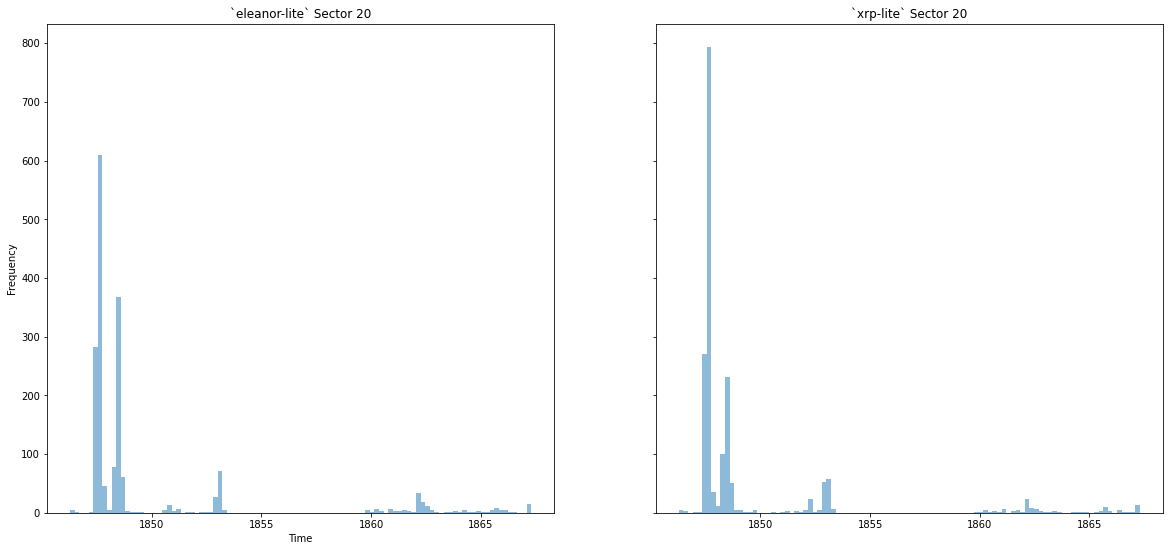

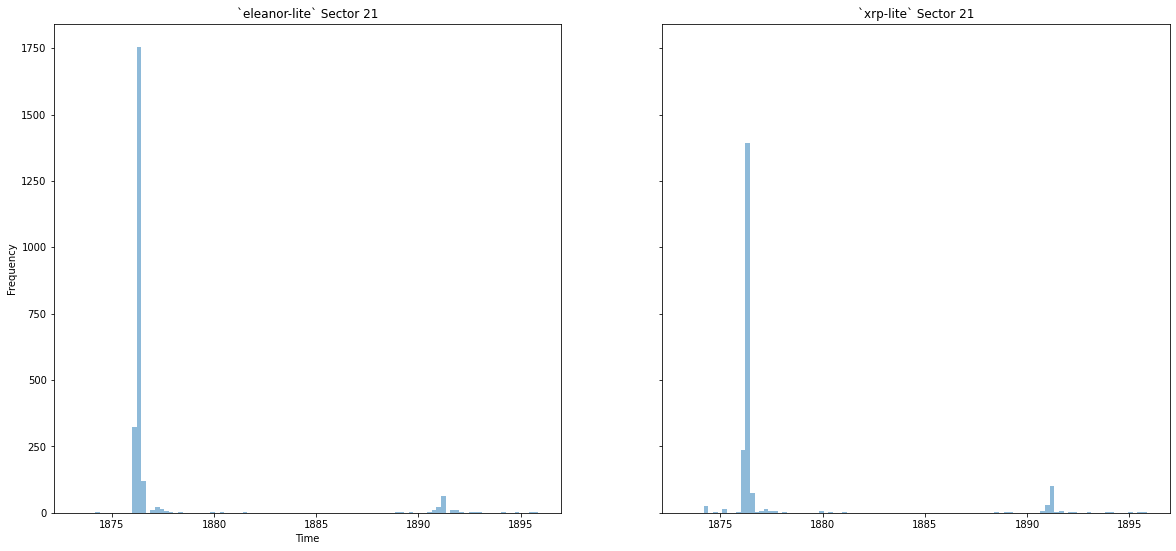

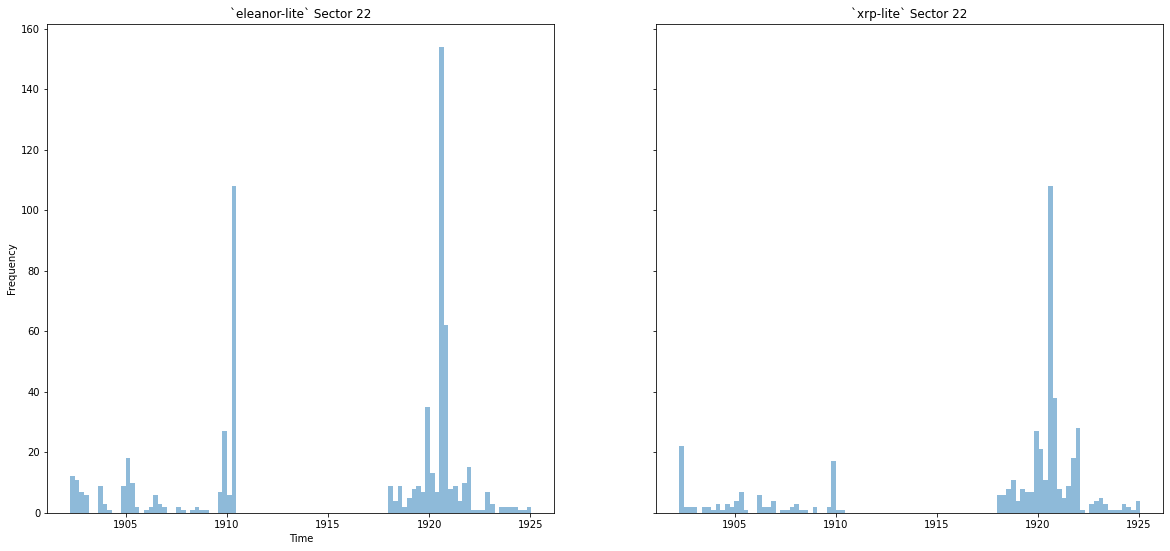

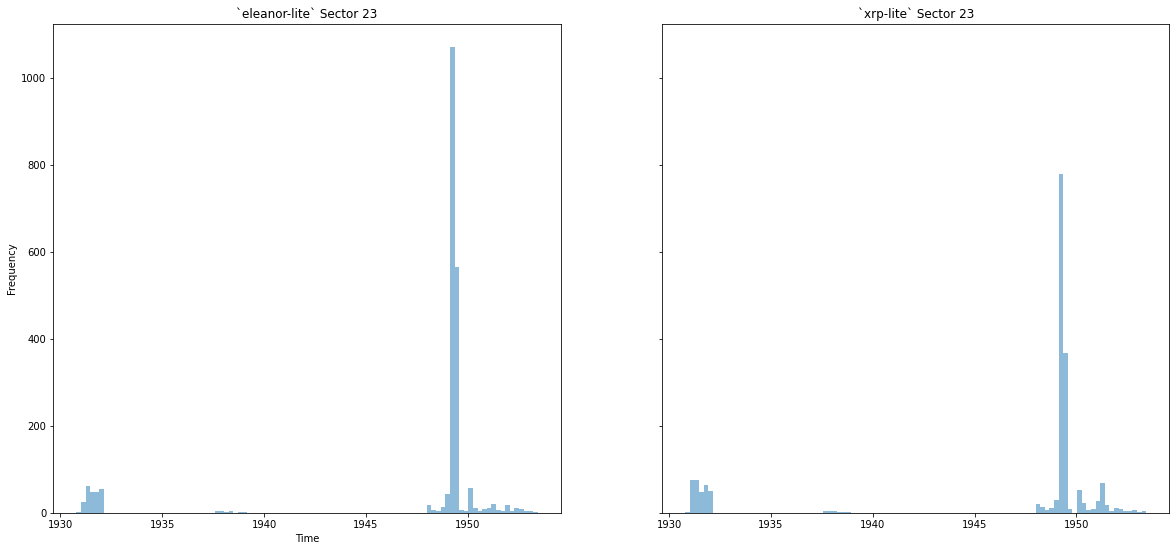

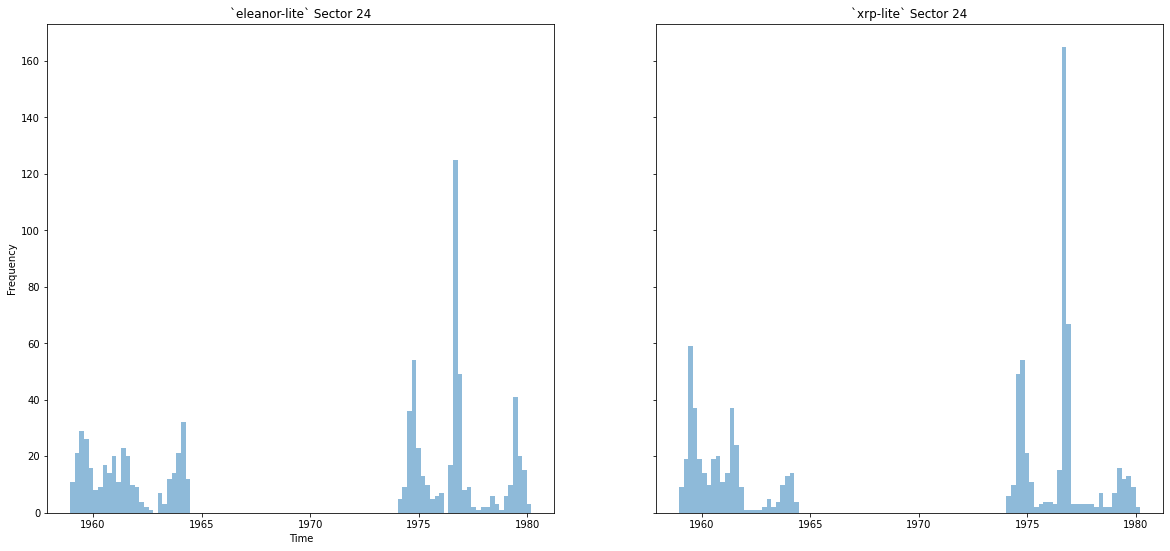

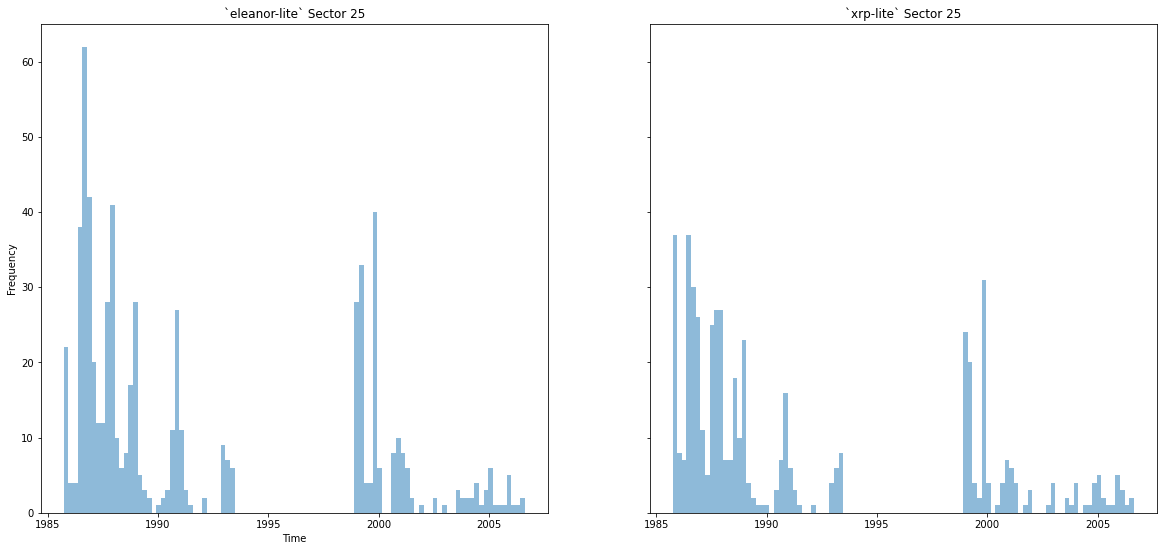

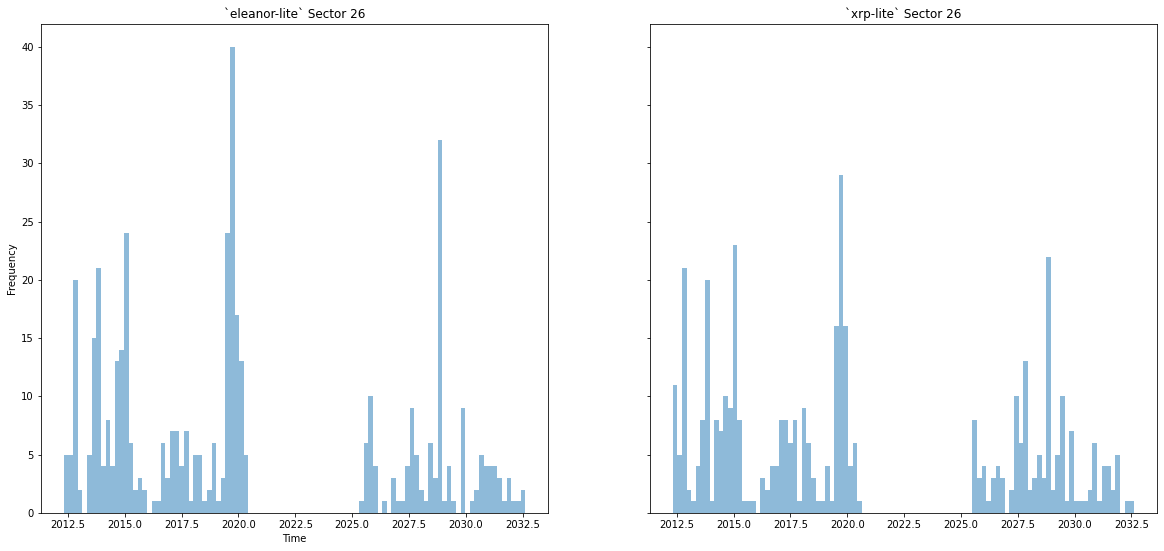

In [9]:
#data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    xrp_dataframe_name = 'xrpsector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
        data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
        data = data[data.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        data = data[abs(data.snr) >= 5].reset_index(drop=True)
        data.drop(data[data['duration'] <= 0.4].index, inplace=True)
        data['abs_depth'] = abs(data.depth)
        data.drop(data[(data['abs_depth'] >= 0.01)].index, inplace=True)

        
        data_xrp = globals()[xrp_dataframe_name]
        data_xrp = data_xrp[data_xrp.transit_prob == 'maybeTransit']
        data_xrp = data_xrp[(data_xrp.asym_score <= 3)].reset_index(drop=True)
        data_xrp = data_xrp[abs(data_xrp.snr) >= 5].reset_index(drop=True)
        data_xrp.drop(data_xrp[data_xrp['duration'] <= 0.4].index, inplace=True)   
        data_xrp['abs_depth'] = abs(data_xrp.depth)
        data_xrp.drop(data_xrp[(data_xrp['abs_depth'] >= 0.01)].index, inplace=True)

    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
        
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=100)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9),sharey=True)
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5)
    ax[1].hist(data_xrp['time'], bins=bin_edges, alpha=0.5)
    
    ax[0].set_title('`eleanor-lite` Sector {}'.format(sector))
    ax[1].set_title('`xrp-lite` Sector {}'.format(sector))

    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')


## MAD Method

In [10]:
tics_compare = {}

[ 27.   3.   6.  11.   9.   9.   4.   2.  14.  nan  nan  nan   2.  nan
   2.   3.   7.  11.  31.  20.   9.   3.   4.   9.   5.  30.  69.  68.
  47.  94.  41.  37.  43. 149. 199.  13.   5.   1.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan   4.  14.  87.  43.  35.  19.  13.  49.
   8.  nan  nan   7.   8.   4.   7.   3.   5.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  26.]
7.0
70.0
[ 94. 149. 199.  87.]


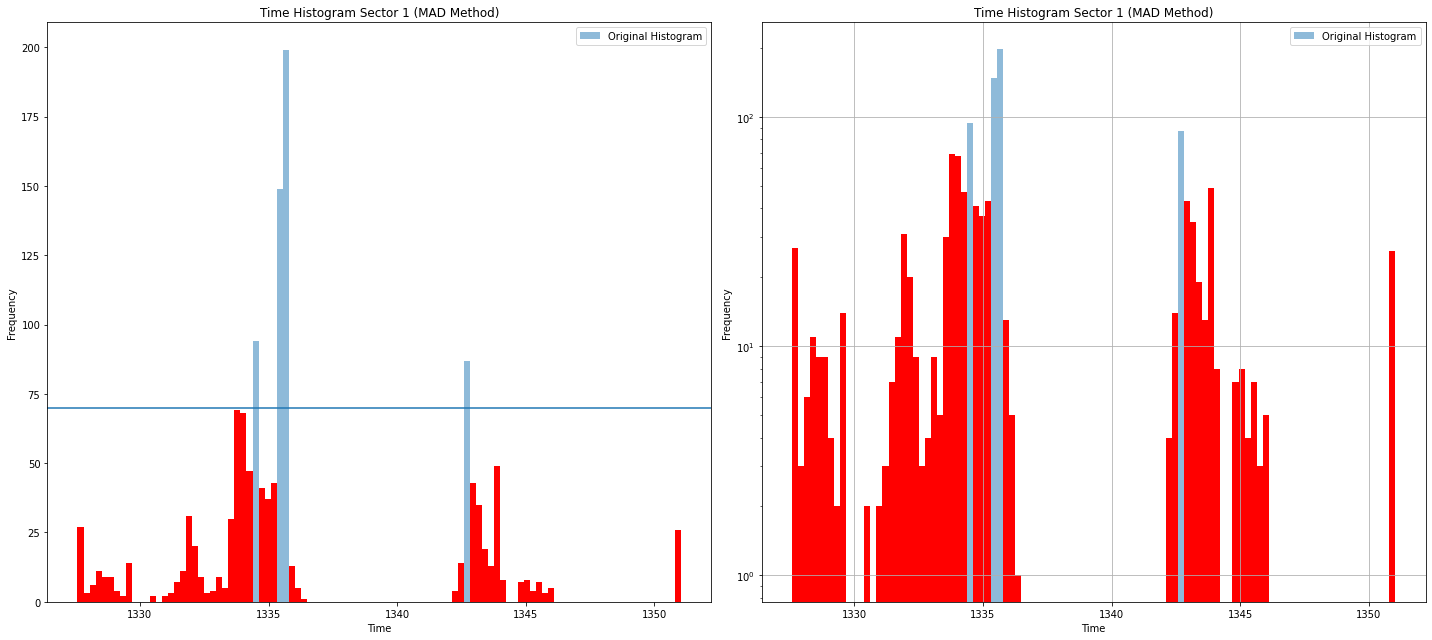

total candidates of Sector 1: 1319
total bad lcs: 529.0
Bins of bad lightcurves:
    Bin Range: 1334.3779829999999 - 1334.6126199999999
    Bin Range: 1335.316531 - 1335.551168
    Bin Range: 1335.551168 - 1335.785805
    Bin Range: 1342.590278 - 1342.824915
[  3.   2.  nan   1.   4.  nan  nan  nan   1.  nan   1.   8.   7.   3.
  nan   1.  nan   2.   2.   3.   1.   5.   9.   2.   9.   5.   6.   3.
   3.   3.  12.  11.  29.  51. 118. 256.   9.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   2.   7.   2.
  13.   5.   1.   2.  nan  nan   5.   1.   1.  nan  nan   1.   5.   1.
  nan  nan   1.   1.   2.   1.   1.  nan   3.   5.  11.   1.   1.   3.
  nan   4.]
2.0
20.0
[ 29.  51. 118. 256.]


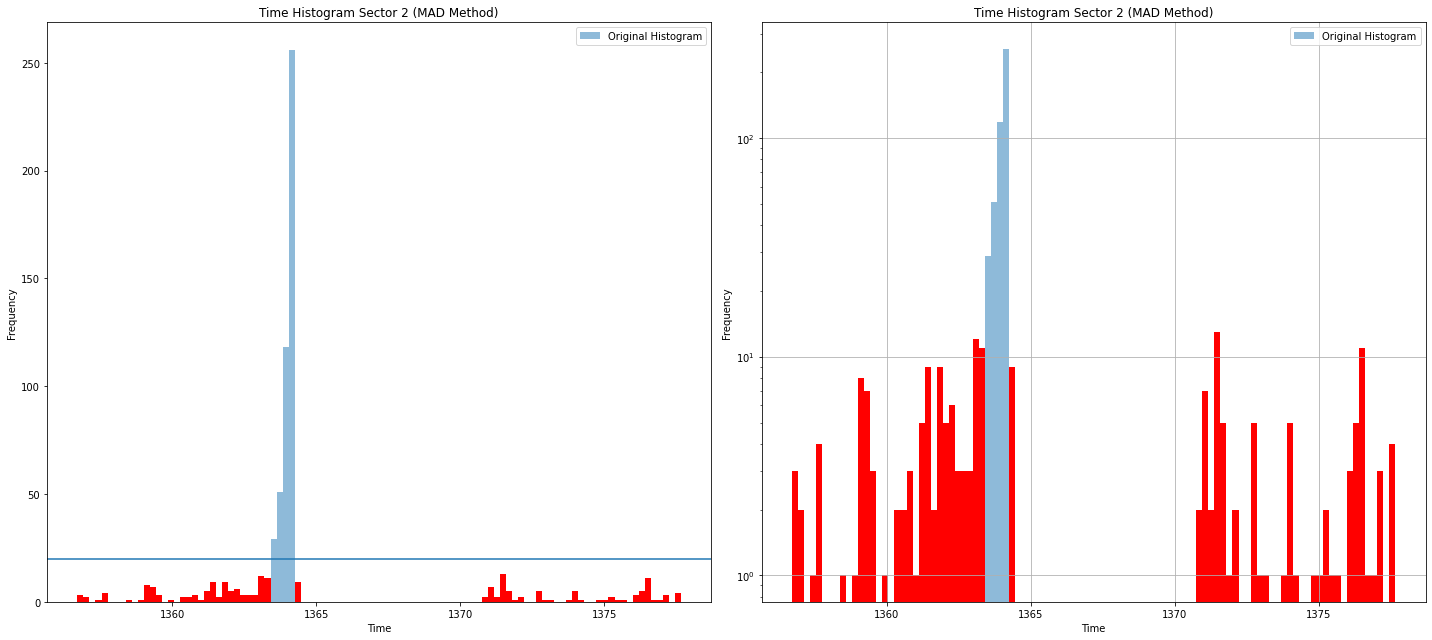

total candidates of Sector 2: 650
total bad lcs: 454.0
Bins of bad lightcurves:
    Bin Range: 1363.4090236 - 1363.6185784
    Bin Range: 1363.6185784 - 1363.8281332
    Bin Range: 1363.8281332 - 1364.037688
    Bin Range: 1364.037688 - 1364.2472427999999
[ 1.  3.  2.  1. nan  4.  2.  1. nan nan nan nan  1.  1.  4. nan  5.  2.
 nan  8. 11.  4. nan  1.  1. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan  2. nan  1. nan  1.  1. nan  1.
  2. nan  2.  1.  1. nan  1. nan nan  2. nan nan nan  2.  3.  2. nan nan
  1. nan nan  1. nan nan nan  2.  2. 47.]
1.0
10.0
[47.]


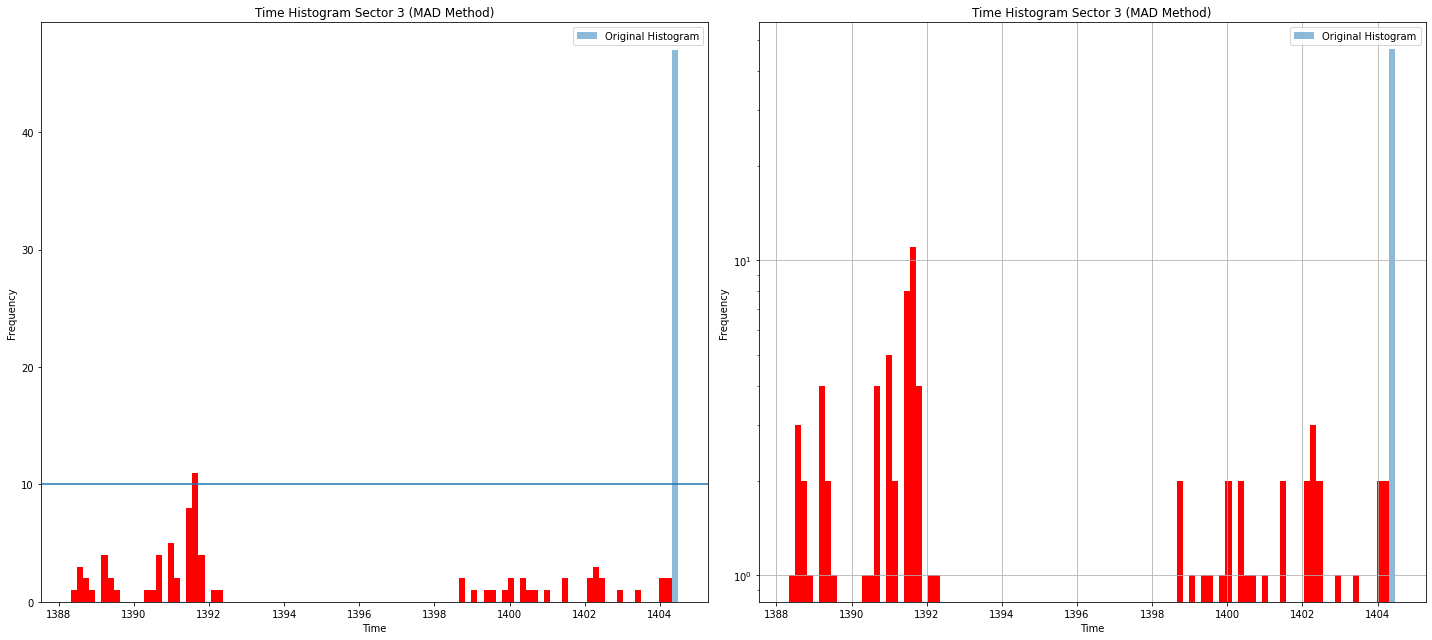

total candidates of Sector 3: 127
total bad lcs: 47.0
Bins of bad lightcurves:
    Bin Range: 1404.3113111 - 1404.47275
[479. 123.  63.  63.  38.  74. 169. 211.  45.   1.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan   7.  16.   8.   2.   2.   3.  19.  24.  12.
  15.  14.   8.   4.   1.   8.   2.   3.   3. 116.  20.   4.   8.   7.
   2.   6.   4.   8.   4.   2.   6.   9.   5.   8.  45. 153.   7.   3.
   5.   3.]
6.0
60.0
[479. 123.  74. 169. 211. 116. 153.]


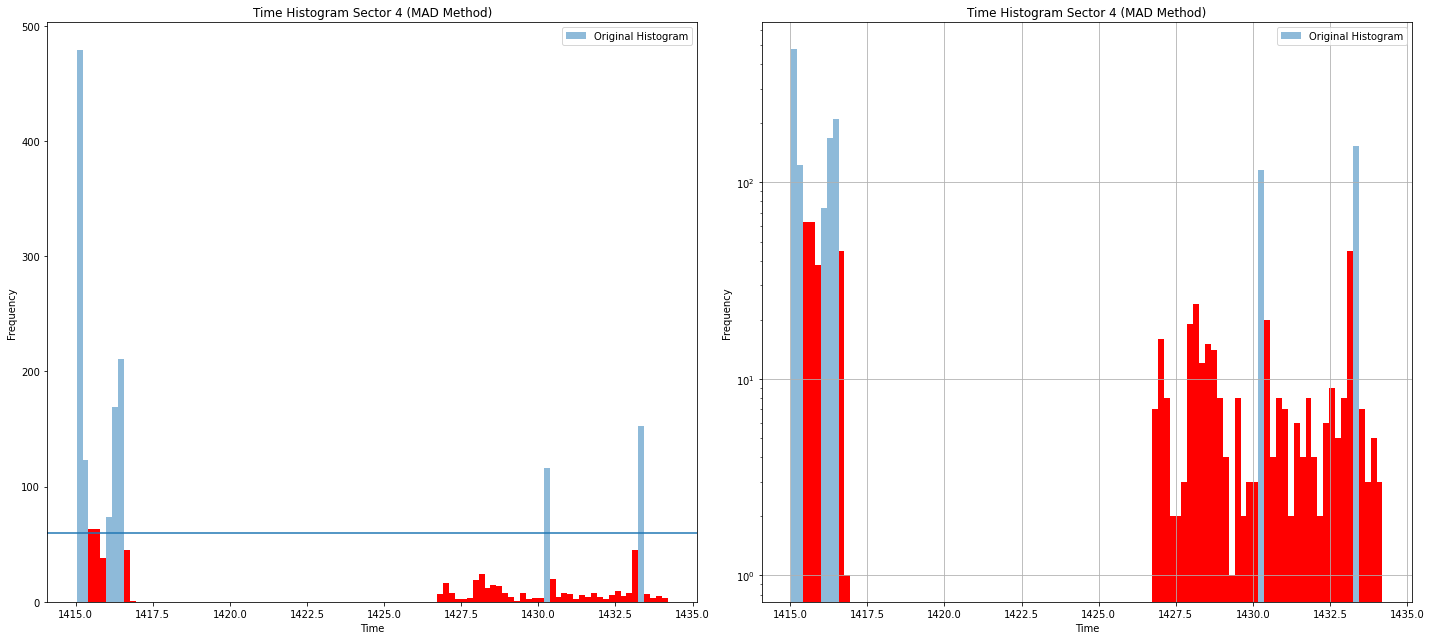

total candidates of Sector 4: 1842
total bad lcs: 1325.0
Bins of bad lightcurves:
    Bin Range: 1415.03222 - 1415.2238830000001
    Bin Range: 1415.2238830000001 - 1415.4155460000002
    Bin Range: 1415.9905350000001 - 1416.1821980000002
    Bin Range: 1416.182198 - 1416.373861
    Bin Range: 1416.373861 - 1416.565524
    Bin Range: 1430.173597 - 1430.36526
    Bin Range: 1433.2402049999998 - 1433.431868
[ 2. nan nan 22. 59. 26.  1.  3.  3.  2.  3. nan  4.  3.  2. nan nan nan
  1.  2.  4. 10.  5. 17.  1.  3.  2.  4.  2.  4.  1. 15. 49. 14. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  8. 33. 11.  6.  3.  4. nan  3.  2.
  4.  2.  4.  8.  1.  1.  3. nan  5.  5.  6.  4.  3.  4.  4.  8. 17. 55.
  4.  2.  4.  8.  3.  6.  3.  2.  1.  2.]
2.0
20.0
[59. 26. 49. 33. 55.]


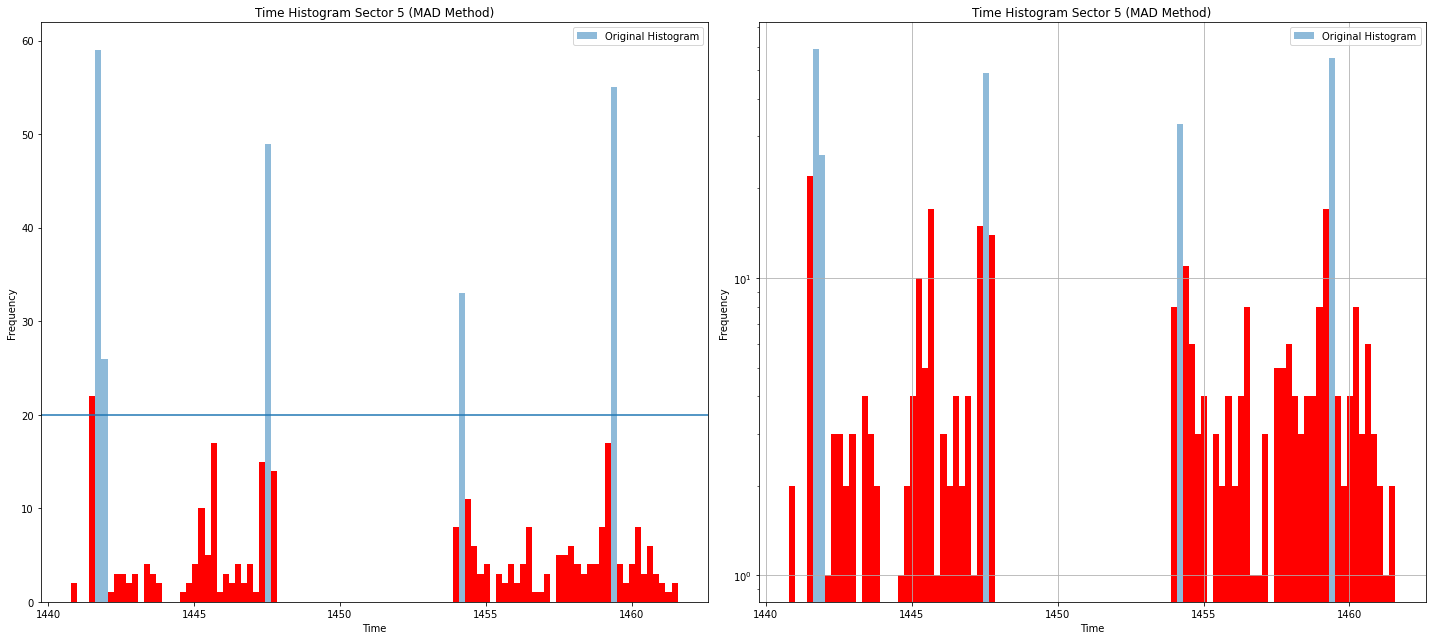

total candidates of Sector 5: 503
total bad lcs: 222.0
Bins of bad lightcurves:
    Bin Range: 1441.6186599999999 - 1441.8265199999998
    Bin Range: 1441.8265199999998 - 1442.0343799999998
    Bin Range: 1447.43874 - 1447.6466
    Bin Range: 1454.09026 - 1454.29812
    Bin Range: 1459.28676 - 1459.49462
[  3.  nan   2.  17.  nan  nan  nan  nan  nan   1.  nan  nan   3.   2.
   1.   3.   2.   5.   1.   1.   2. 100.  nan   3.   3.   9.  42.   1.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan   7.   3.  nan  nan   6.   7.   2.   7.  18.   9.   5.   1.   2.
   6.   4.   2.   6.   1.   6.   5.   6.   5.   8.   3.   4.   1.   2.
   8.   5.   2.   2.   7.   3.   2.   6.   4.  13.  13.   6.  10.   2.
  nan  11.]
2.0
20.0
[100.  42.]


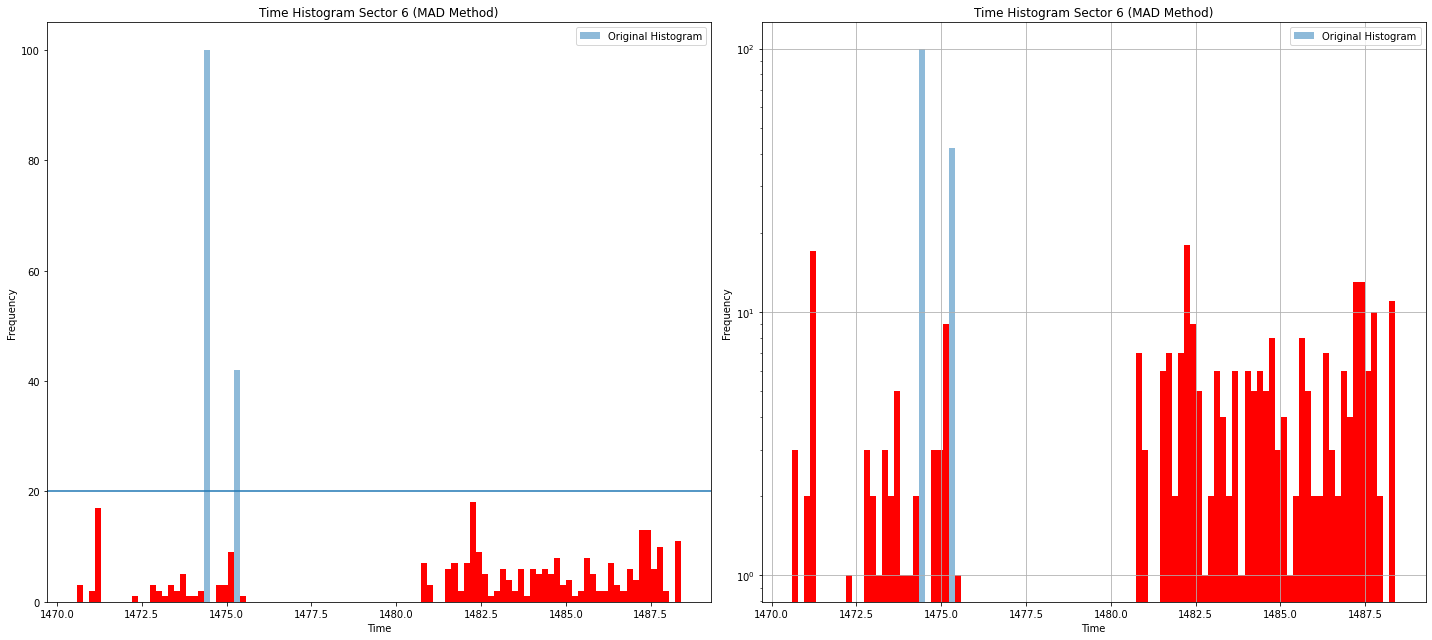

total candidates of Sector 6: 421
total bad lcs: 142.0
Bins of bad lightcurves:
    Bin Range: 1474.3351394000001 - 1474.5130608000002
    Bin Range: 1475.2247464 - 1475.4026678
[  7.  nan   2.   1.   6.   2.  12.   4.  nan   5.   2.   6.   3.   4.
  nan   3.   2.   6.   4.   5.   2.   3.   5.   2.   4.   3.   3.   2.
   1.   4.   2.   4.   4.   3.   6.   2.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  36. 301.   7.   6.   5.  10.
  24.   2.   6.  nan   2.   3.   8.   9.   6.   4.   8.   5.   7.  11.
  11.   4.   6.   7.   3.   4.   4.   2.  10.  11.   4.   4.   8.   6.
  21.  33.]
2.0
20.0
[ 36. 301.  33.]


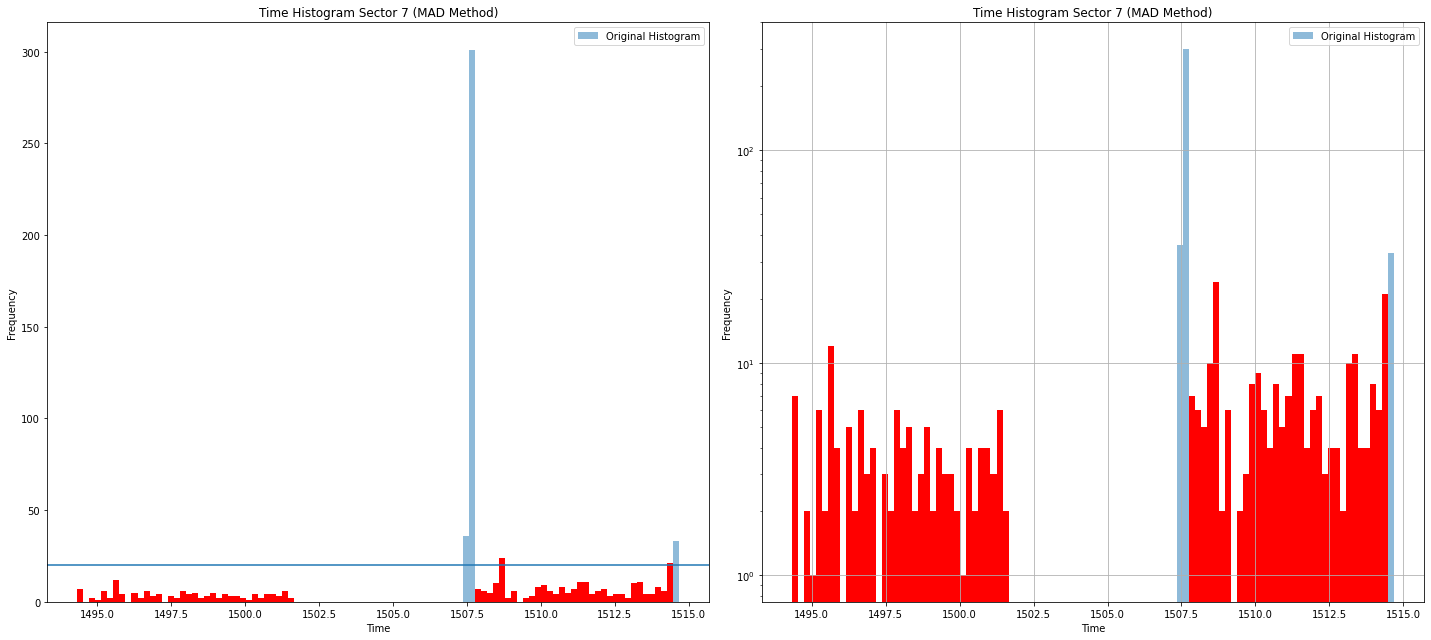

total candidates of Sector 7: 722
total bad lcs: 370.0
Bins of bad lightcurves:
    Bin Range: 1507.353568 - 1507.5571275
    Bin Range: 1507.5571275 - 1507.760687
    Bin Range: 1514.4781505 - 1514.68171
Dataframe 'sector_8' not found. Moving to the next sector.
[  4.   9.   5.   4.   5.  18.   6.   1.   1.  nan   3.   2.   5.   5.
   5.  13.  25.   9.   2.   3.   4.   8.   6.   2.   1.   4.   4.   5.
   5.  68.   9.  10.   6.   2.   4.   5.   4.  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   2.
   6.   3.   3.   7.   2.   4.   1.   4.   6.  29.  32.   7.  23. 103.
 125.  14.   6.   4.  nan   3.  nan   7.   4.   5.   6.   4.   3.  59.
 213.   5.]
2.0
20.0
[ 68.  29.  32. 103. 125.  59. 213.]


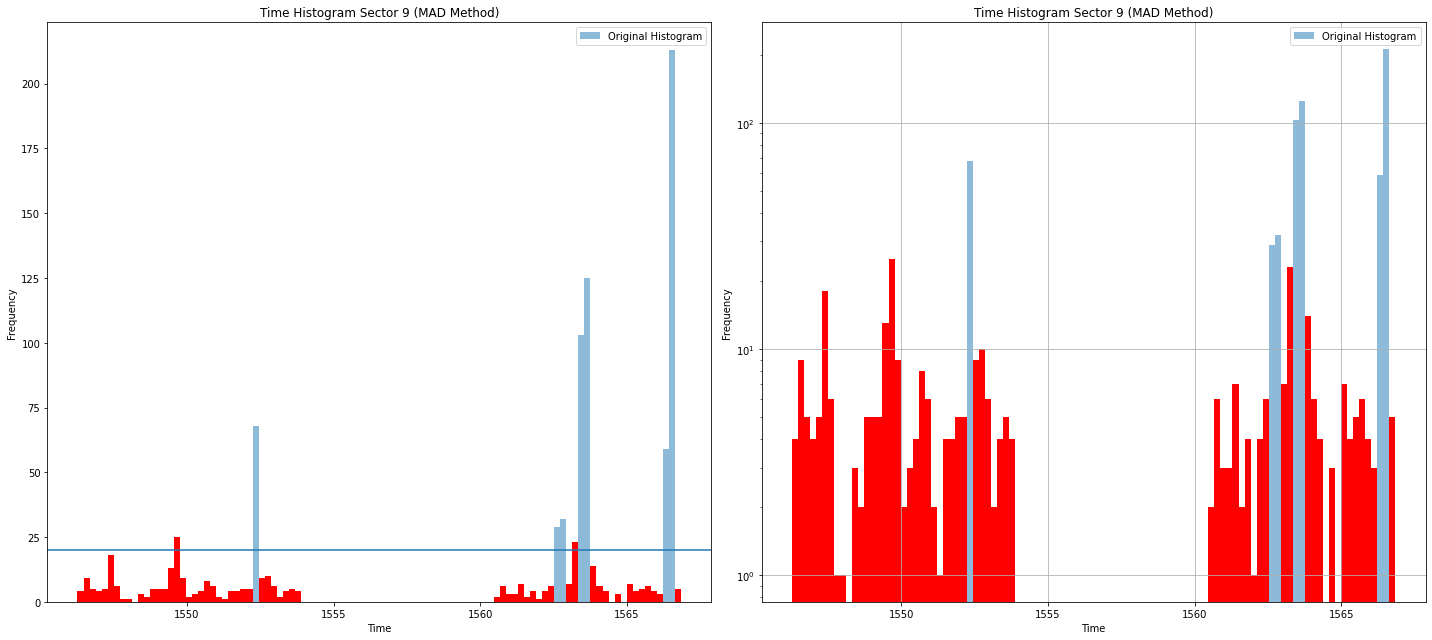

total candidates of Sector 9: 962
total bad lcs: 629.0
Bins of bad lightcurves:
    Bin Range: 1552.232962 - 1552.4387900000002
    Bin Range: 1562.5243619999999 - 1562.73019
    Bin Range: 1562.73019 - 1562.936018
    Bin Range: 1563.3476739999999 - 1563.553502
    Bin Range: 1563.553502 - 1563.75933
    Bin Range: 1566.2292659999998 - 1566.435094
    Bin Range: 1566.435094 - 1566.640922
[3.800e+01 1.900e+01 2.400e+01 4.000e+00 4.000e+00 1.000e+00 2.000e+00
 9.000e+00 3.900e+01 1.600e+01 6.000e+00 5.000e+00 5.000e+00 2.000e+00
 6.000e+00 1.000e+02 2.100e+01 7.000e+00 6.000e+00 2.000e+00 7.000e+00
 3.000e+00 3.000e+00 1.600e+01 8.000e+00 2.600e+02 2.630e+02 1.600e+01
 3.000e+00 1.330e+02 2.351e+03 1.740e+02 5.000e+00 2.100e+01 3.000e+00
 9.000e+00       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan

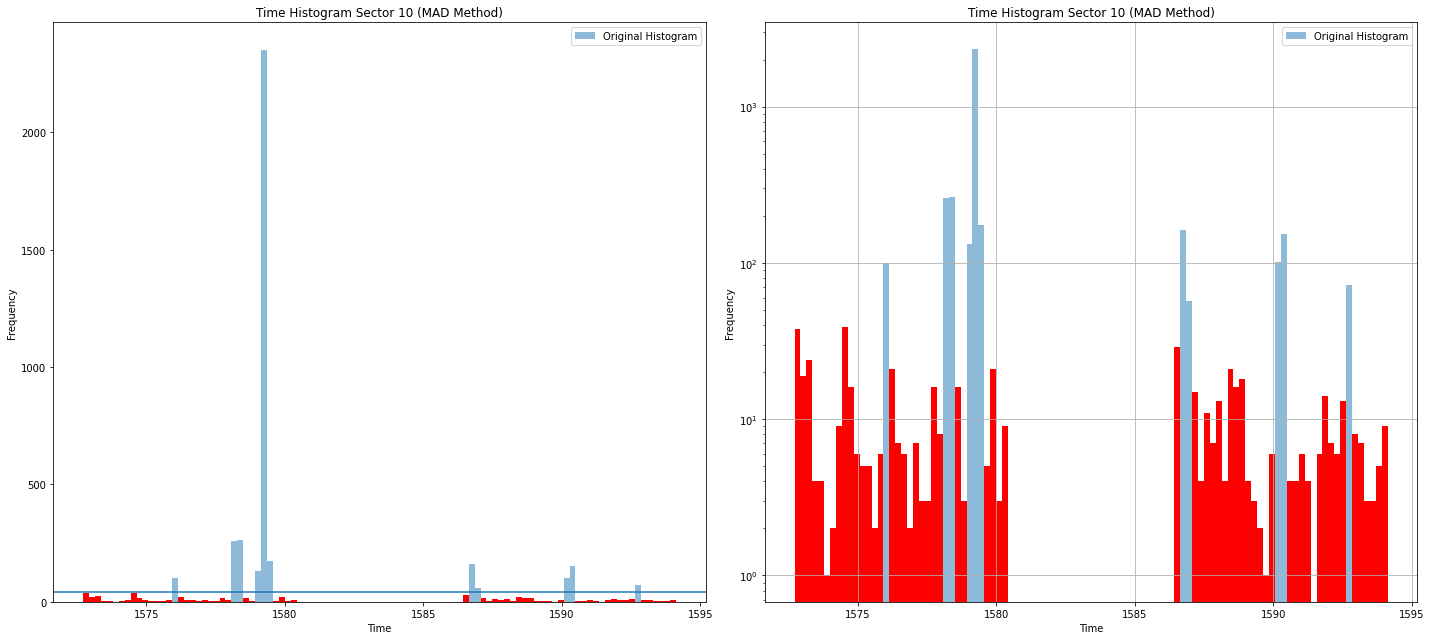

total candidates of Sector 10: 4390
total bad lcs: 3827.0
Bins of bad lightcurves:
    Bin Range: 1575.9341805000001 - 1576.1483592000002
    Bin Range: 1578.0759675000002 - 1578.2901462000002
    Bin Range: 1578.2901462000002 - 1578.5043249000003
    Bin Range: 1578.9326823000001 - 1579.1468610000002
    Bin Range: 1579.1468610000002 - 1579.3610397000002
    Bin Range: 1579.3610397 - 1579.5752184
    Bin Range: 1586.6431155 - 1586.8572942
    Bin Range: 1586.8572942 - 1587.0714729000001
    Bin Range: 1590.0699747 - 1590.2841534000002
    Bin Range: 1590.2841534000002 - 1590.4983321000002
    Bin Range: 1592.6401191 - 1592.8542978
[2.000e+01 2.000e+01 3.000e+00 8.000e+00 3.000e+00 3.600e+01 1.200e+01
 8.100e+01 3.800e+01 5.000e+00 1.200e+01 9.000e+00 7.000e+00 1.000e+01
 7.000e+00 5.000e+00 1.200e+01 1.200e+01 8.000e+00 1.000e+01 1.700e+01
 5.000e+00 1.000e+01 1.000e+00 1.600e+01 6.000e+00 1.200e+01 2.000e+00
 8.000e+00 2.000e+00       nan       nan       nan       nan       nan
     

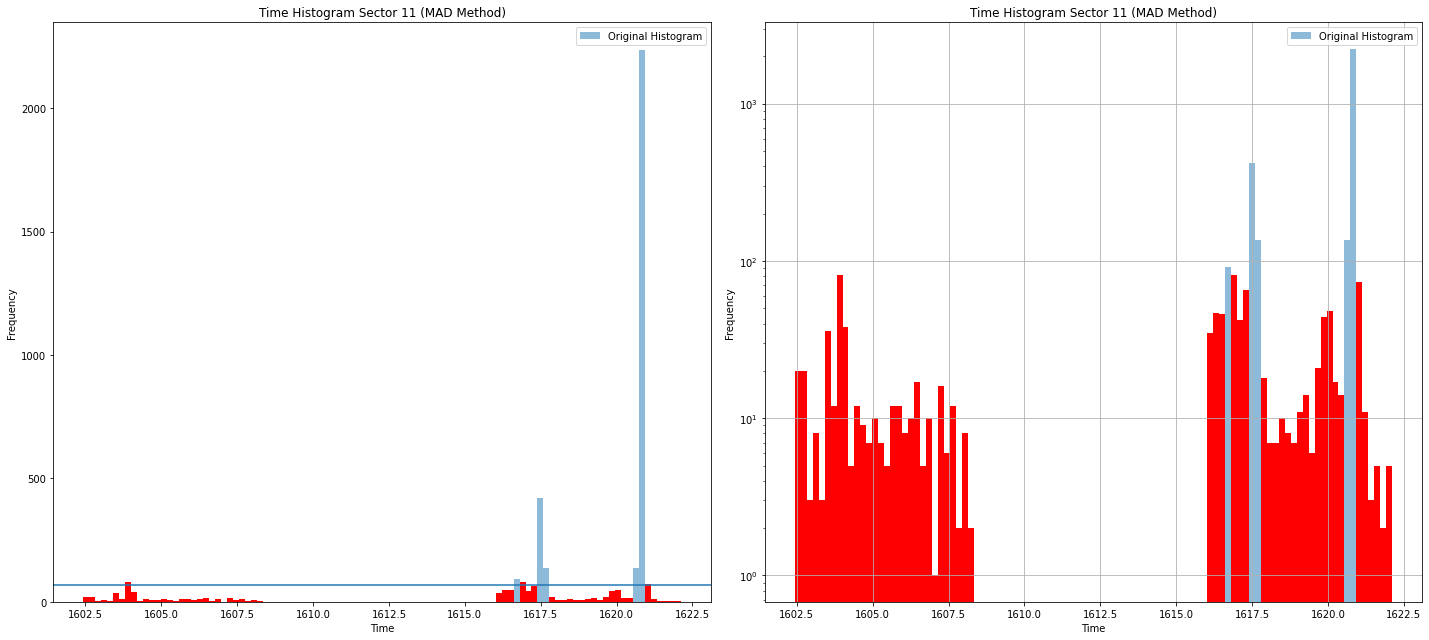

total candidates of Sector 11: 4062
total bad lcs: 3017.0
Bins of bad lightcurves:
    Bin Range: 1616.6055844 - 1616.8024521
    Bin Range: 1617.3930552 - 1617.5899229
    Bin Range: 1617.5899229 - 1617.7867906
    Bin Range: 1620.5429384 - 1620.7398061
    Bin Range: 1620.7398061 - 1620.9366737999999
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.
[1.000e+00 8.000e+00 1.000e+00       nan 2.000e+00 4.000e+00 3.000e+00
 4.000e+00 8.800e+01 2.445e+03 7.300e+01       nan 1.000e+00 1.000e+00
 1.000e+00       nan       nan       nan       nan 5.000e+00 3.000e+00
 2.000e+00 8.000e+00 1.600e+01 8.000e+00 2.000e+00 2.000e+00 5.000e+00
 4.000e+00 3.300e+01 4.800e+02 9.000e+00 4.000e+00 4.000e+00 2.000e+00
 1.200e+01 2.200e+01 1.700e+01 2.200e+01 1.000e+01 2.000e+01 2.900e+01
 4.000e+00       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       n

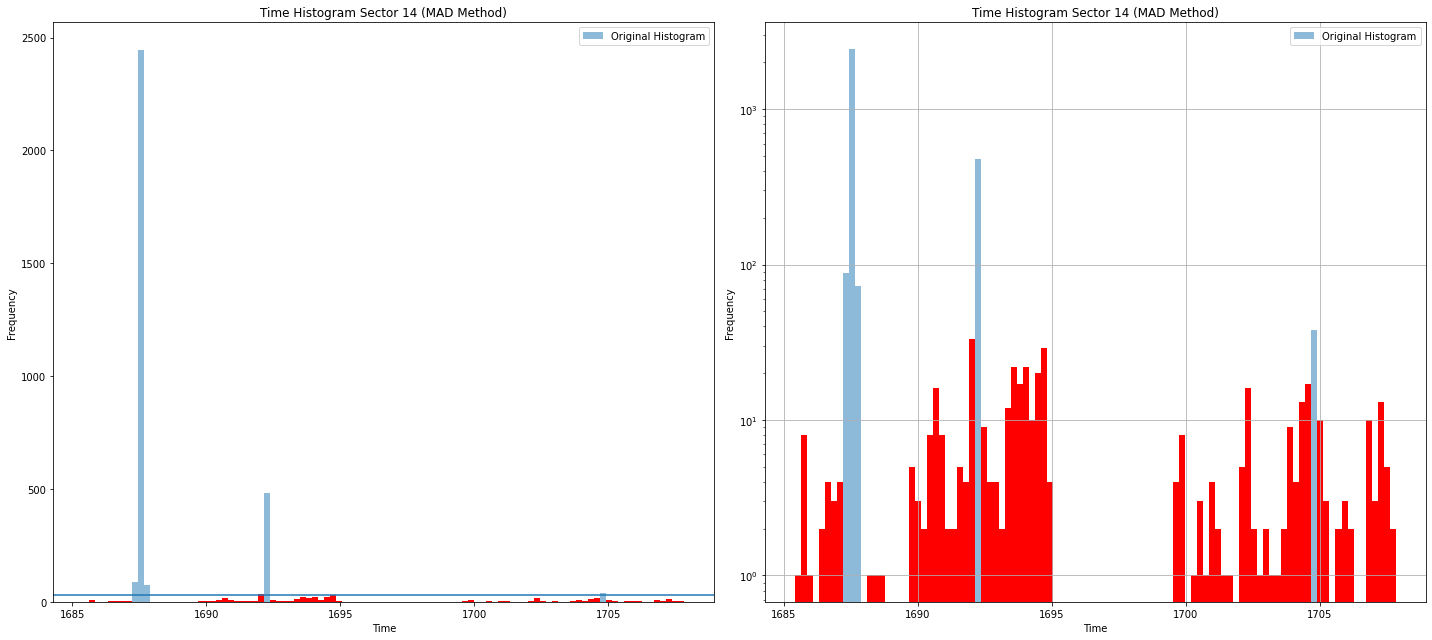

total candidates of Sector 14: 3544
total bad lcs: 3124.0
Bins of bad lightcurves:
    Bin Range: 1687.2034256000002 - 1687.4275713000002
    Bin Range: 1687.4275713000002 - 1687.6517170000002
    Bin Range: 1687.6517170000002 - 1687.8758627000002
    Bin Range: 1692.1346310000001 - 1692.3587767000001
    Bin Range: 1704.6867902000001 - 1704.9109359000001
[1.000e+00 4.000e+00       nan 4.000e+00 4.000e+00 2.339e+03 2.270e+03
 1.017e+03 7.000e+00 1.400e+01 7.000e+00 3.000e+00 1.000e+00 3.000e+00
 5.000e+00       nan 2.000e+00 6.000e+00 2.200e+01 2.000e+00 5.000e+00
 1.000e+00 6.000e+00 9.000e+00 1.000e+00 1.000e+00       nan 4.000e+00
 1.400e+01 1.500e+01 3.000e+00 2.000e+00 2.000e+00 9.000e+00 3.700e+01
 1.500e+01 3.200e+01 5.300e+01 4.000e+00       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan 1.000e+00 1.000e+00       nan
 1.

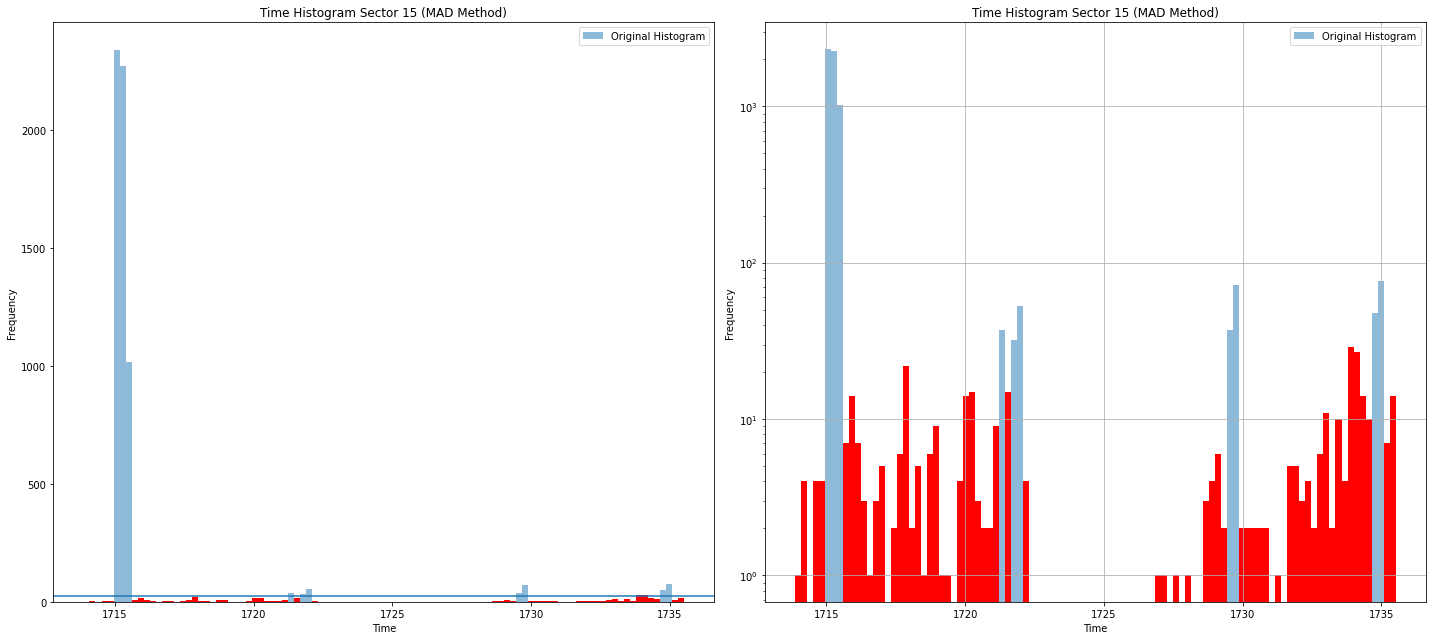

total candidates of Sector 15: 6340
total bad lcs: 5981.0
Bins of bad lightcurves:
    Bin Range: 1714.9502794999999 - 1715.1666973999997
    Bin Range: 1715.1666974 - 1715.3831152999999
    Bin Range: 1715.3831152999999 - 1715.5995331999998
    Bin Range: 1721.2263986 - 1721.4428165
    Bin Range: 1721.6592344 - 1721.8756523
    Bin Range: 1721.8756523 - 1722.0920701999999
    Bin Range: 1729.4502788 - 1729.6666966999999
    Bin Range: 1729.6666967 - 1729.8831146
    Bin Range: 1734.6443084 - 1734.8607263
    Bin Range: 1734.8607263000001 - 1735.0771442
[  1.   1.   1.   4.   3.   3.   1.   3.  nan   1.   5.  nan   2.   1.
   5.   8.  26.   5.  nan  nan   6.   3.   7.   2.   3.   4.   7.   5.
  nan   5.  58. 113.  20.  18.  54. 235.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan   1.  nan   2.   2.  nan   1.  nan
   3.  nan   1.   2.   1.   1.   1.   2.   4.   3.  45. 485.   3.  13.
  17.   3.   

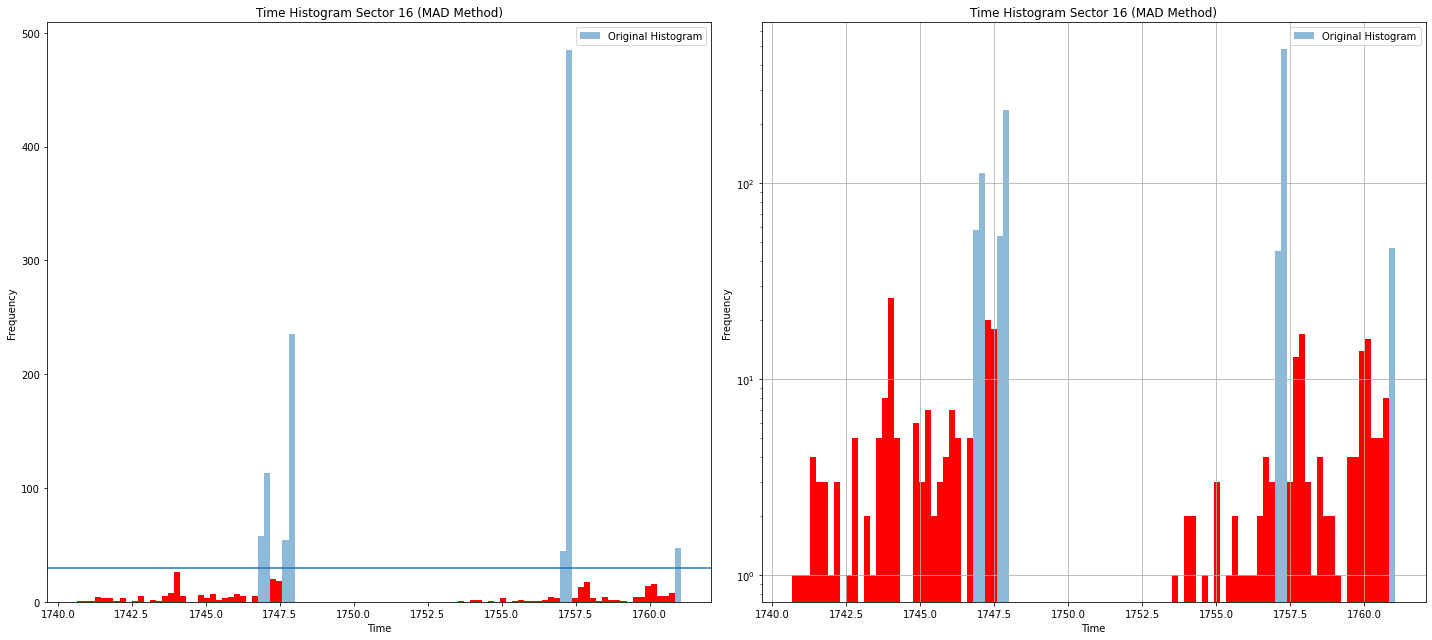

total candidates of Sector 16: 1313
total bad lcs: 1037.0
Bins of bad lightcurves:
    Bin Range: 1746.774833 - 1746.9788611
    Bin Range: 1746.9788611000001 - 1747.1828892
    Bin Range: 1747.5909454 - 1747.7949735
    Bin Range: 1747.7949735 - 1747.9990016
    Bin Range: 1756.976238 - 1757.1802661
    Bin Range: 1757.1802661000002 - 1757.3842942
    Bin Range: 1760.8527719 - 1761.0568
[5.000e+00 1.800e+01 3.300e+01 7.000e+00 2.000e+00 1.300e+01 1.360e+02
 8.206e+03 4.996e+03 2.300e+01 4.000e+02 7.820e+02 2.140e+02 6.000e+00
 2.000e+00 1.000e+00 3.000e+00 2.000e+01 1.400e+01       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan 

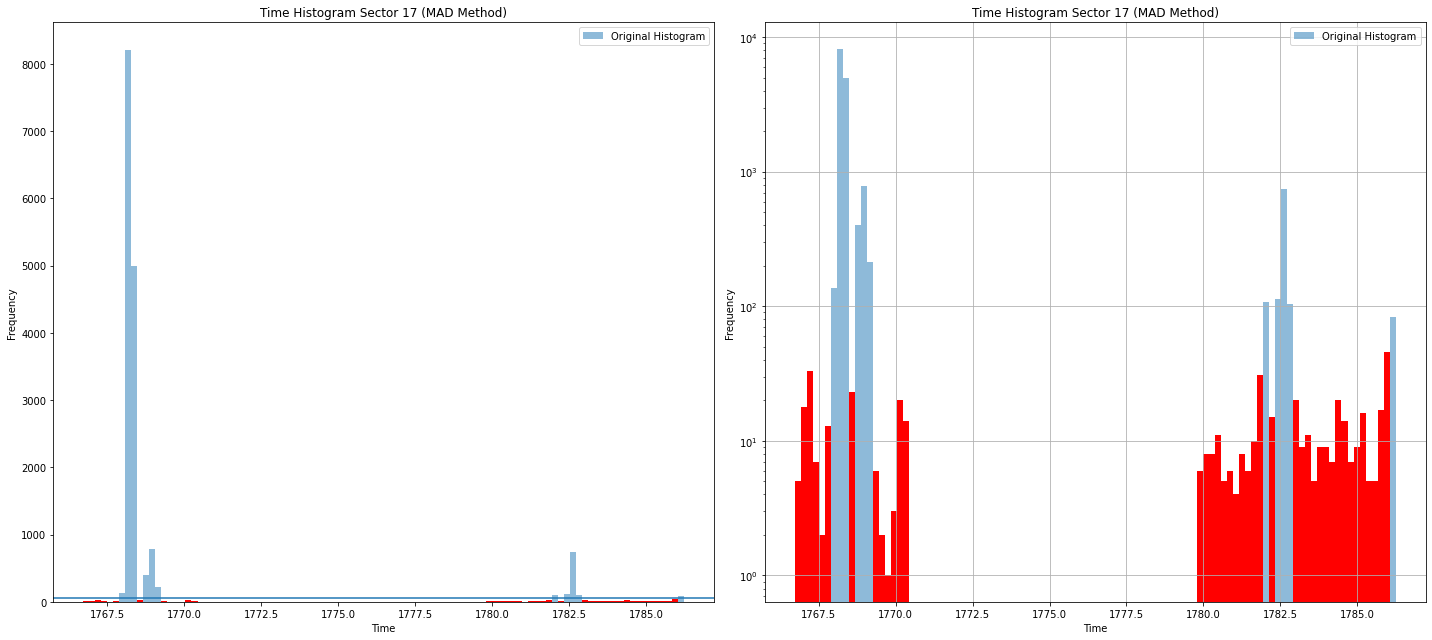

total candidates of Sector 17: 16364
total bad lcs: 15890.0
Bins of bad lightcurves:
    Bin Range: 1767.89588 - 1768.091065
    Bin Range: 1768.091065 - 1768.28625
    Bin Range: 1768.28625 - 1768.4814350000001
    Bin Range: 1768.67662 - 1768.871805
    Bin Range: 1768.871805 - 1769.06699
    Bin Range: 1769.06699 - 1769.262175
    Bin Range: 1781.9492 - 1782.144385
    Bin Range: 1782.3395699999999 - 1782.534755
    Bin Range: 1782.534755 - 1782.72994
    Bin Range: 1782.72994 - 1782.925125
    Bin Range: 1786.048085 - 1786.24327
[  5.  nan   3.   2.   2.  21.  91.  16.  64.  61. 159.  13.   2.  nan
   2.   3.   1.   3.  nan   5.   2.   2.  nan   3.   4.   4.   2.  10.
  17. 268.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan   1.   4.   1.   3.   2.   4.   1.
   1.   1.   2.  nan  nan   3.   1.   3.   2.   5.   3.   5.   2.   3.
   2.   6.   1.   1.   6.   1.  nan

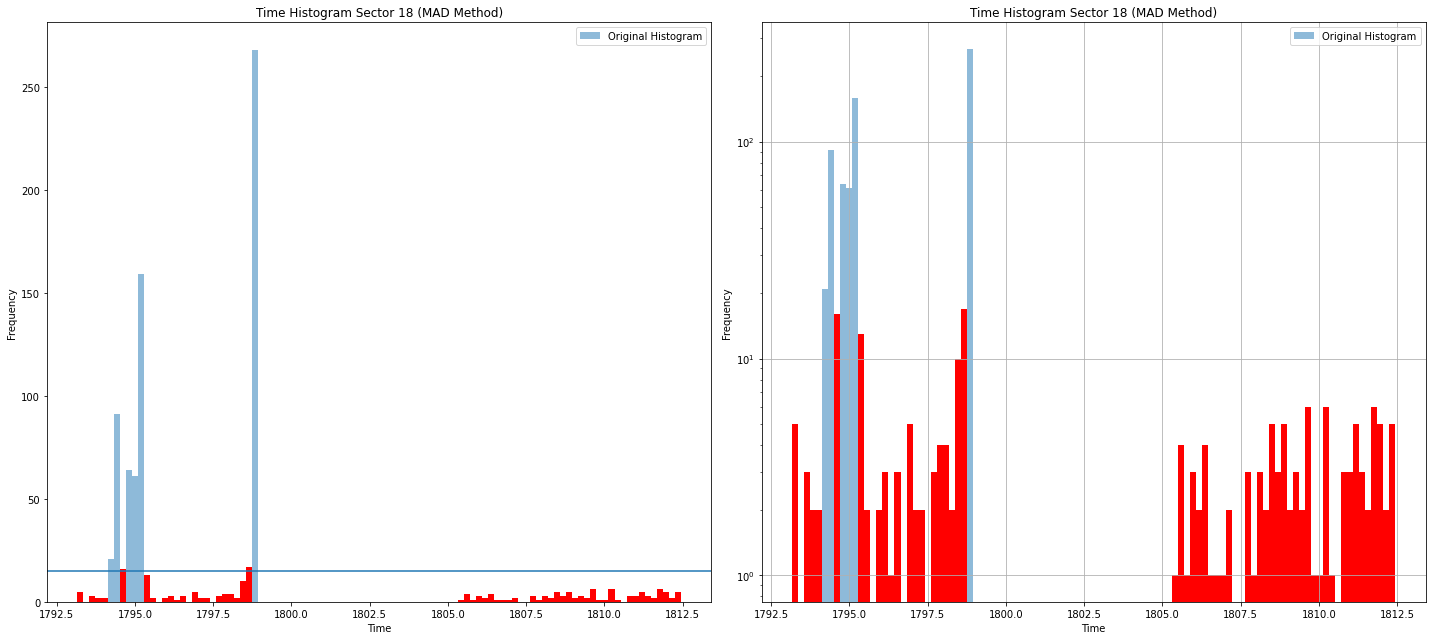

total candidates of Sector 18: 863
total bad lcs: 664.0
Bins of bad lightcurves:
    Bin Range: 1794.1243285 - 1794.3172102
    Bin Range: 1794.3172102 - 1794.5100919000001
    Bin Range: 1794.7029736 - 1794.8958553
    Bin Range: 1794.8958553 - 1795.088737
    Bin Range: 1795.088737 - 1795.2816187
    Bin Range: 1798.7534893 - 1798.946371
[  2.   7.  nan   2.   2.   1.  nan   1.  23. 885. 153.  nan 192. 179.
   3.   6.   8.   4.   1.   2.   1.   2.   6.   8.   4.   1.   4.   4.
   1.   2.   3.  11.  12.   4.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan   7.  16.  30.  17.   4.   7.  14.  15.
  16.  12.  11.   6.   7.   9. 290.  81.   7.  85. 229.  27.   6.  nan
   2.  nan  10.   8.  40.   3.   2.  10.  10.   8.   2.   7.   2.   3.
   2.   3.]
5.0
50.0
[885. 153. 192. 179. 290.  81.  85. 229.]


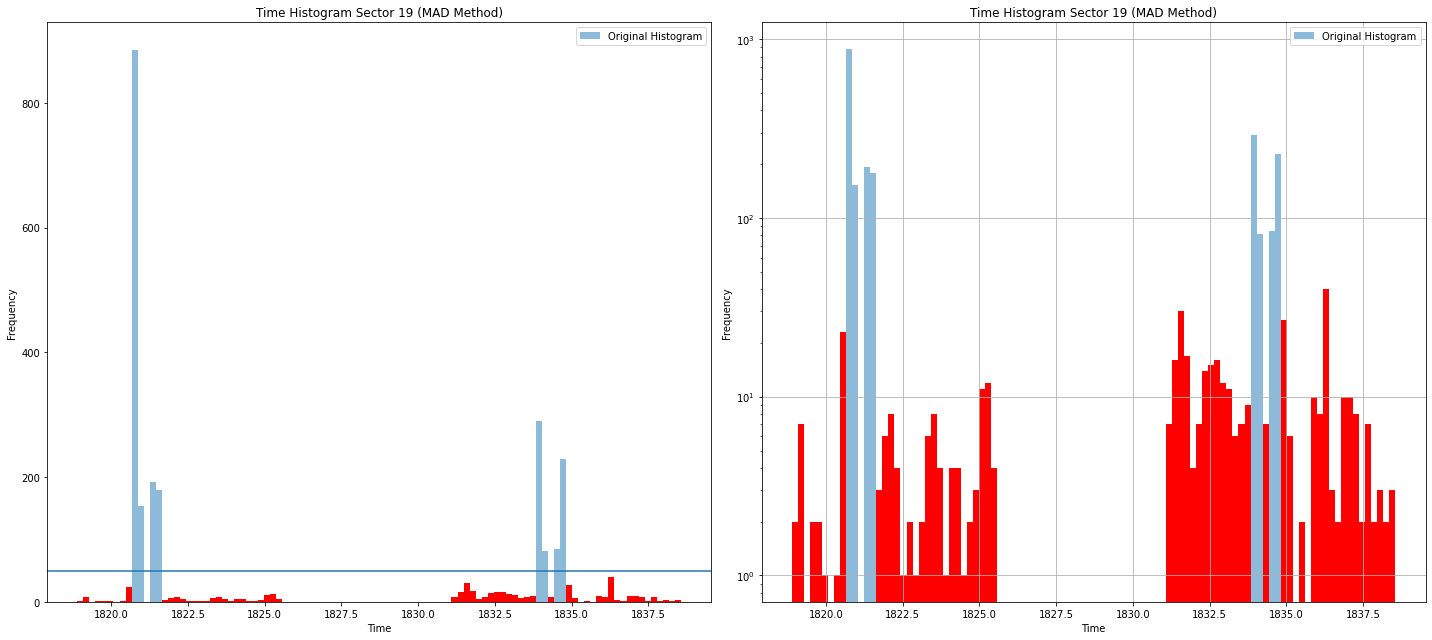

total candidates of Sector 19: 2542
total bad lcs: 2094.0
Bins of bad lightcurves:
    Bin Range: 1820.6610034999999 - 1820.8576649999998
    Bin Range: 1820.857665 - 1821.0543265
    Bin Range: 1821.250988 - 1821.4476495
    Bin Range: 1821.4476495 - 1821.6443109999998
    Bin Range: 1833.8373239999999 - 1834.0339854999997
    Bin Range: 1834.0339855 - 1834.2306469999999
    Bin Range: 1834.4273085 - 1834.6239699999999
    Bin Range: 1834.6239699999999 - 1834.8206314999998
[  4.   2.  nan  nan   1. 282. 610.  45.   5.  78. 367.  61.   3.   1.
   2.   1.  nan  nan  nan  nan   4.  13.   3.   6.  nan   2.   2.  nan
   2.   1.   1.  27.  72.   4.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan   4.   1.   6.   3.  nan   6.
   3.   3.   4.   3.   1.  34.  19.  11.   4.   2.  nan   1.   1.   3.
   2.   5.   2.   1.   3.   1.   2.   4.   8.   4.   4.   2.   1.  nan
  nan  15.]
2.0
20.0
[28

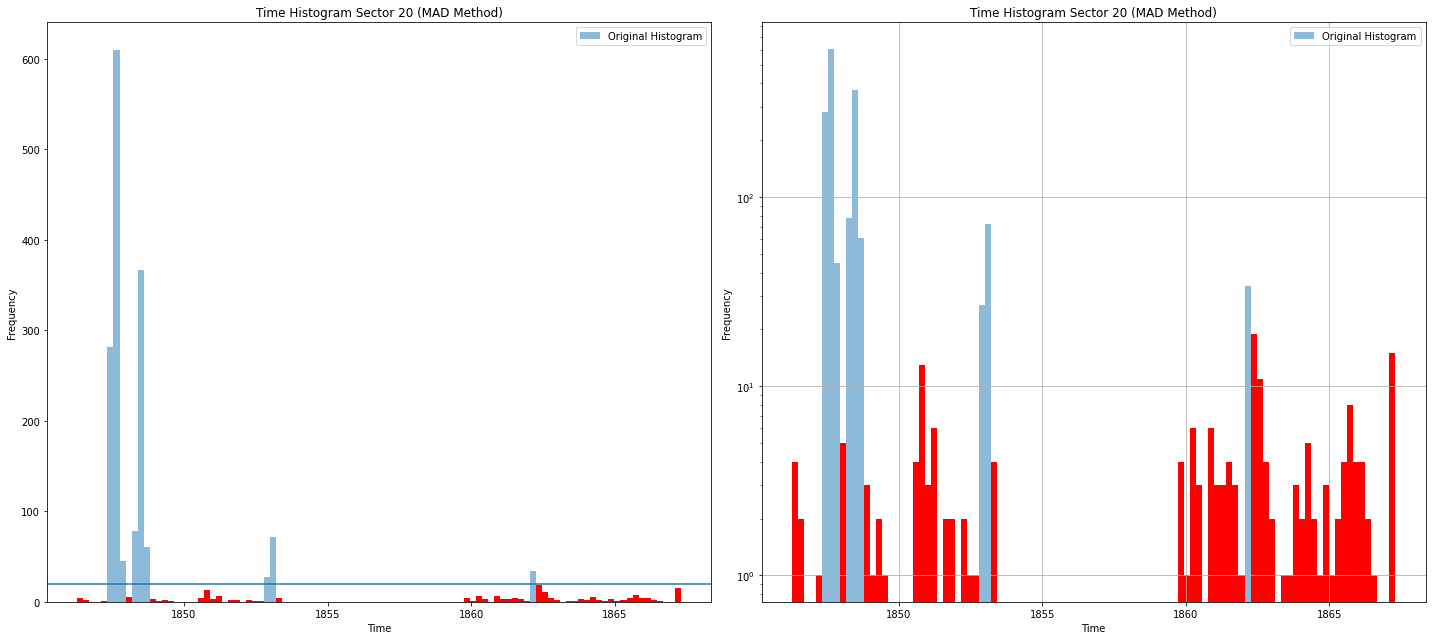

total candidates of Sector 20: 1762
total bad lcs: 1576.0
Bins of bad lightcurves:
    Bin Range: 1847.3353145 - 1847.5455134000001
    Bin Range: 1847.5455134 - 1847.7557123
    Bin Range: 1847.7557123 - 1847.9659112
    Bin Range: 1848.1761101 - 1848.386309
    Bin Range: 1848.386309 - 1848.5965079
    Bin Range: 1848.5965079 - 1848.8067068
    Bin Range: 1852.8004859 - 1853.0106848
    Bin Range: 1853.0106848 - 1853.2208837
    Bin Range: 1862.0492375 - 1862.2594364
[1.000e+00 1.000e+00       nan       nan 2.000e+00 1.000e+00 1.000e+00
       nan 1.000e+00       nan       nan       nan 3.230e+02 1.755e+03
 1.200e+02 1.000e+00 9.000e+00 2.300e+01 1.500e+01 7.000e+00 2.000e+00
 1.000e+00 2.000e+00       nan 1.000e+00 1.000e+00       nan       nan
       nan 4.000e+00 1.000e+00 2.000e+00       nan       nan       nan
 1.000e+00 3.000e+00       nan 1.000e+00       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       na

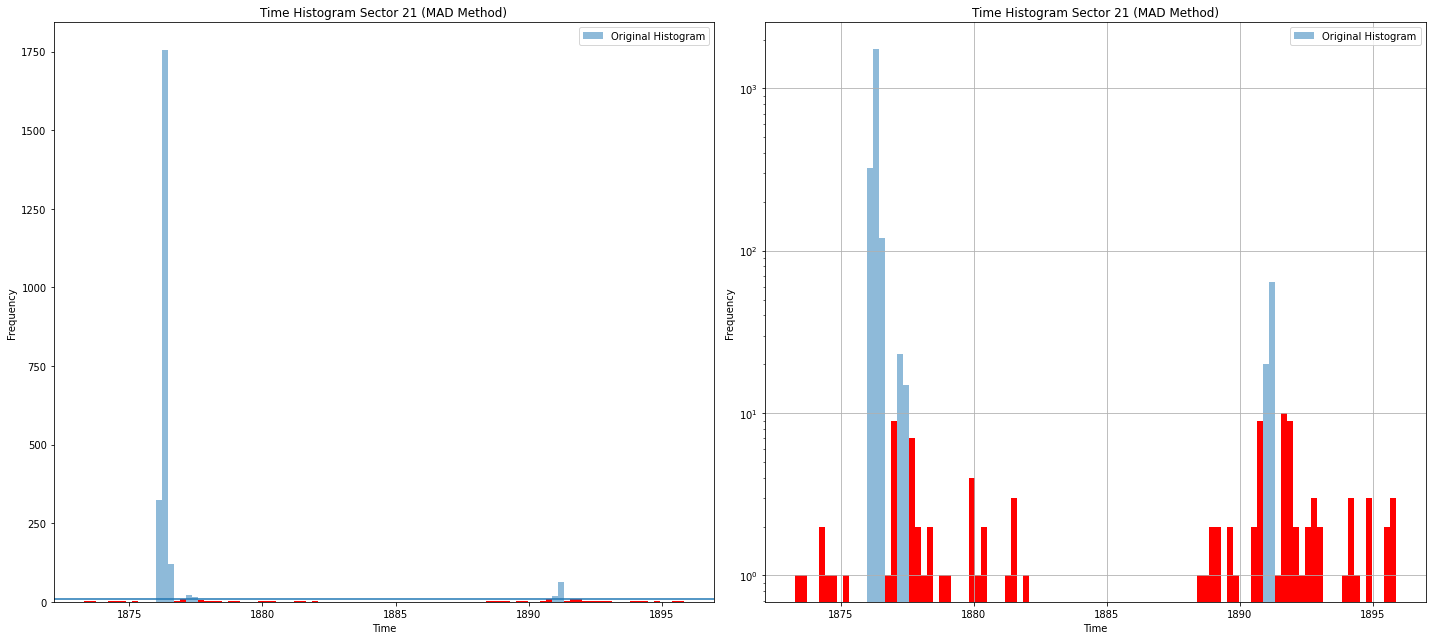

total candidates of Sector 21: 2426
total bad lcs: 2320.0
Bins of bad lightcurves:
    Bin Range: 1875.9889056000002 - 1876.2145544000002
    Bin Range: 1876.2145544 - 1876.4402032
    Bin Range: 1876.4402032 - 1876.665852
    Bin Range: 1877.1171496000002 - 1877.3427984000002
    Bin Range: 1877.3427984 - 1877.5684472
    Bin Range: 1890.8817264 - 1891.1073752
    Bin Range: 1891.1073752 - 1891.333024
[ 12.  11.   7.   6.  nan  nan   9.   3.   1.  nan  nan   9.  18.  10.
   2.  nan   1.   2.   6.   3.   2.  nan  nan   2.   1.  nan   1.   2.
   1.   1.  nan  nan   7.  27.   6. 108.  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   9.
   4.   9.   2.   5.   8.   9.   7.  35.  13.   7. 154.  62.   8.   9.
   4.  10.  15.   1.   1.   1.   7.   3.  nan   2.   2.   2.   2.   1.
   1.   2.]
3.5
35.0
[108. 154.  62.]


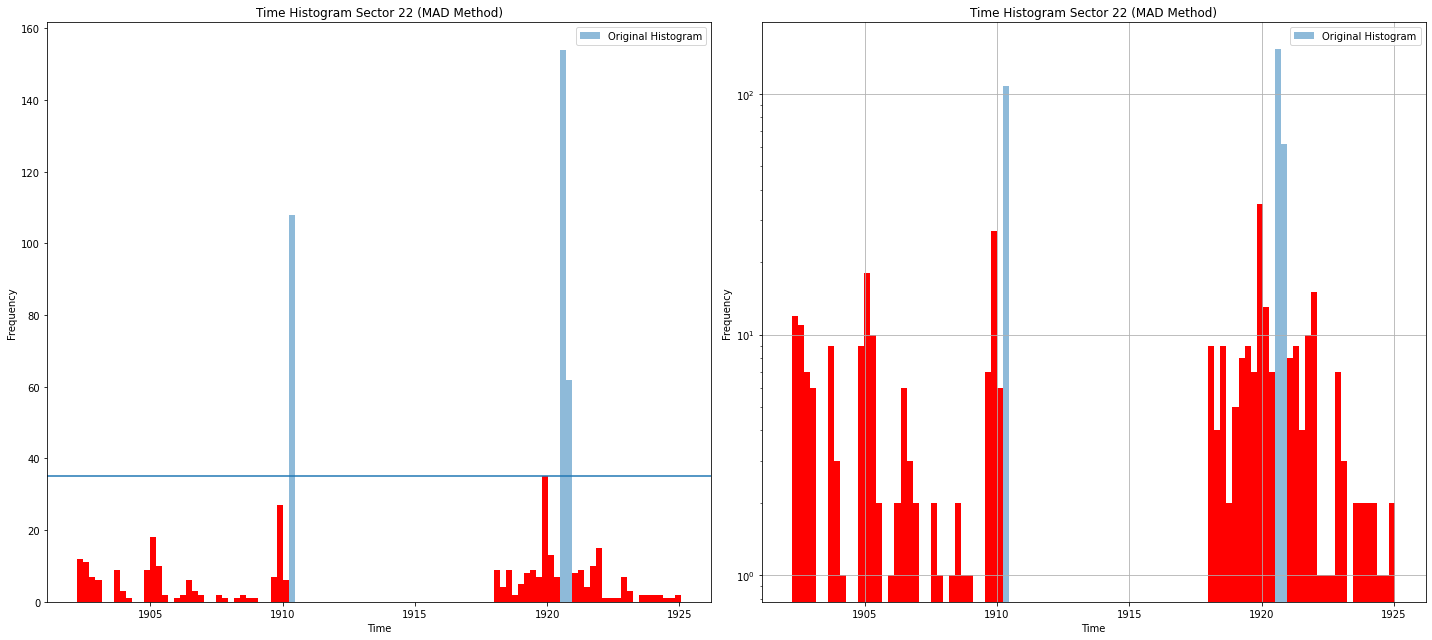

total candidates of Sector 22: 653
total bad lcs: 324.0
Bins of bad lightcurves:
    Bin Range: 1910.229514 - 1910.4576384000002
    Bin Range: 1920.495112 - 1920.7232364000001
    Bin Range: 1920.7232364000001 - 1920.9513608000002
[1.000e+00 2.500e+01 6.200e+01 4.800e+01 4.700e+01 5.500e+01       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan 5.000e+00 5.000e+00 2.000e+00 4.000e+00       nan
 1.000e+00 1.000e+00       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       n

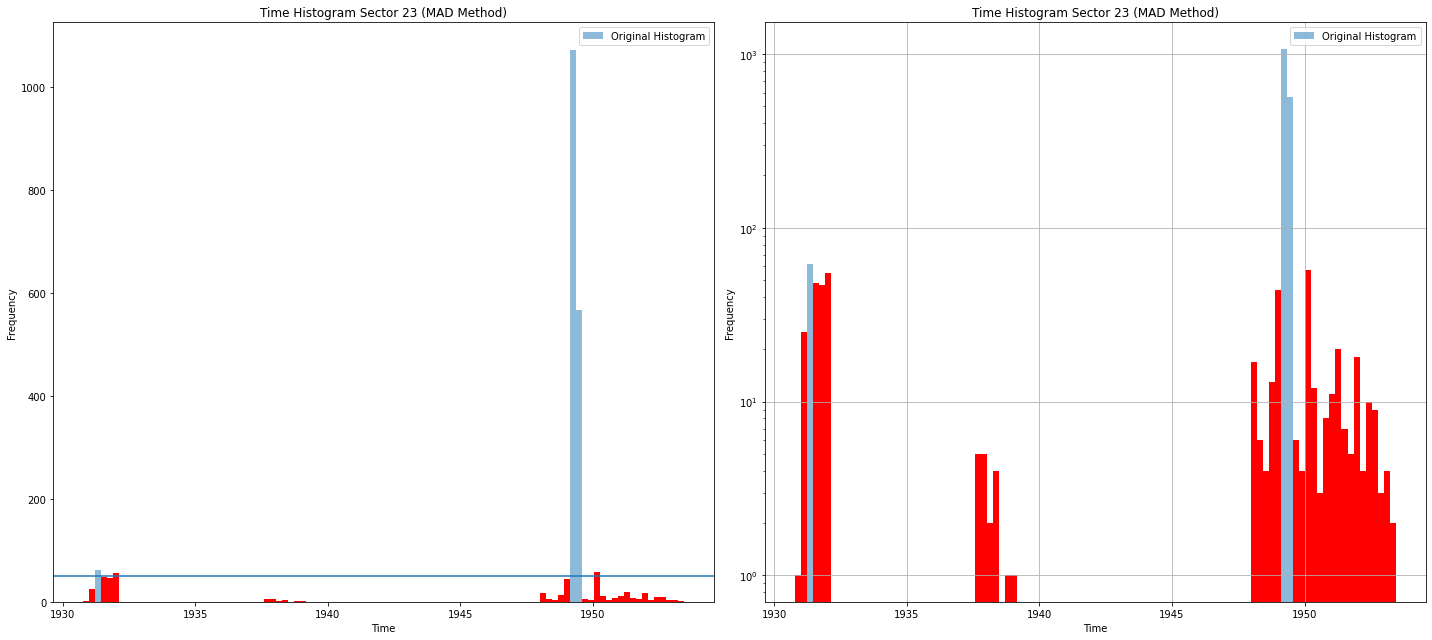

total candidates of Sector 23: 2161
total bad lcs: 1700.0
Bins of bad lightcurves:
    Bin Range: 1931.2363964 - 1931.4628896000002
    Bin Range: 1949.1293592 - 1949.3558524
    Bin Range: 1949.3558524 - 1949.5823456
[ 11.  21.  29.  26.  16.   8.   9.  17.  14.  20.  11.  23.  20.  10.
   9.   4.   2.   1.  nan   7.   3.  12.  14.  21.  32.  12.  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan   5.   9.  36.  54.  23.  13.  10.   5.   6.   7.  nan  17. 125.
  49.   8.   9.   2.   1.   2.   2.   6.   3.   1.   6.  10.  41.  20.
  15.   3.]
7.0
70.0
[125.]


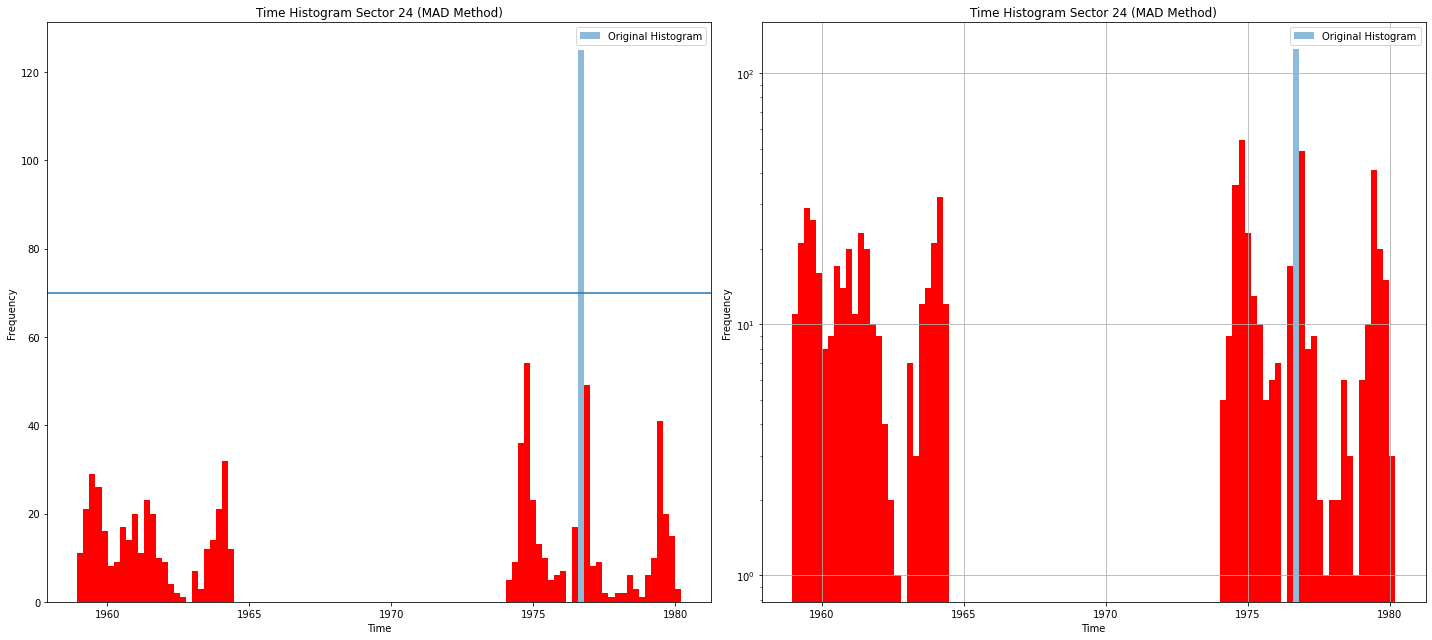

total candidates of Sector 24: 840
total bad lcs: 125.0
Bins of bad lightcurves:
    Bin Range: 1976.5849334 - 1976.7973732
[22.  4.  4. 38. 62. 42. 20. 12. 12. 28. 41. 10.  6.  8. 17. 28.  5.  3.
  2. nan  1.  2.  3. 11. 27. 11.  3.  1. nan nan  2. nan nan nan  9.  7.
  6. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 28. 33.  4.  4. 40.  6. nan nan  8.
 10.  8.  6.  2. nan  1. nan nan  2. nan  1. nan nan  3.  2.  2.  2.  4.
  1.  3.  6.  1.  1.  1.  5.  1.  1.  2.]
3.5
35.0
[62. 42. 41.]


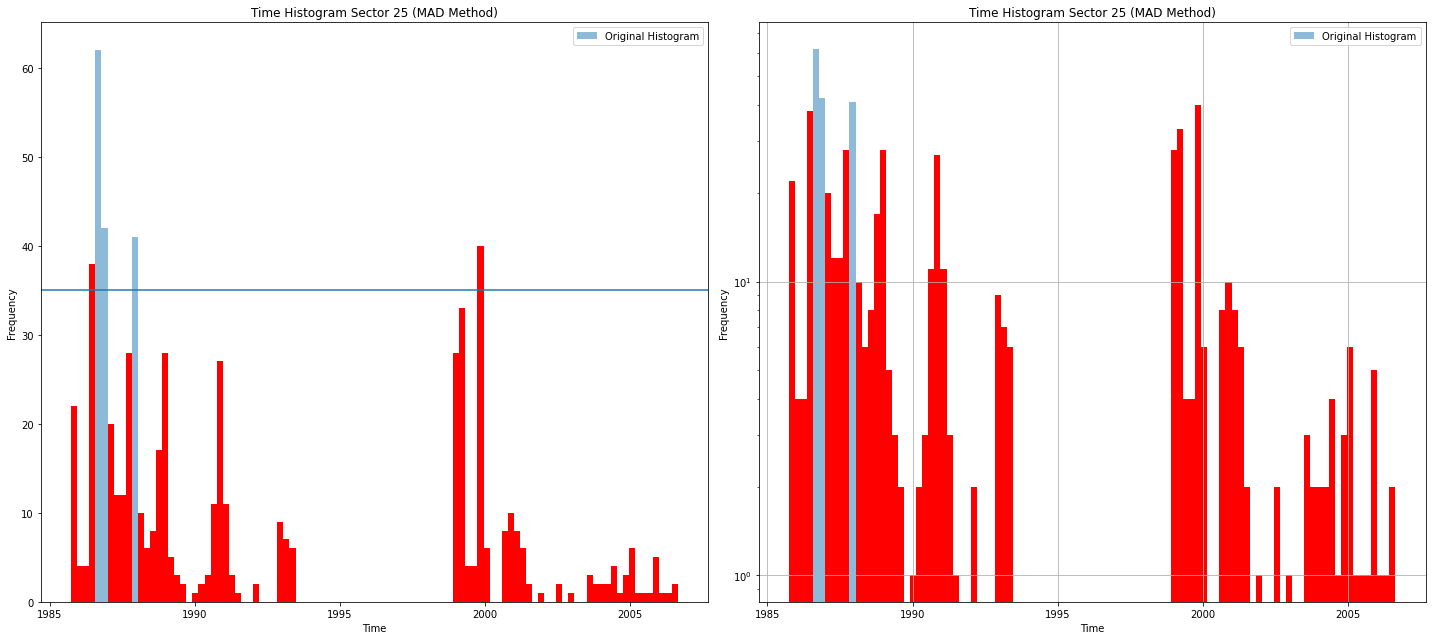

total candidates of Sector 25: 635
total bad lcs: 145.0
Bins of bad lightcurves:
    Bin Range: 1986.5731676 - 1986.7821945
    Bin Range: 1986.7821944999998 - 1986.9912213999999
    Bin Range: 1987.827329 - 1988.0363559
[ 5.  5. 20.  2. nan  5. 15. 21.  4.  8.  4. 13. 14. 24.  6.  2.  3.  2.
 nan  1.  1.  6.  3.  7.  7.  4.  7.  1.  5.  5.  1.  2.  6.  1.  3. 24.
 40. 17. 13.  5. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan  1.  6. 10.  4. nan  1. nan  3.
  1.  1.  4.  9.  5.  2.  1.  6.  3. 32.  1.  4.  1. nan  9. nan  1.  2.
  5.  4.  4.  4.  3.  1.  3.  1.  1.  2.]
2.0
20.0
[40. 32.]


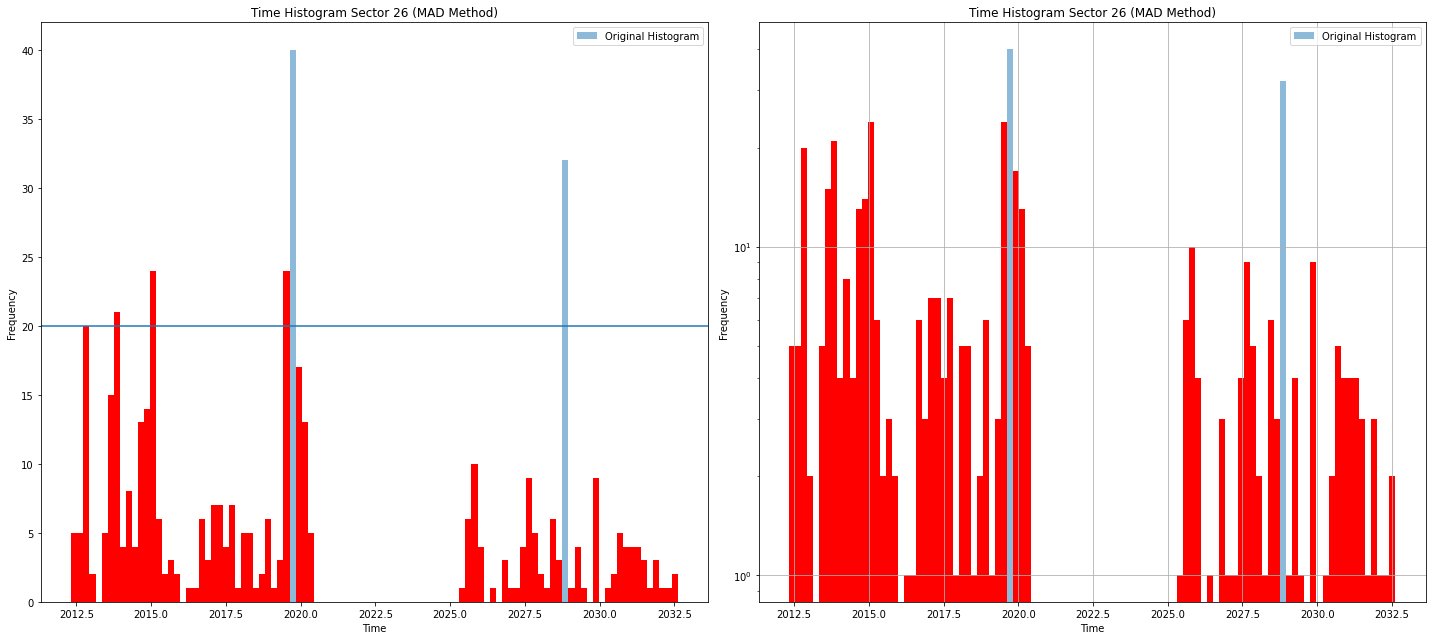

total candidates of Sector 26: 447
total bad lcs: 72.0
Bins of bad lightcurves:
    Bin Range: 2019.6295536 - 2019.8324112
    Bin Range: 2028.7581456 - 2028.9610032


In [54]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data



for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    data_new['abs_path'] = data_new['path'].apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))

    
    
    #try:
    #    os.makedirs('../outputs_updated/')
    #except FileExistsError:
    #    pass
    #data_to_export['abs_path'] = data_to_export['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
    #data_to_export.to_csv(f'../outputs_updated/s{sector}.txt',index=False)

    # Create a subplot
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    #ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    # Plot the original 'data_new.time' histogram
    counts, bin_edges, _ = ax[0].hist(data_new['time'], bins=100, alpha=0.5, label='Original Histogram')
    counts[counts == 0] = np.nan
#     counts = np.array(counts)
#     bin_edges = bin_edges[:len(counts) + 1]
    
    # Method 1: Median Absolute Deviation (MAD)
    ## calculate median, mad, and then mad threshold
    median = np.nanmedian(counts)
    mad = np.nanmedian(np.abs(counts - median)) # median of absolute deviations from the median
    mad_threshold = 10 * mad
    mad_anomalous_bins = [i for i, value in enumerate(counts) if np.abs(value - median) > mad_threshold] # index of bins of the anomalous data
    # bins of anomalous data
    anomalous_bins = np.abs(counts - median) > mad_threshold
    
    #anomalous_bins = [anomalous_bins[i] for i in range(len(counts)) if counts[i] != 0]

    # Calculate the counts in the anomalous bins

    anomalous_counts = counts[anomalous_bins]
    print(counts)
    print(mad)
    print(mad_threshold)
    print(anomalous_counts)
    total_anomalous_count = np.sum(anomalous_counts)


    # Extract the bin edges corresponding to the anomalous bins
    anomalous_bin_edges = bin_edges[:-1][anomalous_bins]

    # Calculate the left edge of the anomalous bins
    anomalous_bin_left_edges = anomalous_bin_edges
    
    # Calculate the width of each bin
    bin_width = bin_edges[1] - bin_edges[0]

    # Calculate the right edge of the anomalous bins
    anomalous_bin_right_edges = anomalous_bin_edges + bin_width

    for i in mad_anomalous_bins:
        counts[i] = 0
        
    # Create a boolean mask to identify rows in the DataFrame that belong to anomalous bins
    anomalous_mask = np.zeros(len(data_new), dtype=bool)

    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        # Check if 'time' values in each row fall within the current anomalous bin
        anomalous_mask |= (data_new['time'] >= left_bin) & (data_new['time'] <= right_bin)

    # Invert the mask to get rows that are NOT in anomalous bins
    non_anomalous_rows = ~anomalous_mask
    # Filter your DataFrame to keep only non-anomalous rows
    
    #data_to_export = data_new[~(data_new.time >= 1948.77439) & (data_new.time <= 1949.5188366666666)] 
    

    data_to_export = data_new[non_anomalous_rows]    
    data_to_export.abs_path.to_csv(f'../sector_{sector}.csv',index=False,header=False)
    anomalous_df = data_new[~non_anomalous_rows]
    tics_compare[f's{sector:04d}_project'] = anomalous_df
    
    ax[0].hist(data_to_export['time'],bins=bin_edges,color='red')
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].axhline(mad_threshold)
    
    ax[1].hist(data_new['time'], bins=100, alpha=0.5, label='Original Histogram')
    ax[1].hist(data_to_export['time'],bins=bin_edges,color='red')
    ax[1].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()
    
#     ax[1].scatter(data_new.time,data_new.duration,s=5)
#     ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
#     ax[1].set_xlabel('Time')
#     ax[1].set_ylabel('Duration')
    
    ax[1].set_yscale('log')
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    # Show the subplot
    plt.show()
                           
    print(f"total candidates of Sector {sector}: {len(data_new)}")
    print(f"total bad lcs: {total_anomalous_count}")
    print("Bins of bad lightcurves:")
    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        print(f"    Bin Range: {left_bin} - {right_bin}")


In [ ]:
#data_to_export.transit_prob.unique()

In [ ]:
# for i in data_to_export.abs_path: #4 x 4 grid for illustration purposes
#     #print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
#     lc, lc_info = import_lightcurve(i)
#     lc = lc['TIME','CORR_FLUX','QUALITY','FLUX_ERR','FLUX_BKG']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
#     print(i)

---

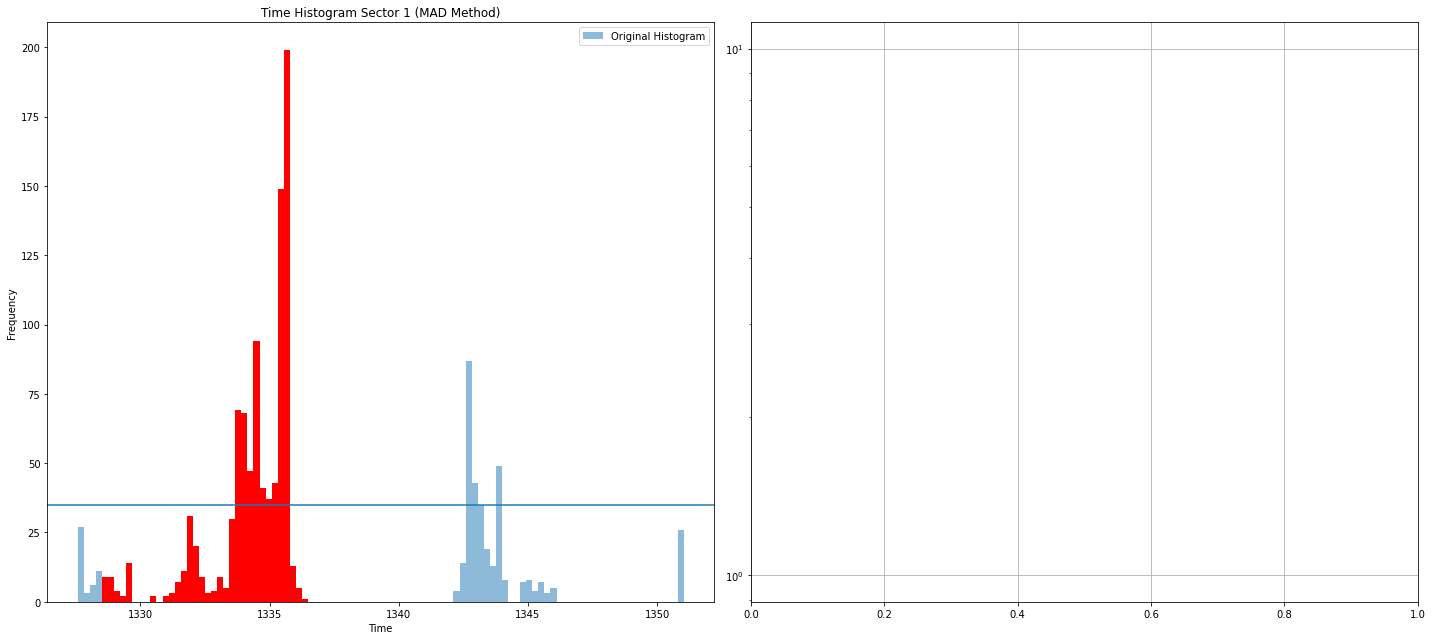

total candidates of Sector 1: 940
total bad lcs: 762.0
Bins of bad lightcurves:
    Bin Range: 1333.674072 - 1333.908709
    Bin Range: 1333.908709 - 1334.143346
    Bin Range: 1334.1433459999998 - 1334.3779829999999
    Bin Range: 1334.3779829999999 - 1334.6126199999999
    Bin Range: 1335.316531 - 1335.551168
    Bin Range: 1335.551168 - 1335.785805
    Bin Range: 1342.590278 - 1342.824915
    Bin Range: 1343.763463 - 1343.9981


In [53]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data



for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    data_new['abs_path'] = data_new['path'].apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))

    
    
    #try:
    #    os.makedirs('../outputs_updated/')
    #except FileExistsError:
    #    pass
    #data_to_export['abs_path'] = data_to_export['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
    #data_to_export.to_csv(f'../outputs_updated/s{sector}.txt',index=False)

    # Create a subplot
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    #ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    # Plot the original 'data_new.time' histogram
    counts, bin_edges, _ = ax[0].hist(data_new['time'], bins=100, alpha=0.5, label='Original Histogram')
    counts[counts == 0] = np.nan
#     counts = np.array(counts)
#     bin_edges = bin_edges[:len(counts) + 1]
    
        # Define the sigma threshold
    sigma_threshold = 5

    # Calculate the median and median absolute deviation (MAD) of 'time' values
    median_time = np.nanmedian(data_new['time'])
    mad_time = np.nanmedian(np.abs(data_new['time'] - median_time))

    # Identify outliers using the 5-sigma threshold
    outliers = data_new[np.abs(data_new['time'] - median_time) > sigma_threshold * mad_time]

    # Remove the outliers from the DataFrame
    data_new = data_new[~data_new.isin(outliers)].dropna()

    
    ax[0].hist(data_new['time'],bins=bin_edges,color='red')
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].axhline(mad_threshold)
    
#     ax[1].hist(data_new['time'], bins=100, alpha=0.5, label='Original Histogram')
#     ax[1].hist(data_to_export['time'],bins=bin_edges,color='red')
#     ax[1].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
#     ax[1].set_xlabel('Time')
#     ax[1].set_ylabel('Frequency')
#     ax[1].legend()
    
#     ax[1].scatter(data_new.time,data_new.duration,s=5)
#     ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
#     ax[1].set_xlabel('Time')
#     ax[1].set_ylabel('Duration')
    
    ax[1].set_yscale('log')
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    # Show the subplot
    plt.show()
                           
    print(f"total candidates of Sector {sector}: {len(data_new)}")
    print(f"total bad lcs: {total_anomalous_count}")
    print("Bins of bad lightcurves:")
    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        print(f"    Bin Range: {left_bin} - {right_bin}")
    break

## Iterative MAD

In [22]:
max_iterations = 10
initial_sigma = 5

# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Initialize MAD and sigma
    mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
    sigma = initial_sigma
    
    for iteration in range(max_iterations):
        # Calculate the histogram values and bin edges using np.histogram
        time_histogram, bin_edges = np.histogram(data_new['time'], bins=30)
        
        # Calculate the counts in the anomalous bins
        anomalous_bins = np.abs(time_histogram - np.median(time_histogram)) > sigma * mad

        anomalous_counts = time_histogram[anomalous_bins]
        
        # Remove data points (bins) corresponding to anomalous bins
        #data_new = data_new[~anomalous_bins]
        
        # Update MAD and sigma based on the remaining data
        mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
        sigma = 10  # You can adjust the initial_sigma value here
        
        # Check for convergence (no more anomalous bins)
        if np.sum(anomalous_counts) == 0:
            break
    
    
    # Create a subplot
    fig, ax = plt.subplots(1, 2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    
    # Plot the original 'data_new.time' histogram
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    ax[1].scatter(data_new.time, data_new.duration, s=5)
    ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    
    # Show the subplot
    plt.show()
    
    print(f"total candidates of Sector {sector}: {len(data_new)}")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 28

## Robust Z-score method

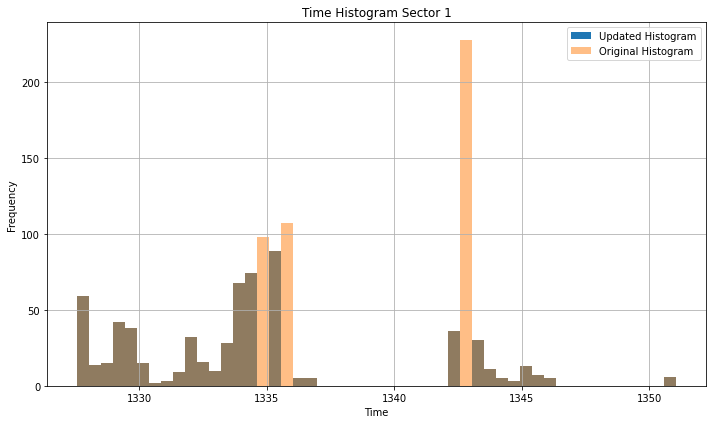

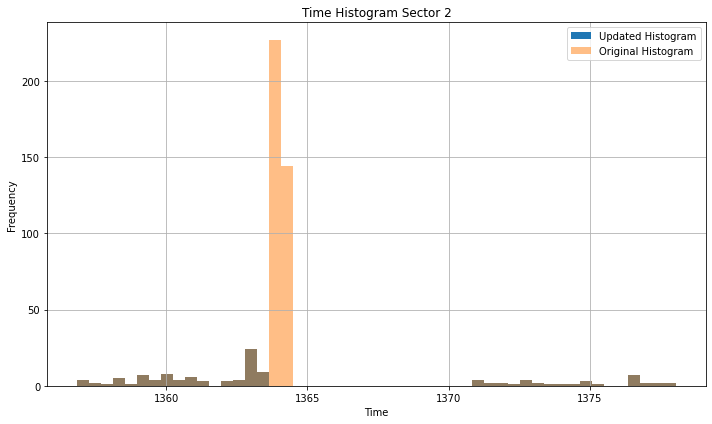

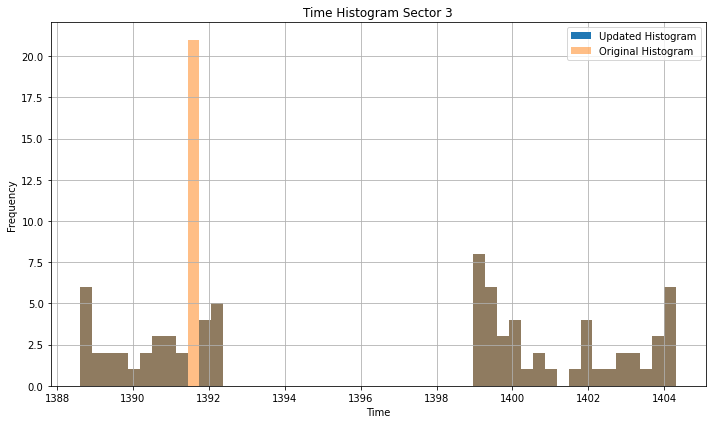

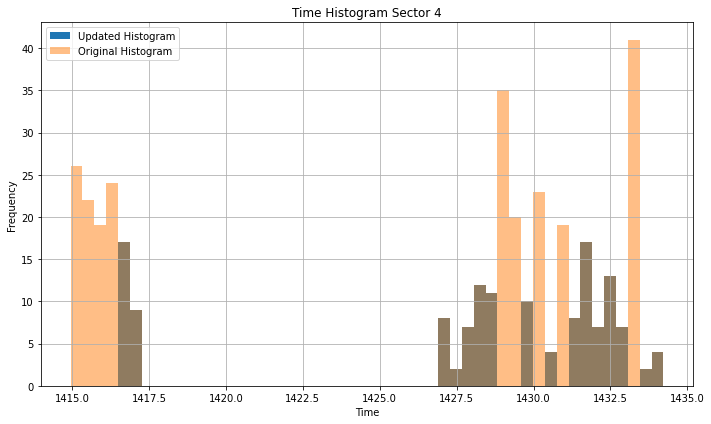

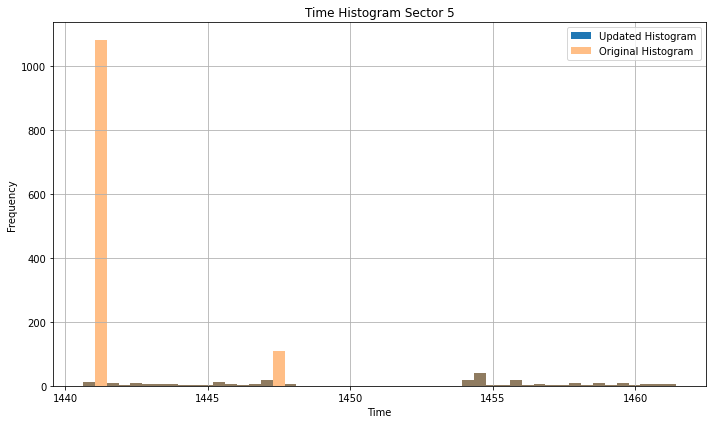

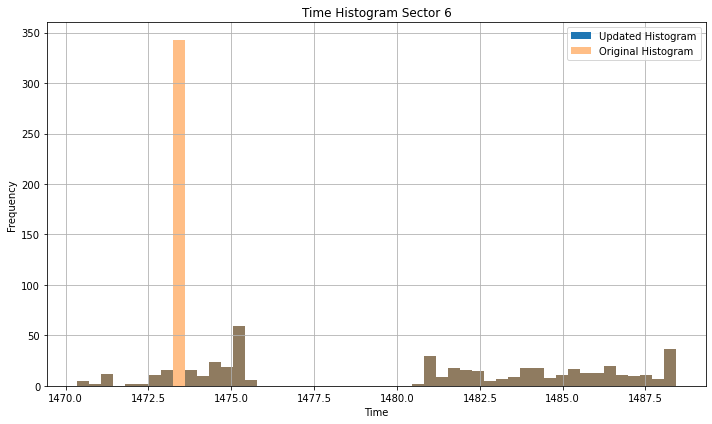

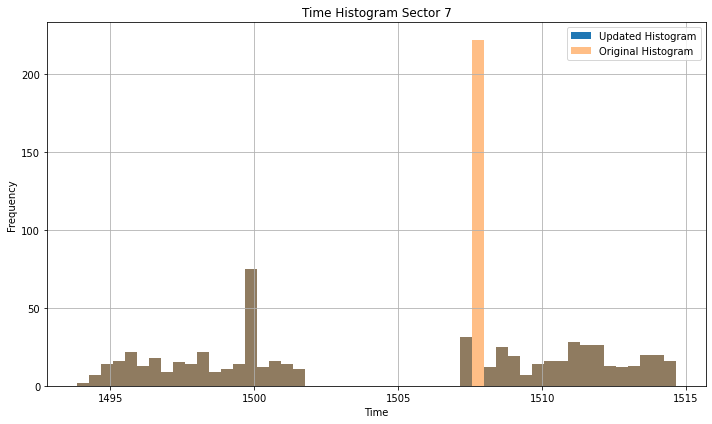

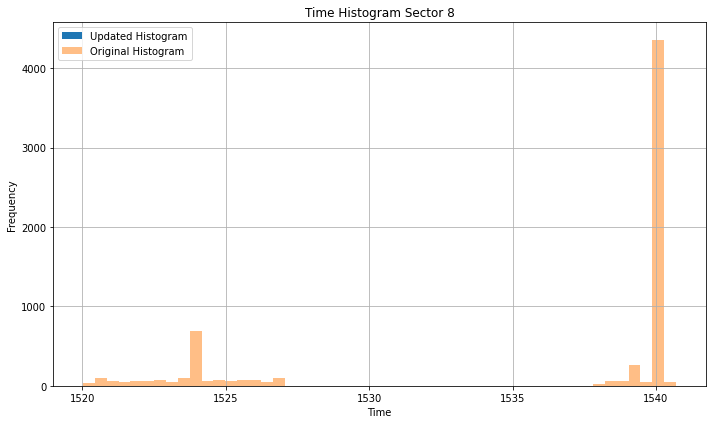

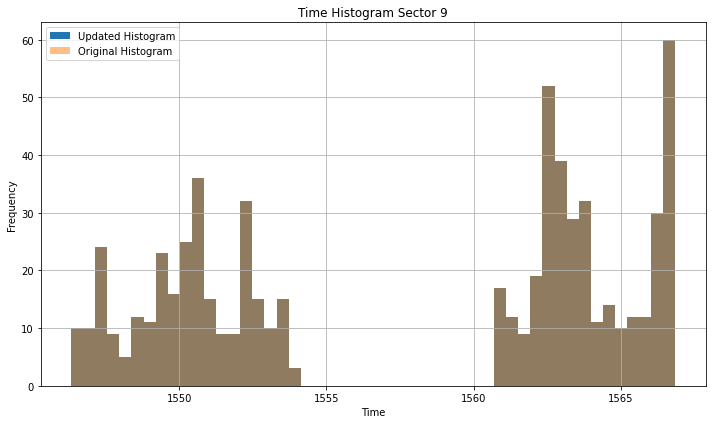

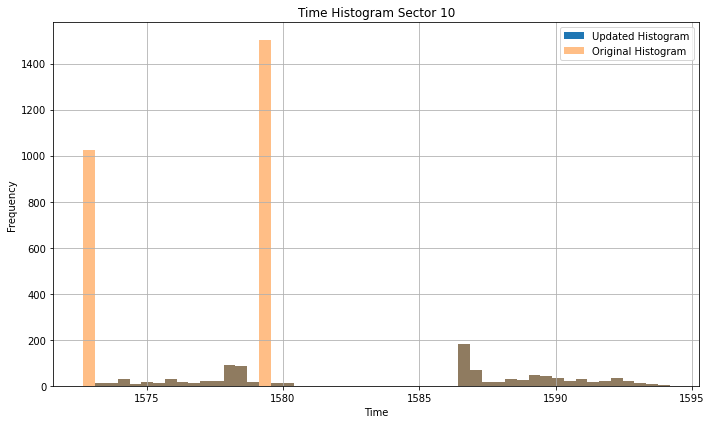

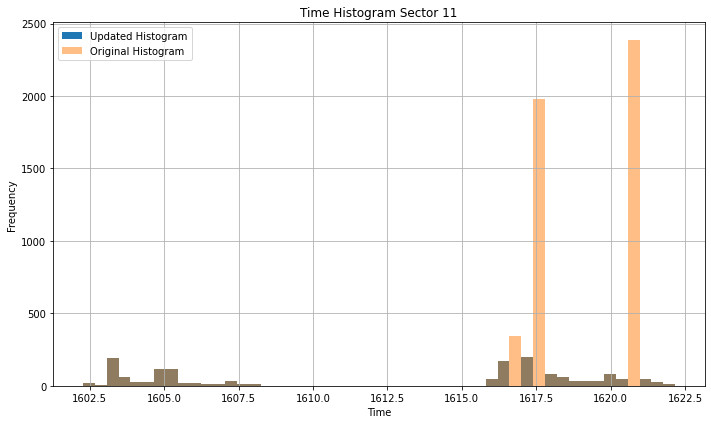

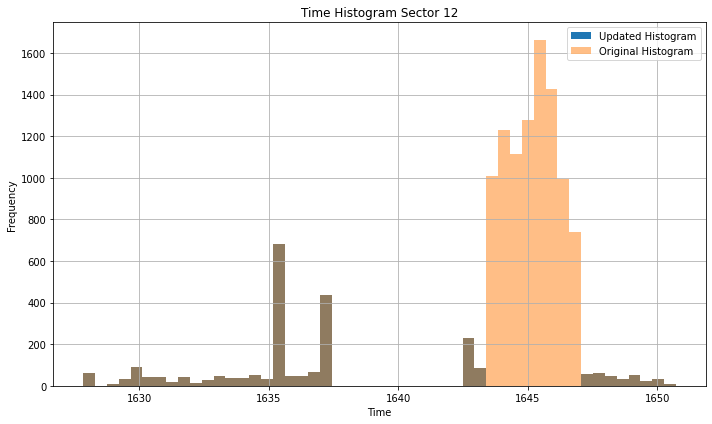

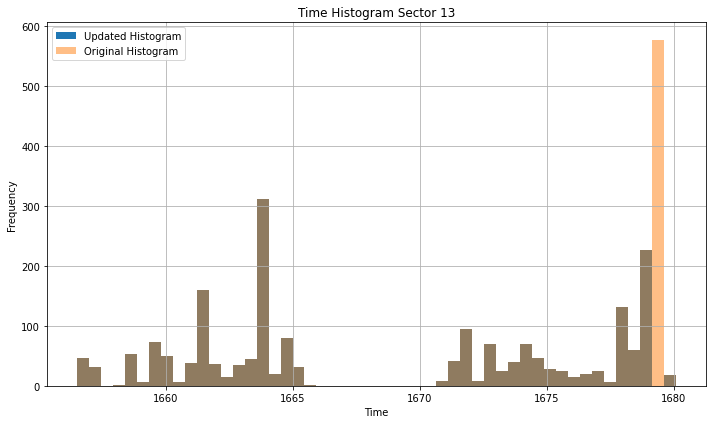

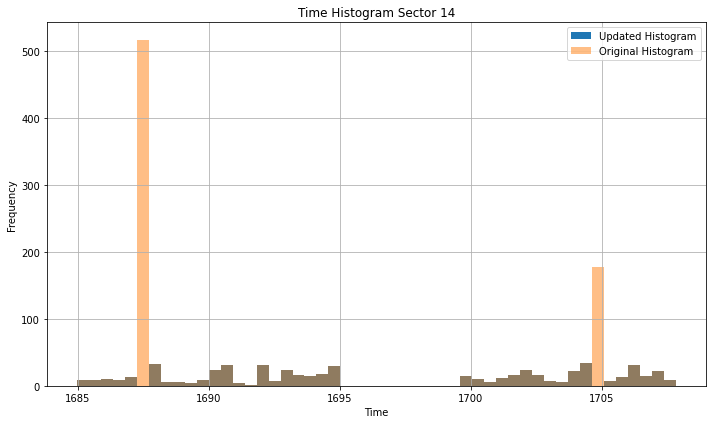

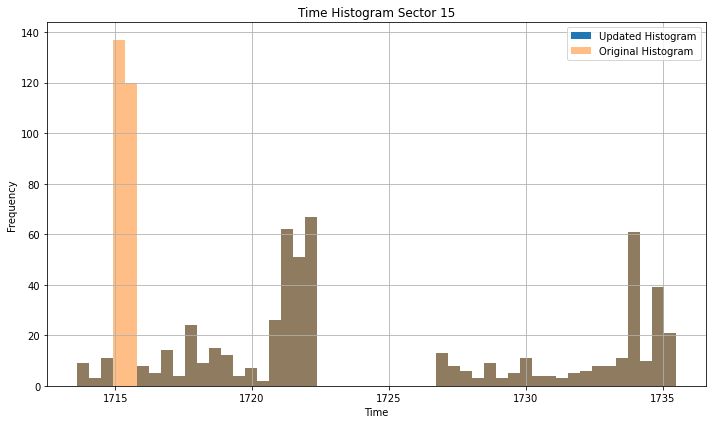

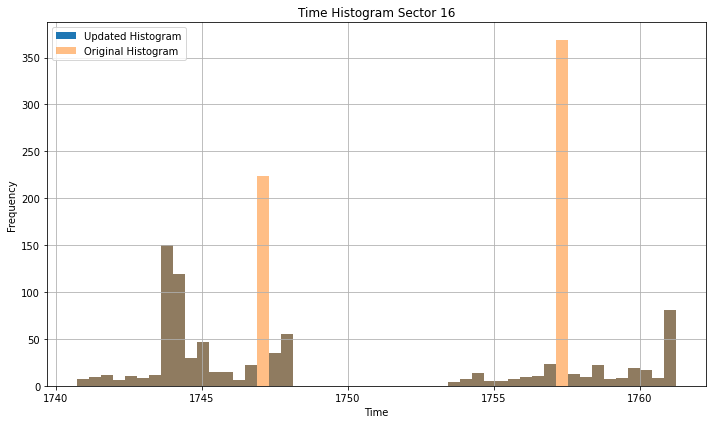

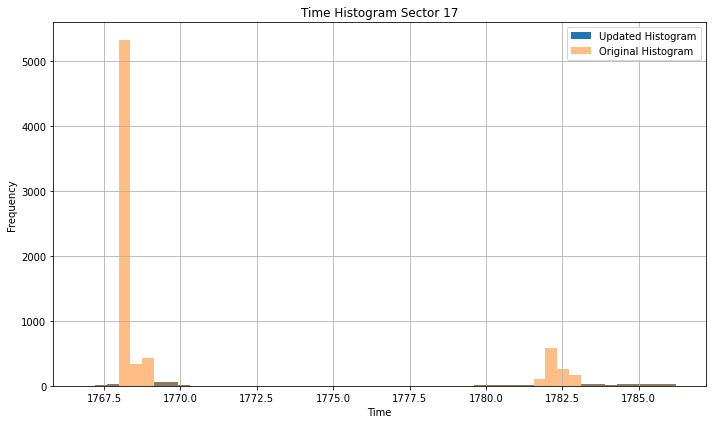

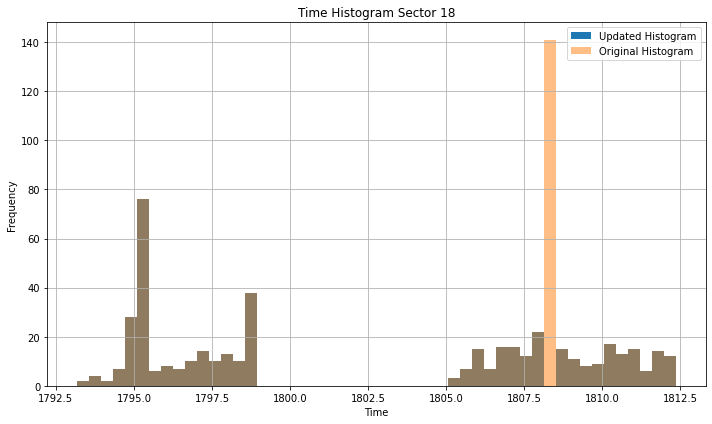

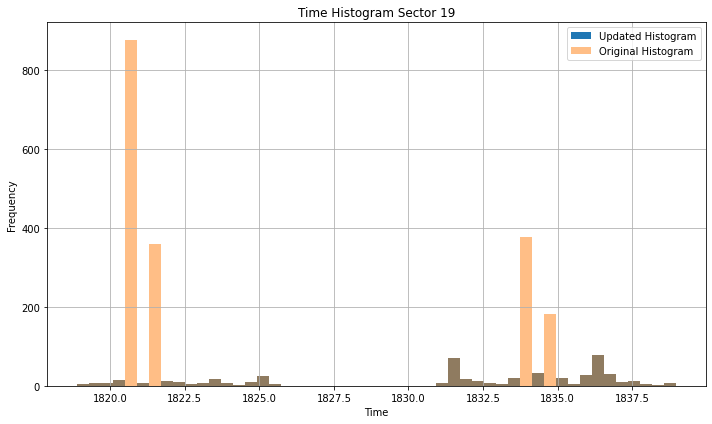

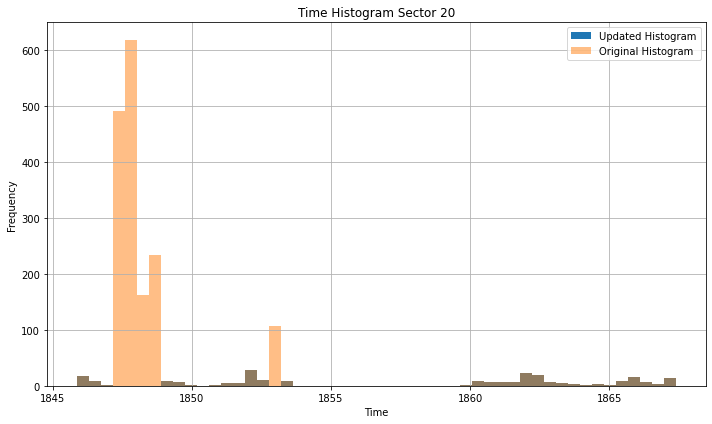

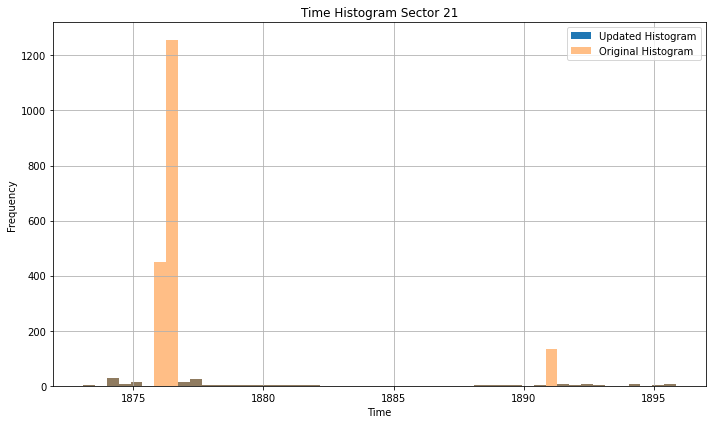

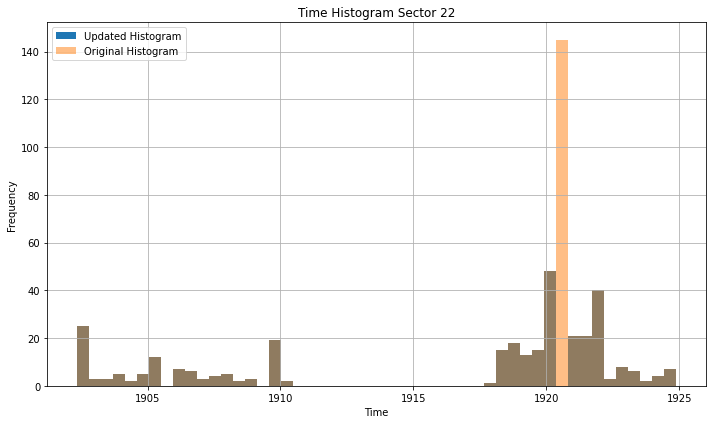

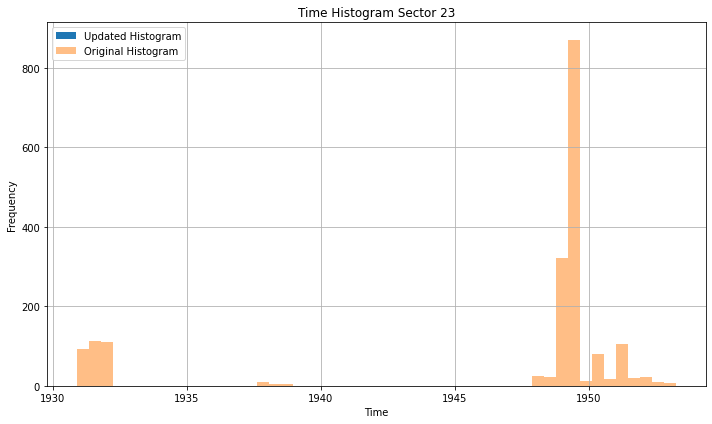

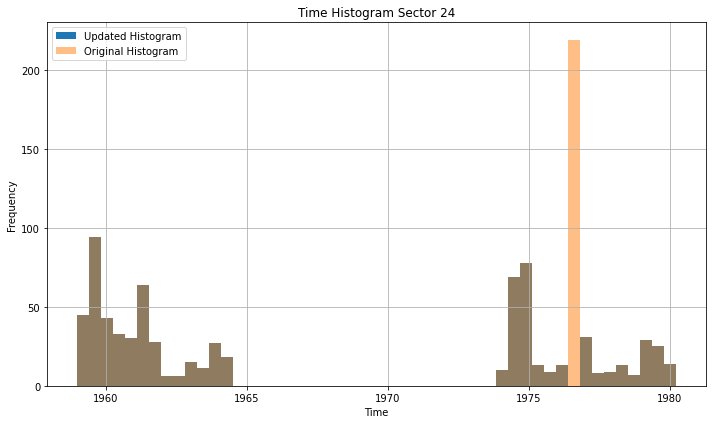

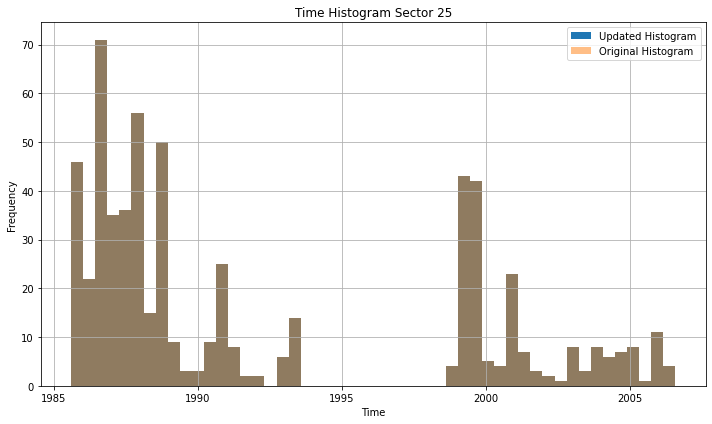

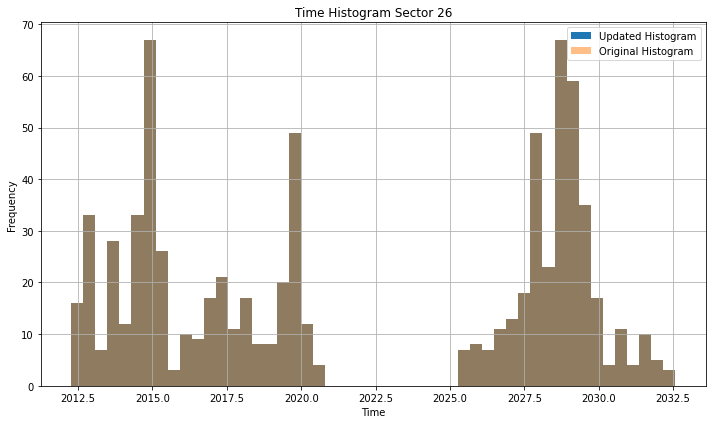

In [9]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=50)
    
    median = np.median(time_histogram)
    mad = np.median(np.abs(time_histogram - median))
    
    # Calculate the robust Z-scores for each bin
    robust_z_scores = [(x - median) / (1.4826 * mad) for x in time_histogram]
    
    # Define the threshold for identifying anomalous bins (e.g., 10 robust sigma)
    threshold = 12
    # Identify and remove anomalous bins
    anomalous_bins = [i for i, z in enumerate(robust_z_scores) if z > threshold]
    
    # Update the histogram by setting values of anomalous bins to zero
    for i in anomalous_bins:
        time_histogram[i] = 0  # Set to zero or any other appropriate value
    
    
    # Create a subplot
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    # Plot the updated histogram without zeros
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram')

    
    # Plot the original 'data_new.time' histogram
    ax.hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax.set_title('Time Histogram Sector {}'.format(sector))
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    plt.show()

    # Show the subplot

In [17]:
sector_5['path'] = sector_5['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')

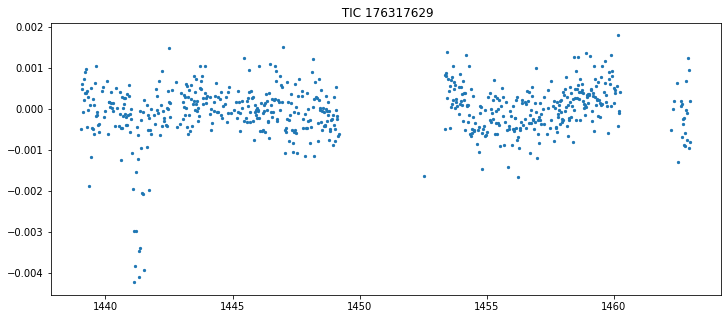

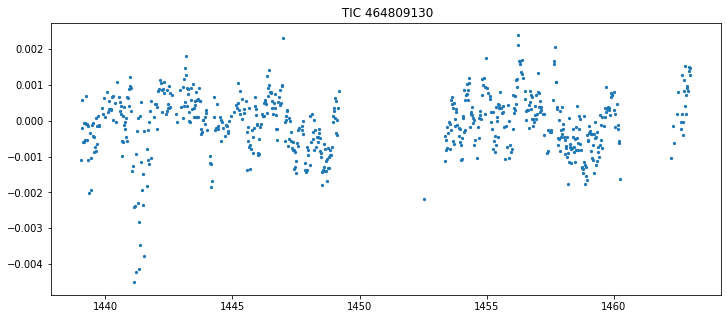

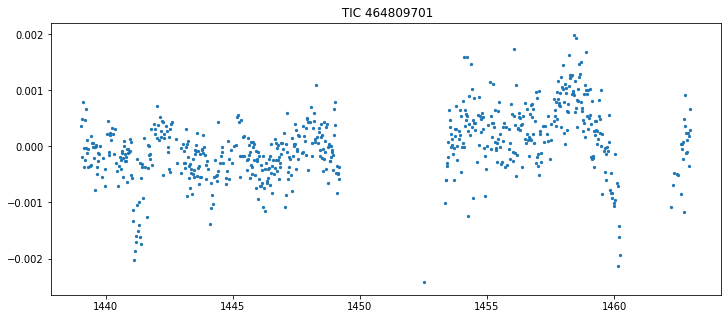

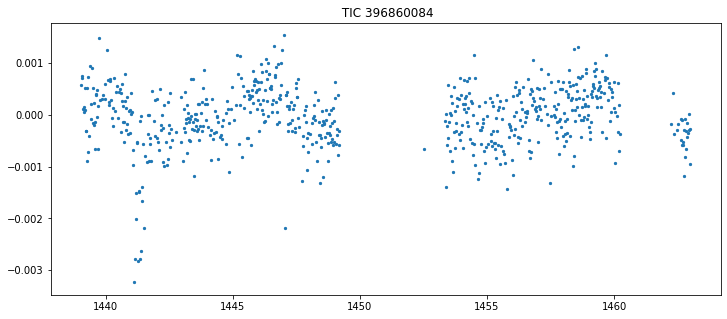

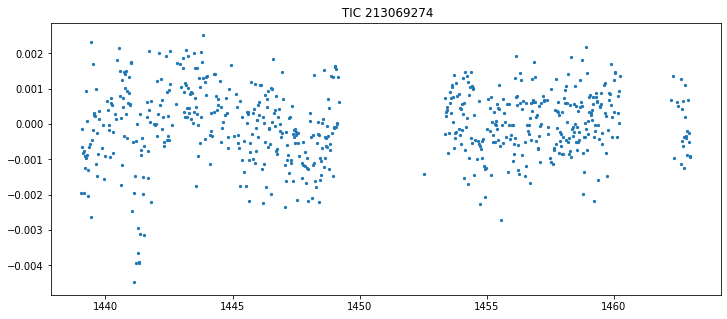

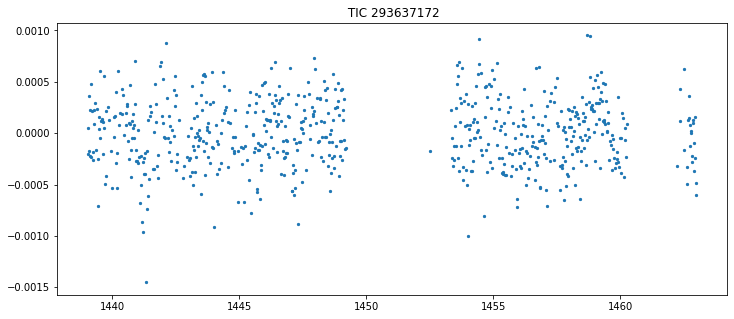

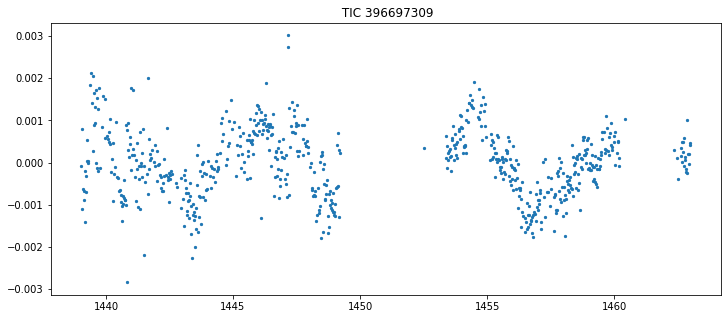

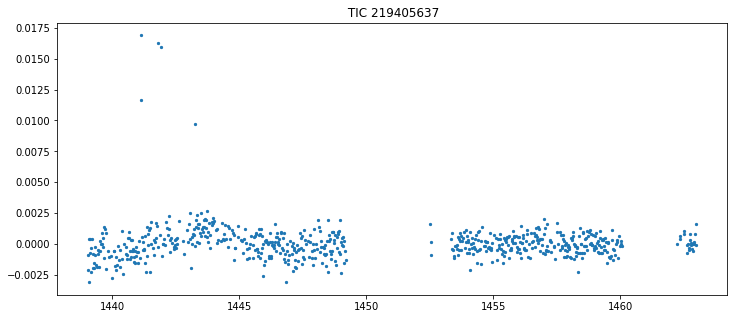

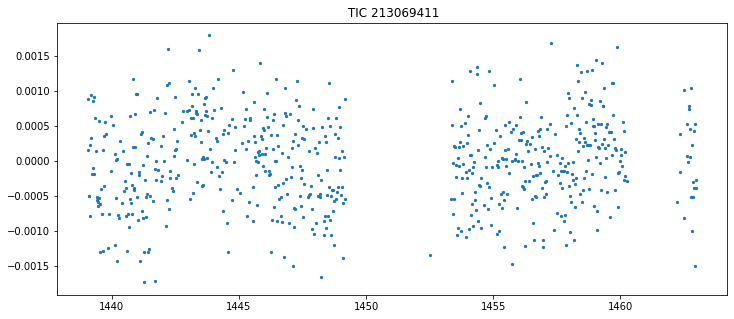

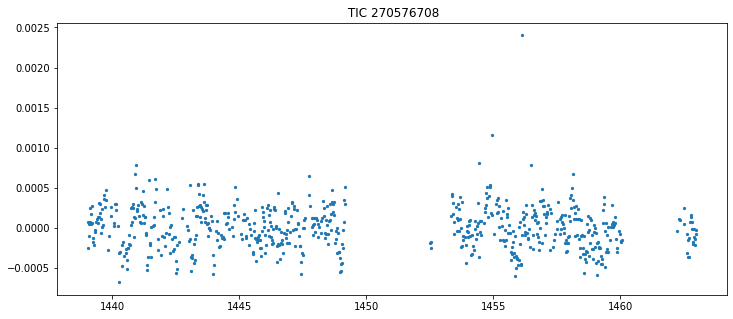

In [19]:
for i in sector_5[(sector_5.time >= 1440) & (sector_5.time <= 1442) & (sector_5.duration >= 0.4) & (sector_5.duration <= 0.5)].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()